In [20]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import colors
import aplpy
import astropy.wcs as wcs
import imf
from astropy.table import Table, hstack, Column

In [2]:
### load constants and functions
# Image information and assumptions
distance        = 8340. # distance to GC; Reid et al. 2014
#Temp            = 20.0
Wave            = (3.0e8/(226e9))
Wave0           = 1.3e-3
k0              = 0.899
nu              = 3.e08/Wave
nu0             = 3.e08/Wave0
beta            = 1.75
Kappag2d        = k0*((nu/nu0)**beta)
g2d             = 100.0
Kappa           = Kappag2d / g2d
mu              = 2.8 # express everything in H2

dustTemp = 20

# Constants
G = 6.67408e-11
msun = 1.989e33
mh = 1.6737236e-27
pc2cm = 3.08567758e18
as2persr = 4.25e10 
percm2perm = 1.0e6
JyperSr_to_JyperPix = (3.0462*(10**-4))*((0.00013888888888)**2) ### 
JyperSr_to_Jyperassqr = ((np.pi*180.)**(-2))*(3600**(-1))
hplanck = 6.63e-34
clight = 2.99792e8
kboltzmann = 1.381e-23
sin1yr = 3.15569e7
arcsec2pc = distance/((360./(2.*np.pi))*60.*60.)

In [3]:
def planck_wave( Wave, Temp ):

    # Planck function using wavelength

    planck_conv_wave = 1.e-26 * clight / Wave**2.0

    planck = ((2.0*hplanck*clight**2.0)/(Wave**5.0))*(1.0/(np.exp((hplanck*clight)/(Wave*kboltzmann*Temp))-1.0))
    planck = planck/planck_conv_wave

    return planck

def mass_calc_submm( Wave, Temp, Kappa, Integrated_Flux, Obj_Dist ):

    Obj_Dist = Obj_Dist * pc2cm
    #from planck_func import planck_wave
    B = planck_wave( Wave, Temp )
    Mass = (Obj_Dist**2. * Integrated_Flux) / ( Kappa * B )
    Mass = Mass / msun
    return Mass

In [4]:
### flux to mass for point source for simulated observation source recovery tests
### FOR JY/BEAM POINT SOURCES
### OR JY/PIX POINT SOURCES
point_flux = 0.15 ### jy/beam
#BMAJ    =   9.391762150659E-04                                                  
#BMIN    =   8.101911677255E-04
BMAJ    =   9.207714266247E-04                                                  
BMIN    =   6.383301814397E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2
print(deg2_per_beam/deg2_per_pix)
#flux_integrated = point_flux*(deg2_per_pix/deg2_per_beam)
#print flux_integrated
#mass = mass_calc_submm(Wave,dustTemp,Kappa,flux_integrated,distance)

point_flux_jy_per_pix = point_flux * (deg2_per_pix/deg2_per_beam)
print(point_flux_jy_per_pix)
point_flux_jy_per_pix = 0.05
mass = mass_calc_submm(Wave,50,Kappa,point_flux_jy_per_pix,distance)

print(mass)


95.72206929962044
0.0015670367460453008
27.36849660071255


In [5]:
### NOISE CONVERSION FROM CATALOG VALUE TO SIMOBS VALUE
BMAJ    =   9.207714266247E-04                                                  
BMIN    =   6.383301814397E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2
#print deg2_per_beam/deg2_per_pix
deg2_per_sr = 3282.8
noise_jy_per_sr = 4.0e6
noise_jy_per_beam = noise_jy_per_sr*(deg2_per_beam/deg2_per_sr)
noise_jy_per_pix = noise_jy_per_sr*(deg2_per_pix/deg2_per_sr)
print noise_jy_per_pix
print noise_jy_per_beam

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(noise_jy_per_pix)? (<ipython-input-5-d96afafdc606>, line 11)

In [8]:
### Plot for mass vs percent found
### also average runs together

path = '/Users/hph/cmzoom_catalog/simobserve_acc/'

BMAJ    =   9.391762150659E-04
BMIN    =   8.101911677255E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2


found_avg = np.array([1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.98,  0.98,  0.94,  0.94,
                      0.9,   0.9,   0.82,  0.68,  0.58,  0.4,   0.34,  0.28,  0.1,   0.08,  0.,    0.,    0.,
                      0.,    0.,    0.,    0.,    0.,    0.  ])

hightau_avg = np.array([0.98,  0.98,  0.98,  0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.92,  0.92,  0.88,
                        0.84,  0.82,  0.7,   0.66,  0.54,  0.48,  0.36,  0.32,  0.22,  0.1,   0.1,   0.08,
                        0.02,  0.02,  0.,    0.,    0.,    0.,    0.])

point_fluxes = np.array([0.08,        0.07733667,  0.07467333,  0.07201,     0.06934667,  0.06668333,
                         0.06402,     0.06135667,  0.05869333,  0.05603,     0.05336667,  0.05070333,
                         0.04804,     0.04537667,  0.04271333,  0.04005,     0.03738667,  0.03472333,
                         0.03206,     0.02939667,  0.02673333,  0.02407,     0.02140667,  0.01874333,
                         0.01608,     0.01341667,  0.01075333,  0.00809,     0.00542667,  0.00276333,
                         0.0001    ])
#fp_avg = np.array([1.4,  1.4,  1.4,  1.2,  0.8,  1.,   2.,   1.2,  0.8,  0.6,  0.2,  0.2,  0.2,  0.2,  0.,
#                     0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
#                     0. ])
fp_avg = np.array([ 1.,   0.6, 0.8,  1.,   0.6,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.,
                    0.,   0.,   0.2 , 0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0. ])
fp_avg = fp_avg/10.
#integrated_fluxes = point_fluxes*(deg2_per_pix/deg2_per_beam)
integrated_fluxes = point_fluxes
masses = mass_calc_submm(Wave,dustTemp,Kappa,integrated_fluxes,distance)


plt.close()
mrfig = plt.figure(3,figsize=(5,5))
mrfig.clf()
ax = mrfig.gca()
ax.plot(masses, found_avg,ls='-',color='tomato',linewidth='3.0', label='% Sources Recovered')
ax.plot(masses, hightau_avg,ls='-',color='purple',linewidth='2.0', label ='% Sources Found, high' )
ax.plot(masses, fp_avg,ls='-',color='k',linewidth='3.0',label='% false sources found')
plt.xlabel('Mass of Point Source (Solar Masses)')
plt.ylabel('Percentage Value')
#plt.ylabel('Percent Sources Found')
plt.title('Completeness of Catalog Algorithm for Point Sources')
ax.set_ylim(0,1.05)
ax.set_xlim(0,130.)

ax.grid()
fill = ax.fill_between(masses,found_avg, color='tomato',alpha=0.2,edgecolor='red',linewidth = '0.0')
fill = ax.fill_between(masses,fp_avg, color='k',alpha=0.2,edgecolor='k',linewidth = '0.0')
plt.legend(loc='upper left',fontsize=8)
mrfig.savefig(path+'simobs_percent.pdf',format='pdf')
plt.show()


ValueError: 
\Tau_{0}
^
Unknown symbol: \Tau (at char 0), (line:1, col:1)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x117c32158> (for post_execute):


ValueError: 
\Tau_{0}
^
Unknown symbol: \Tau (at char 0), (line:1, col:1)

ValueError: 
\Tau_{0}
^
Unknown symbol: \Tau (at char 0), (line:1, col:1)

<Figure size 360x360 with 1 Axes>

In [129]:
### aplpy figures for simobs frames
def make_simobs_panel(path,inputfits1,inputfits2,maskfits,label):
    plt.close()
    fg_color='white'
    bg_color='black'
    contour_hdu = fits.open(path+maskfits)[0]

    data_hdu = fits.open(path+inputfits1)[0]
    #data_hdu.data = data_hdu.data[]
    fig = plt.figure(figsize=(15, 5))#,facecolor=bg_color, edgecolor=fg_color)
    print(data_hdu.data.shape)
    subplot1 = aplpy.FITSFigure(path+inputfits1,subplot=[0.1,0.1,0.265,0.8], slices = (2,3), 
                                figure = fig, convention='calabretta') #
    vmin,vmax = -0.001,0.1
    subplot1.show_colorscale(vmin=vmin, vmax=vmax,cmap='inferno')
    #subplot.frame.set_color(fg_color)
    subplot1.set_nan_color(bg_color)
    subplot1.ticks.set_xspacing(0.02)
    subplot1.ticks.set_yspacing(0.02)
    subplot1.ticks.set_color('black')
    subplot1.tick_labels.set_xformat('d.dd')
    subplot1.tick_labels.set_yformat('d.dd')
    #subplot.ticks.set_color(fg_color)
    #subplot.recenter(xcenter, ycenter, width = 50. / 3600., height = 50. / 3600.)
    subplot1.add_label(0.35, 0.95, str(label), relative = True, weight = 'bold', size = 10, color = 'white')
    #subplot.show_markers(xcenter, ycenter, marker = '+', facecolor = 'red', edgecolor = 'red', s = 1000)
    subplot1.show_contour(path+maskfits,slices=(1,2),
                         colors = 'white', levels = [0.0,], linewidths = 0.7,
                         convention = 'calabretta', zorder = 10, linestyle = 'solid')
    subplot1.axis_labels.set_xtext('Galactic Longitude (degrees)')
    subplot1.axis_labels.set_ytext('Galactic Latitude (degrees)')
    subplot1.ticks.show()
    subplot1.add_scalebar(length=24./3600.)
    subplot1.scalebar.set_label('1 pc')
    subplot1.scalebar.set_color('white')
    subplot1.add_colorbar()
    
    subplot2 = aplpy.FITSFigure(path+inputfits2,subplot=[0.55,0.1,0.265,0.8], slices = (2,3), 
                                figure = fig, convention='calabretta')
    
    fits.open(path+inputfits2)[0]
    initial_wcs = wcs.WCS(initial_hdu.header)
    init_cond = np.where(initial_data!=0)
    wcs_init = initial_wcs.wcs_pix2world(init_cond[0],init_cond[1],1)
    transformed_pix = initial_wcs.wcs_world2pix(wcs_init[0],wcs_init[1],1)
    
    vmin,vmax = -0.001,0.1
    subplot2.show_colorscale(vmin=vmin, vmax=vmax,cmap='inferno')
    #subplot.frame.set_color(fg_color)
    subplot2.set_nan_color(bg_color)
    subplot2.ticks.set_xspacing(0.02)
    subplot2.ticks.set_yspacing(0.02)
    subplot2.ticks.set_color('black')
    subplot2.tick_labels.set_xformat('d.dd')
    subplot2.tick_labels.set_yformat('d.dd')
    subplot2.add_label(0.35, 0.95, 'Random Point Souce Map', relative = True, weight = 'bold', size = 10, color = 'white')
    plt.scatter(transformed_pix[1],transformed_pix[0],color='limegreen',marker='x')
    subplot2.show_contour(path+maskfits,slices=(1,2),
                         colors = 'white', levels = [0.0,], linewidths = 0.7,
                         convention = 'calabretta', zorder = 10, linestyle = 'solid')
    subplot2.axis_labels.set_xtext('Galactic Longitude (degrees)')
    subplot2.axis_labels.set_ytext('Galactic Latitude (degrees)')
    subplot2.ticks.show()
    subplot2.add_scalebar(length=24./3600.)
    subplot2.scalebar.set_label('1 pc')
    subplot2.scalebar.set_color('white')
    subplot2.add_colorbar()
    
    plt.plot()
    #subplot.tick_labels.set_font(color=fg_color)
    #subplot.axis_labels.set_font(color=fg_color)
    #subplot.axis_labels.set_color(fg_color)
    #fig.tight_layout()
    fig.savefig(path+'simobs_example.pdf',format='pdf')
    #plt.show()
    

In [6]:
path = '/Users/hph/cmzoom_catalog/simobserve_kernel/'
make_simobs_panel(path,'final_noregrid_image_9-27-19_0.fits','initial_temp_image_9-27-19_0.fits',
                  'temp_mask_9-27-19_0.fits','Simulated Image')
plt.show()

NameError: name 'make_simobs_panel' is not defined

In [103]:
mask_hdu=fits.open(path+'temp_mask_9-27-19_0.fits')
wcs.WCS(mask_hdu[0])
#print(mask_hdu[0].header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-SIN'  'GLAT-SIN'  
CRVAL : 1.61  -0.0045  
CRPIX : 101.0  101.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0001388888888889  0.0001388888888889  
NAXIS : 200  200

In [101]:
def fix_bad_axes(path,filename):
    initial_hdu = fits.open(path+filename)[0]
    print("initial # axes, data shape: ",initial_hdu.header['NAXIS'],initial_hdu.data.shape)
    if initial_hdu.data.shape==(1, 1, 200, 200):
        initial_hdu.data = initial_hdu.data[0,0,:,:]
    for keyval in ['CRVAL3','CRVAL4','CTYPE3','CTYPE4','CDELT3','CDELT4','CUNIT3','CUNIT4','CRPIX3','CRPIX4',
                   'PC03_01','PC03_02','PC03_03','PC03_04','PC04_01','PC04_02',
                   'PC04_03','PC04_04','PC01_03','PC01_04','PC02_03','PC02_04',
                   'PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2',
                   'PC4_3','PC4_4','PC1_3','PC1_4','PC2_3','PC2_4']:
        if keyval in list(initial_hdu.header.keys()):
            print('Eliminating '+keyval+'...')
            initial_hdu.header.remove(keyval)
    initial_hdu.header['NAXIS']=2
    fits.writeto(path+filename,data=initial_hdu.data,header=initial_hdu.header,overwrite=True)
    print("initial # axes, data shape: ",initial_hdu.header['NAXIS'],initial_data.shape)
    print(path+filename)

fix_bad_axes(path,'initial_temp_image_9-27-19_0.fits')
fix_bad_axes(path,'final_noregrid_image_9-27-19_0.fits')
fix_bad_axes(path,'temp_mask_9-27-19_0.fits')

initial # axes, data shape:  2 (200, 200)
initial # axes, data shape:  2 (200, 200)
/Users/hph/cmzoom_catalog/simobserve_kernel/initial_temp_image_9-27-19_0.fits
initial # axes, data shape:  2 (200, 200)
initial # axes, data shape:  2 (200, 200)
/Users/hph/cmzoom_catalog/simobserve_kernel/final_noregrid_image_9-27-19_0.fits
initial # axes, data shape:  2 (200, 200)
initial # axes, data shape:  2 (200, 200)
/Users/hph/cmzoom_catalog/simobserve_kernel/temp_mask_9-27-19_0.fits


In [23]:
initial_hdu = fits.open(path+'initial_temp_image_9-27-19_0.fits')[0]
final_hdu = fits.open(path+'final_noregrid_image_9-27-19_0.fits')[0]

def fix_bad_axes(path,filename):
    initial_hdu = fits.open(path+filename)[0]
    initial_data = initial_hdu.data[0,0,:,:]
    initial_hdu.header.remove('CRVAL3')
    initial_hdu.header.remove('CRVAL4')
    initial_hdu.header.remove('CTYPE3')
    initial_hdu.header.remove('CTYPE4')
    initial_hdu.header.remove('CDELT3')
    initial_hdu.header.remove('CDELT4')
    initial_hdu.header.remove('CUNIT3')
    initial_hdu.header.remove('CUNIT4')
    initial_hdu.header.remove('CRPIX3')
    initial_hdu.header.remove('CRPIX4')
    initial_hdu.header.remove('PC03_01')
    initial_hdu.header.remove('PC03_02')
    initial_hdu.header.remove('PC03_03')
    initial_hdu.header.remove('PC03_04')
    initial_hdu.header.remove('PC04_01')
    initial_hdu.header.remove('PC04_02')
    initial_hdu.header.remove('PC04_03')
    initial_hdu.header.remove('PC04_04')
    initial_hdu.header.remove('PC01_03')
    initial_hdu.header.remove('PC01_04')
    initial_hdu.header.remove('PC02_03')
    initial_hdu.header.remove('PC02_04')
    initial_hdu.writeto(path+filename,overwrite=True)
    

initial_data = initial_hdu.data
initial_hdu.header.remove('CRVAL3')
initial_hdu.header.remove('CRVAL4')
initial_hdu.header.remove('CTYPE3')
initial_hdu.header.remove('CTYPE4')
initial_hdu.header.remove('CDELT3')
initial_hdu.header.remove('CDELT4')
initial_hdu.header.remove('CUNIT3')
initial_hdu.header.remove('CUNIT4')
initial_hdu.header.remove('CRPIX3')
initial_hdu.header.remove('CRPIX4')
initial_hdu.header.remove('PC03_01')
initial_hdu.header.remove('PC03_02')
initial_hdu.header.remove('PC03_03')
initial_hdu.header.remove('PC03_04')
initial_hdu.header.remove('PC04_01')
initial_hdu.header.remove('PC04_02')
initial_hdu.header.remove('PC04_03')
initial_hdu.header.remove('PC04_04')
initial_hdu.header.remove('PC01_03')
initial_hdu.header.remove('PC01_04')
initial_hdu.header.remove('PC02_03')
initial_hdu.header.remove('PC02_04')

final_hdu.header.remove('CRVAL3')
final_hdu.header.remove('CRVAL4')
final_hdu.header.remove('CTYPE3')
final_hdu.header.remove('CTYPE4')
final_hdu.header.remove('CDELT3')
final_hdu.header.remove('CDELT4')
final_hdu.header.remove('CUNIT3')
final_hdu.header.remove('CUNIT4')
final_hdu.header.remove('CRPIX3')
final_hdu.header.remove('CRPIX4')
final_hdu.header.remove('PC3_1')
final_hdu.header.remove('PC3_2')
final_hdu.header.remove('PC3_3')
final_hdu.header.remove('PC3_4')
final_hdu.header.remove('PC4_1')
final_hdu.header.remove('PC4_2')
final_hdu.header.remove('PC4_3')
final_hdu.header.remove('PC4_4')
final_hdu.header.remove('PC1_3')
final_hdu.header.remove('PC1_4')
final_hdu.header.remove('PC2_3')
final_hdu.header.remove('PC2_4')
final_hdu.header.remove('NAXIS3')
final_hdu.header.remove('NAXIS4')
final_hdu.header['NAXIS']=2


final_wcs = wcs.WCS(final_hdu)

print(final_hdu.header)
initial_hdu.writeto(path+'initial_temp_image_9-27-19_0.fits',overwrite=True)
final_hdu.writeto(path+'final_noregrid_image_9-27-19_0.fits',overwrite=True)

#print np.where(initial_data!=0)
#initial_wcs = wcs.WCS(initial_hdu.header)
#initial_wcs
#init_cond = np.where(initial_data!=0)
#print initial_wcs
#wcs_init = initial_wcs.wcs_pix2world(init_cond[0],init_cond[1],1)
#print wcs_init
#transformed_pix = initial_wcs.wcs_world2pix(wcs_init[0],wcs_init[1],1)

SIMPLE  =                    T /Standard FITS                                   BITPIX  =                  -32 /Floating point (32 bit)                         NAXIS   =                    2                                                  NAXIS1  =                  200                                                  NAXIS2  =                  200                                                  EXTEND  =                    T                                                  BSCALE  =   1.000000000000E+00 /PHYSICAL = PIXEL*BSCALE + BZERO                 BZERO   =   0.000000000000E+00                                                  BMAJ    =   9.605898459752E-04                                                  BMIN    =   6.667590141296E-04                                                  BPA     =  -6.387192916870E+01                                                  BTYPE   = 'Intensity'                                                           OBJECT  = 'sim_compact.sma.cmzoom.compac

In [86]:
path = '/Users/hph/cmzoom_catalog/simobserve_kernel/'
make_simobs_panel(path,'initial_temp_image_9-27-19_0.fits','temp_mask_9-27-19_0.fits','Simulated Image')
plt.show()

TypeError: make_simobs_panel() missing 1 required positional argument: 'label'

In [6]:
BMAJ    =   9.207714266247E-04                                                  
BMIN    =   6.383301814397E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2
print (deg2_per_beam/deg2_per_pix)/2

47.8610346498


In [16]:
#### Make IMF figure
lim_vals = np.linspace(10,100,20)
num_massive_avg = np.zeros(len(lim_vals))
for j in range(len(lim_vals)):
    has_massive = np.zeros(1000)
    for i in range(1000):
        if len(np.where(imf.make_cluster(lim_vals[j])>10)[0])>0: has_massive[i]=1
    num_massive_avg[j]=has_massive.sum()/1000

Total cluster mass is 11.2928 (limit was 10)
Total cluster mass is 10.1114 (limit was 10)
Total cluster mass is 9.47953 (limit was 10)
Total cluster mass is 9.97348 (limit was 10)
Total cluster mass is 10.1054 (limit was 10)
Total cluster mass is 10.3182 (limit was 10)
Total cluster mass is 10.1449 (limit was 10)
Total cluster mass is 6.2464 (limit was 10)
Total cluster mass is 9.96962 (limit was 10)
Total cluster mass is 9.79769 (limit was 10)
Total cluster mass is 10.3082 (limit was 10)
Total cluster mass is 10.011 (limit was 10)
Total cluster mass is 9.58268 (limit was 10)
Total cluster mass is 9.74104 (limit was 10)
Total cluster mass is 0.642239 (limit was 10)
Total cluster mass is 10.4933 (limit was 10)
Total cluster mass is 10.195 (limit was 10)
Total cluster mass is 8.74234 (limit was 10)
Total cluster mass is 9.8561 (limit was 10)
Total cluster mass is 8.38296 (limit was 10)
Total cluster mass is 9.13014 (limit was 10)
Total cluster mass is 9.85868 (limit was 10)
Total cluster

Total cluster mass is 9.86367 (limit was 10)
Total cluster mass is 9.82643 (limit was 10)
Total cluster mass is 10.3081 (limit was 10)
Total cluster mass is 9.81802 (limit was 10)
Total cluster mass is 10.3882 (limit was 10)
Total cluster mass is 11.299 (limit was 10)
Total cluster mass is 9.95978 (limit was 10)
Total cluster mass is 11.2382 (limit was 10)
Total cluster mass is 10.1562 (limit was 10)
Total cluster mass is 9.81397 (limit was 10)
Total cluster mass is 9.8603 (limit was 10)
Total cluster mass is 9.9253 (limit was 10)
Total cluster mass is 9.98983 (limit was 10)
Total cluster mass is 10.1068 (limit was 10)
Total cluster mass is 9.77173 (limit was 10)
Total cluster mass is 9.21819 (limit was 10)
Total cluster mass is 10.0857 (limit was 10)
Total cluster mass is 10.1719 (limit was 10)
Total cluster mass is 10.011 (limit was 10)
Total cluster mass is 8.55781 (limit was 10)
Total cluster mass is 10.2937 (limit was 10)
Total cluster mass is 9.73778 (limit was 10)
Total cluster 

Total cluster mass is 10.5331 (limit was 10)
Total cluster mass is 9.96558 (limit was 10)
Total cluster mass is 9.21767 (limit was 10)
Total cluster mass is 3.68033 (limit was 10)
Total cluster mass is 9.62419 (limit was 10)
Total cluster mass is 9.84962 (limit was 10)
Total cluster mass is 10.0185 (limit was 10)
Total cluster mass is 11.49 (limit was 10)
Total cluster mass is 10.0224 (limit was 10)
Total cluster mass is 2.96906 (limit was 10)
Total cluster mass is 10.2087 (limit was 10)
Total cluster mass is 9.99104 (limit was 10)
Total cluster mass is 10.0059 (limit was 10)
Total cluster mass is 10.006 (limit was 10)
Total cluster mass is 10.0098 (limit was 10)
Total cluster mass is 7.73993 (limit was 10)
Total cluster mass is 9.95722 (limit was 10)
Total cluster mass is 10.4777 (limit was 10)
Total cluster mass is 9.96698 (limit was 10)
Total cluster mass is 10.2506 (limit was 10)
Total cluster mass is 9.85392 (limit was 10)
Total cluster mass is 9.9714 (limit was 10)
Total cluster 

Total cluster mass is 10.0529 (limit was 10)
Total cluster mass is 9.34001 (limit was 10)
Total cluster mass is 10.1532 (limit was 10)
Total cluster mass is 8.99118 (limit was 10)
Total cluster mass is 10.2338 (limit was 10)
Total cluster mass is 9.9994 (limit was 10)
Total cluster mass is 8.76619 (limit was 10)
Total cluster mass is 10.0376 (limit was 10)
Total cluster mass is 12.3828 (limit was 14.7368)
Total cluster mass is 15.1606 (limit was 14.7368)
Total cluster mass is 14.5843 (limit was 14.7368)
Total cluster mass is 13.7953 (limit was 14.7368)
Total cluster mass is 14.0851 (limit was 14.7368)
Total cluster mass is 14.2036 (limit was 14.7368)
Total cluster mass is 14.7422 (limit was 14.7368)
Total cluster mass is 14.6309 (limit was 14.7368)
Total cluster mass is 14.5313 (limit was 14.7368)
Total cluster mass is 14.76 (limit was 14.7368)
Total cluster mass is 14.7119 (limit was 14.7368)
Total cluster mass is 13.7101 (limit was 14.7368)
Total cluster mass is 14.6134 (limit was 14

Total cluster mass is 15.0543 (limit was 14.7368)
Total cluster mass is 14.464 (limit was 14.7368)
Total cluster mass is 14.819 (limit was 14.7368)
Total cluster mass is 14.6016 (limit was 14.7368)
Total cluster mass is 14.5498 (limit was 14.7368)
Total cluster mass is 14.6423 (limit was 14.7368)
Total cluster mass is 14.9051 (limit was 14.7368)
Total cluster mass is 14.8146 (limit was 14.7368)
Total cluster mass is 14.7115 (limit was 14.7368)
Total cluster mass is 14.3939 (limit was 14.7368)
Total cluster mass is 14.842 (limit was 14.7368)
Total cluster mass is 15.8484 (limit was 14.7368)
Total cluster mass is 14.9221 (limit was 14.7368)
Total cluster mass is 13.0362 (limit was 14.7368)
Total cluster mass is 12.779 (limit was 14.7368)
Total cluster mass is 15.0052 (limit was 14.7368)
Total cluster mass is 14.7466 (limit was 14.7368)
Total cluster mass is 15.0853 (limit was 14.7368)
Total cluster mass is 19.3281 (limit was 14.7368)
Total cluster mass is 5.25307 (limit was 14.7368)
Tota

Total cluster mass is 15.6604 (limit was 14.7368)
Total cluster mass is 14.2589 (limit was 14.7368)
Total cluster mass is 14.4645 (limit was 14.7368)
Total cluster mass is 14.7031 (limit was 14.7368)
Total cluster mass is 14.8923 (limit was 14.7368)
Total cluster mass is 15.1675 (limit was 14.7368)
Total cluster mass is 14.9401 (limit was 14.7368)
Total cluster mass is 15.0277 (limit was 14.7368)
Total cluster mass is 14.7359 (limit was 14.7368)
Total cluster mass is 14.7983 (limit was 14.7368)
Total cluster mass is 14.4843 (limit was 14.7368)
Total cluster mass is 13.619 (limit was 14.7368)
Total cluster mass is 14.6587 (limit was 14.7368)
Total cluster mass is 14.6419 (limit was 14.7368)
Total cluster mass is 15.303 (limit was 14.7368)
Total cluster mass is 14.6698 (limit was 14.7368)
Total cluster mass is 11.7924 (limit was 14.7368)
Total cluster mass is 14.7285 (limit was 14.7368)
Total cluster mass is 15.0041 (limit was 14.7368)
Total cluster mass is 15.3771 (limit was 14.7368)
To

Total cluster mass is 14.8532 (limit was 14.7368)
Total cluster mass is 14.8532 (limit was 14.7368)
Total cluster mass is 5.47548 (limit was 14.7368)
Total cluster mass is 15.8757 (limit was 14.7368)
Total cluster mass is 17.2605 (limit was 14.7368)
Total cluster mass is 14.5669 (limit was 14.7368)
Total cluster mass is 14.7415 (limit was 14.7368)
Total cluster mass is 14.851 (limit was 14.7368)
Total cluster mass is 14.5462 (limit was 14.7368)
Total cluster mass is 14.7393 (limit was 14.7368)
Total cluster mass is 14.8003 (limit was 14.7368)
Total cluster mass is 14.7894 (limit was 14.7368)
Total cluster mass is 14.7619 (limit was 14.7368)
Total cluster mass is 10.1386 (limit was 14.7368)
Total cluster mass is 14.7108 (limit was 14.7368)
Total cluster mass is 15.1958 (limit was 14.7368)
Total cluster mass is 14.3275 (limit was 14.7368)
Total cluster mass is 14.8024 (limit was 14.7368)
Total cluster mass is 11.9193 (limit was 14.7368)
Total cluster mass is 15.1513 (limit was 14.7368)
T

Total cluster mass is 14.8034 (limit was 14.7368)
Total cluster mass is 14.6608 (limit was 14.7368)
Total cluster mass is 15.6585 (limit was 14.7368)
Total cluster mass is 14.1187 (limit was 14.7368)
Total cluster mass is 14.6978 (limit was 14.7368)
Total cluster mass is 14.7769 (limit was 14.7368)
Total cluster mass is 14.9411 (limit was 14.7368)
Total cluster mass is 14.6102 (limit was 14.7368)
Total cluster mass is 14.3989 (limit was 14.7368)
Total cluster mass is 14.7651 (limit was 14.7368)
Total cluster mass is 14.7311 (limit was 14.7368)
Total cluster mass is 14.8172 (limit was 14.7368)
Total cluster mass is 14.7248 (limit was 14.7368)
Total cluster mass is 15.3758 (limit was 14.7368)
Total cluster mass is 17.8061 (limit was 14.7368)
Total cluster mass is 14.2787 (limit was 14.7368)
Total cluster mass is 10.0517 (limit was 14.7368)
Total cluster mass is 14.7148 (limit was 14.7368)
Total cluster mass is 14.6579 (limit was 14.7368)
Total cluster mass is 16.387 (limit was 14.7368)
T

Total cluster mass is 19.5533 (limit was 19.4737)
Total cluster mass is 19.5506 (limit was 19.4737)
Total cluster mass is 19.4227 (limit was 19.4737)
Total cluster mass is 19.418 (limit was 19.4737)
Total cluster mass is 20.4773 (limit was 19.4737)
Total cluster mass is 19.5255 (limit was 19.4737)
Total cluster mass is 19.4428 (limit was 19.4737)
Total cluster mass is 18.3284 (limit was 19.4737)
Total cluster mass is 17.4573 (limit was 19.4737)
Total cluster mass is 19.4631 (limit was 19.4737)
Total cluster mass is 19.2058 (limit was 19.4737)
Total cluster mass is 19.613 (limit was 19.4737)
Total cluster mass is 19.4662 (limit was 19.4737)
Total cluster mass is 19.6877 (limit was 19.4737)
Total cluster mass is 19.617 (limit was 19.4737)
Total cluster mass is 19.7189 (limit was 19.4737)
Total cluster mass is 19.3395 (limit was 19.4737)
Total cluster mass is 19.3288 (limit was 19.4737)
Total cluster mass is 21.5354 (limit was 19.4737)
Total cluster mass is 19.4713 (limit was 19.4737)
Tot

Total cluster mass is 18.7936 (limit was 19.4737)
Total cluster mass is 19.1671 (limit was 19.4737)
Total cluster mass is 17.9921 (limit was 19.4737)
Total cluster mass is 13.3476 (limit was 19.4737)
Total cluster mass is 14.1054 (limit was 19.4737)
Total cluster mass is 19.5243 (limit was 19.4737)
Total cluster mass is 19.4804 (limit was 19.4737)
Total cluster mass is 19.4777 (limit was 19.4737)
Total cluster mass is 19.4296 (limit was 19.4737)
Total cluster mass is 19.4409 (limit was 19.4737)
Total cluster mass is 19.2394 (limit was 19.4737)
Total cluster mass is 19.4998 (limit was 19.4737)
Total cluster mass is 19.8779 (limit was 19.4737)
Total cluster mass is 19.5925 (limit was 19.4737)
Total cluster mass is 19.949 (limit was 19.4737)
Total cluster mass is 22.0424 (limit was 19.4737)
Total cluster mass is 20.264 (limit was 19.4737)
Total cluster mass is 16.5027 (limit was 19.4737)
Total cluster mass is 18.7119 (limit was 19.4737)
Total cluster mass is 20.7864 (limit was 19.4737)
To

Total cluster mass is 19.0845 (limit was 19.4737)
Total cluster mass is 18.8018 (limit was 19.4737)
Total cluster mass is 19.4585 (limit was 19.4737)
Total cluster mass is 21.1999 (limit was 19.4737)
Total cluster mass is 19.8486 (limit was 19.4737)
Total cluster mass is 19.6777 (limit was 19.4737)
Total cluster mass is 19.4779 (limit was 19.4737)
Total cluster mass is 13.0945 (limit was 19.4737)
Total cluster mass is 24.0092 (limit was 19.4737)
Total cluster mass is 19.3439 (limit was 19.4737)
Total cluster mass is 19.5297 (limit was 19.4737)
Total cluster mass is 20.463 (limit was 19.4737)
Total cluster mass is 4.11581 (limit was 19.4737)
Total cluster mass is 19.5795 (limit was 19.4737)
Total cluster mass is 19.4616 (limit was 19.4737)
Total cluster mass is 18.8369 (limit was 19.4737)
Total cluster mass is 19.1419 (limit was 19.4737)
Total cluster mass is 19.4452 (limit was 19.4737)
Total cluster mass is 19.5887 (limit was 19.4737)
Total cluster mass is 19.4802 (limit was 19.4737)
T

Total cluster mass is 19.74 (limit was 19.4737)
Total cluster mass is 19.4419 (limit was 19.4737)
Total cluster mass is 18.9765 (limit was 19.4737)
Total cluster mass is 19.682 (limit was 19.4737)
Total cluster mass is 19.7326 (limit was 19.4737)
Total cluster mass is 19.3795 (limit was 19.4737)
Total cluster mass is 8.94015 (limit was 19.4737)
Total cluster mass is 18.9758 (limit was 19.4737)
Total cluster mass is 18.8692 (limit was 19.4737)
Total cluster mass is 19.7139 (limit was 19.4737)
Total cluster mass is 19.4741 (limit was 19.4737)
Total cluster mass is 19.5283 (limit was 19.4737)
Total cluster mass is 5.74322 (limit was 19.4737)
Total cluster mass is 19.5103 (limit was 19.4737)
Total cluster mass is 19.618 (limit was 19.4737)
Total cluster mass is 19.4992 (limit was 19.4737)
Total cluster mass is 32.4812 (limit was 19.4737)
Total cluster mass is 19.501 (limit was 19.4737)
Total cluster mass is 19.5912 (limit was 19.4737)
Total cluster mass is 19.0653 (limit was 19.4737)
Total

Total cluster mass is 24.256 (limit was 24.2105)
Total cluster mass is 24.2388 (limit was 24.2105)
Total cluster mass is 24.2457 (limit was 24.2105)
Total cluster mass is 24.1141 (limit was 24.2105)
Total cluster mass is 24.2916 (limit was 24.2105)
Total cluster mass is 24.4748 (limit was 24.2105)
Total cluster mass is 23.3392 (limit was 24.2105)
Total cluster mass is 24.1668 (limit was 24.2105)
Total cluster mass is 25.6848 (limit was 24.2105)
Total cluster mass is 24.283 (limit was 24.2105)
Total cluster mass is 24.0953 (limit was 24.2105)
Total cluster mass is 31.0275 (limit was 24.2105)
Total cluster mass is 23.8529 (limit was 24.2105)
Total cluster mass is 24.3376 (limit was 24.2105)
Total cluster mass is 24.5463 (limit was 24.2105)
Total cluster mass is 24.2954 (limit was 24.2105)
Total cluster mass is 24.2695 (limit was 24.2105)
Total cluster mass is 18.321 (limit was 24.2105)
Total cluster mass is 24.1382 (limit was 24.2105)
Total cluster mass is 25.0022 (limit was 24.2105)
Tot

Total cluster mass is 24.2605 (limit was 24.2105)
Total cluster mass is 24.0991 (limit was 24.2105)
Total cluster mass is 23.8869 (limit was 24.2105)
Total cluster mass is 24.1021 (limit was 24.2105)
Total cluster mass is 23.2509 (limit was 24.2105)
Total cluster mass is 23.9749 (limit was 24.2105)
Total cluster mass is 25.7465 (limit was 24.2105)
Total cluster mass is 24.2425 (limit was 24.2105)
Total cluster mass is 25.0969 (limit was 24.2105)
Total cluster mass is 25.5609 (limit was 24.2105)
Total cluster mass is 24.1254 (limit was 24.2105)
Total cluster mass is 24.2959 (limit was 24.2105)
Total cluster mass is 24.3544 (limit was 24.2105)
Total cluster mass is 24.2343 (limit was 24.2105)
Total cluster mass is 24.2146 (limit was 24.2105)
Total cluster mass is 24.3735 (limit was 24.2105)
Total cluster mass is 24.4011 (limit was 24.2105)
Total cluster mass is 24.218 (limit was 24.2105)
Total cluster mass is 22.0877 (limit was 24.2105)
Total cluster mass is 24.0631 (limit was 24.2105)
T

Total cluster mass is 24.9054 (limit was 24.2105)
Total cluster mass is 24.0903 (limit was 24.2105)
Total cluster mass is 25.7077 (limit was 24.2105)
Total cluster mass is 39.1864 (limit was 24.2105)
Total cluster mass is 20.8201 (limit was 24.2105)
Total cluster mass is 23.3948 (limit was 24.2105)
Total cluster mass is 25.966 (limit was 24.2105)
Total cluster mass is 24.1724 (limit was 24.2105)
Total cluster mass is 24.3343 (limit was 24.2105)
Total cluster mass is 21.2947 (limit was 24.2105)
Total cluster mass is 24.1035 (limit was 24.2105)
Total cluster mass is 24.0091 (limit was 24.2105)
Total cluster mass is 24.238 (limit was 24.2105)
Total cluster mass is 23.4968 (limit was 24.2105)
Total cluster mass is 23.9237 (limit was 24.2105)
Total cluster mass is 16.9576 (limit was 24.2105)
Total cluster mass is 24.0035 (limit was 24.2105)
Total cluster mass is 16.4435 (limit was 24.2105)
Total cluster mass is 22.195 (limit was 24.2105)
Total cluster mass is 25.3247 (limit was 24.2105)
Tot

Total cluster mass is 24.1098 (limit was 24.2105)
Total cluster mass is 21.5813 (limit was 24.2105)
Total cluster mass is 23.8118 (limit was 24.2105)
Total cluster mass is 27.7364 (limit was 24.2105)
Total cluster mass is 25.2029 (limit was 24.2105)
Total cluster mass is 24.17 (limit was 24.2105)
Total cluster mass is 32.3047 (limit was 24.2105)
Total cluster mass is 24.1438 (limit was 24.2105)
Total cluster mass is 18.9506 (limit was 24.2105)
Total cluster mass is 18.9594 (limit was 24.2105)
Total cluster mass is 24.1185 (limit was 24.2105)
Total cluster mass is 13.7822 (limit was 24.2105)
Total cluster mass is 24.2038 (limit was 24.2105)
Total cluster mass is 24.1529 (limit was 24.2105)
Total cluster mass is 23.7798 (limit was 24.2105)
Total cluster mass is 24.2185 (limit was 24.2105)
Total cluster mass is 22.7944 (limit was 24.2105)
Total cluster mass is 26.2584 (limit was 24.2105)
Total cluster mass is 24.0983 (limit was 24.2105)
Total cluster mass is 24.1432 (limit was 24.2105)
To

Total cluster mass is 28.8805 (limit was 28.9474)
Total cluster mass is 34.2929 (limit was 28.9474)
Total cluster mass is 29.0305 (limit was 28.9474)
Total cluster mass is 28.5322 (limit was 28.9474)
Total cluster mass is 26.9587 (limit was 28.9474)
Total cluster mass is 29.5589 (limit was 28.9474)
Total cluster mass is 28.6363 (limit was 28.9474)
Total cluster mass is 29.3386 (limit was 28.9474)
Total cluster mass is 27.3752 (limit was 28.9474)
Total cluster mass is 26.0978 (limit was 28.9474)
Total cluster mass is 28.8467 (limit was 28.9474)
Total cluster mass is 28.9703 (limit was 28.9474)
Total cluster mass is 28.3991 (limit was 28.9474)
Total cluster mass is 30.2544 (limit was 28.9474)
Total cluster mass is 28.9841 (limit was 28.9474)
Total cluster mass is 28.963 (limit was 28.9474)
Total cluster mass is 28.4804 (limit was 28.9474)
Total cluster mass is 29.1829 (limit was 28.9474)
Total cluster mass is 29.0113 (limit was 28.9474)
Total cluster mass is 26.4104 (limit was 28.9474)
T

Total cluster mass is 35.6647 (limit was 28.9474)
Total cluster mass is 28.7428 (limit was 28.9474)
Total cluster mass is 28.7419 (limit was 28.9474)
Total cluster mass is 31.2368 (limit was 28.9474)
Total cluster mass is 29.193 (limit was 28.9474)
Total cluster mass is 28.9838 (limit was 28.9474)
Total cluster mass is 29.0892 (limit was 28.9474)
Total cluster mass is 28.434 (limit was 28.9474)
Total cluster mass is 28.9199 (limit was 28.9474)
Total cluster mass is 29.2008 (limit was 28.9474)
Total cluster mass is 28.3545 (limit was 28.9474)
Total cluster mass is 33.2319 (limit was 28.9474)
Total cluster mass is 29.1008 (limit was 28.9474)
Total cluster mass is 34.1114 (limit was 28.9474)
Total cluster mass is 29.1332 (limit was 28.9474)
Total cluster mass is 28.9589 (limit was 28.9474)
Total cluster mass is 6.88564 (limit was 28.9474)
Total cluster mass is 28.6216 (limit was 28.9474)
Total cluster mass is 29.4545 (limit was 28.9474)
Total cluster mass is 30.481 (limit was 28.9474)
Tot

Total cluster mass is 28.9483 (limit was 28.9474)
Total cluster mass is 28.9267 (limit was 28.9474)
Total cluster mass is 28.556 (limit was 28.9474)
Total cluster mass is 29.1919 (limit was 28.9474)
Total cluster mass is 28.8994 (limit was 28.9474)
Total cluster mass is 32.0144 (limit was 28.9474)
Total cluster mass is 29.1637 (limit was 28.9474)
Total cluster mass is 28.9558 (limit was 28.9474)
Total cluster mass is 29.1532 (limit was 28.9474)
Total cluster mass is 26.3105 (limit was 28.9474)
Total cluster mass is 28.8954 (limit was 28.9474)
Total cluster mass is 28.7625 (limit was 28.9474)
Total cluster mass is 28.9019 (limit was 28.9474)
Total cluster mass is 29.3897 (limit was 28.9474)
Total cluster mass is 28.9401 (limit was 28.9474)
Total cluster mass is 25.9333 (limit was 28.9474)
Total cluster mass is 29.6274 (limit was 28.9474)
Total cluster mass is 29.1013 (limit was 28.9474)
Total cluster mass is 27.27 (limit was 28.9474)
Total cluster mass is 26.9435 (limit was 28.9474)
Tot

Total cluster mass is 28.9375 (limit was 28.9474)
Total cluster mass is 28.7341 (limit was 28.9474)
Total cluster mass is 28.9031 (limit was 28.9474)
Total cluster mass is 29.5738 (limit was 28.9474)
Total cluster mass is 28.7118 (limit was 28.9474)
Total cluster mass is 31.4928 (limit was 28.9474)
Total cluster mass is 28.7118 (limit was 28.9474)
Total cluster mass is 31.2887 (limit was 28.9474)
Total cluster mass is 45.1694 (limit was 28.9474)
Total cluster mass is 29.0029 (limit was 28.9474)
Total cluster mass is 29.3036 (limit was 28.9474)
Total cluster mass is 28.9793 (limit was 28.9474)
Total cluster mass is 28.9981 (limit was 28.9474)
Total cluster mass is 28.9699 (limit was 28.9474)
Total cluster mass is 23.5169 (limit was 28.9474)
Total cluster mass is 28.6093 (limit was 28.9474)
Total cluster mass is 28.8209 (limit was 28.9474)
Total cluster mass is 28.6935 (limit was 28.9474)
Total cluster mass is 29.1039 (limit was 28.9474)
Total cluster mass is 28.8064 (limit was 28.9474)


Total cluster mass is 28.9335 (limit was 28.9474)
Total cluster mass is 28.9602 (limit was 28.9474)
Total cluster mass is 29.1102 (limit was 28.9474)
Total cluster mass is 30.5324 (limit was 28.9474)
Total cluster mass is 27.2788 (limit was 28.9474)
Total cluster mass is 29.8363 (limit was 28.9474)
Total cluster mass is 29.384 (limit was 28.9474)
Total cluster mass is 32.0024 (limit was 28.9474)
Total cluster mass is 30.5665 (limit was 28.9474)
Total cluster mass is 28.3535 (limit was 28.9474)
Total cluster mass is 29.0879 (limit was 28.9474)
Total cluster mass is 28.9666 (limit was 28.9474)
Total cluster mass is 29.0949 (limit was 28.9474)
Total cluster mass is 29.1246 (limit was 28.9474)
Total cluster mass is 29.6681 (limit was 28.9474)
Total cluster mass is 27.1362 (limit was 28.9474)
Total cluster mass is 29.583 (limit was 28.9474)
Total cluster mass is 28.9619 (limit was 28.9474)
Total cluster mass is 29.2179 (limit was 28.9474)
Total cluster mass is 34.4745 (limit was 33.6842)
To

Total cluster mass is 33.5611 (limit was 33.6842)
Total cluster mass is 33.9476 (limit was 33.6842)
Total cluster mass is 33.1382 (limit was 33.6842)
Total cluster mass is 33.6609 (limit was 33.6842)
Total cluster mass is 32.4957 (limit was 33.6842)
Total cluster mass is 31.6636 (limit was 33.6842)
Total cluster mass is 33.7931 (limit was 33.6842)
Total cluster mass is 27.1319 (limit was 33.6842)
Total cluster mass is 33.655 (limit was 33.6842)
Total cluster mass is 38.8007 (limit was 33.6842)
Total cluster mass is 33.3625 (limit was 33.6842)
Total cluster mass is 30.6134 (limit was 33.6842)
Total cluster mass is 33.8178 (limit was 33.6842)
Total cluster mass is 33.6833 (limit was 33.6842)
Total cluster mass is 33.8693 (limit was 33.6842)
Total cluster mass is 33.614 (limit was 33.6842)
Total cluster mass is 33.6666 (limit was 33.6842)
Total cluster mass is 33.8612 (limit was 33.6842)
Total cluster mass is 34.2983 (limit was 33.6842)
Total cluster mass is 33.9253 (limit was 33.6842)
To

Total cluster mass is 33.4116 (limit was 33.6842)
Total cluster mass is 33.8771 (limit was 33.6842)
Total cluster mass is 33.8485 (limit was 33.6842)
Total cluster mass is 33.6193 (limit was 33.6842)
Total cluster mass is 33.5603 (limit was 33.6842)
Total cluster mass is 42.7198 (limit was 33.6842)
Total cluster mass is 33.6338 (limit was 33.6842)
Total cluster mass is 33.5393 (limit was 33.6842)
Total cluster mass is 33.5516 (limit was 33.6842)
Total cluster mass is 33.6479 (limit was 33.6842)
Total cluster mass is 33.6999 (limit was 33.6842)
Total cluster mass is 33.5735 (limit was 33.6842)
Total cluster mass is 33.5513 (limit was 33.6842)
Total cluster mass is 34.1637 (limit was 33.6842)
Total cluster mass is 59.3321 (limit was 33.6842)
Total cluster mass is 35.7704 (limit was 33.6842)
Total cluster mass is 34.5422 (limit was 33.6842)
Total cluster mass is 44.523 (limit was 33.6842)
Total cluster mass is 33.3151 (limit was 33.6842)
Total cluster mass is 33.5767 (limit was 33.6842)
T

Total cluster mass is 33.7757 (limit was 33.6842)
Total cluster mass is 35.5367 (limit was 33.6842)
Total cluster mass is 34.2783 (limit was 33.6842)
Total cluster mass is 33.819 (limit was 33.6842)
Total cluster mass is 34.0336 (limit was 33.6842)
Total cluster mass is 33.8402 (limit was 33.6842)
Total cluster mass is 34.1689 (limit was 33.6842)
Total cluster mass is 33.4941 (limit was 33.6842)
Total cluster mass is 36.6242 (limit was 33.6842)
Total cluster mass is 33.5025 (limit was 33.6842)
Total cluster mass is 33.9239 (limit was 33.6842)
Total cluster mass is 33.8058 (limit was 33.6842)
Total cluster mass is 34.1927 (limit was 33.6842)
Total cluster mass is 33.737 (limit was 33.6842)
Total cluster mass is 33.6762 (limit was 33.6842)
Total cluster mass is 33.7217 (limit was 33.6842)
Total cluster mass is 35.6343 (limit was 33.6842)
Total cluster mass is 33.4991 (limit was 33.6842)
Total cluster mass is 32.0708 (limit was 33.6842)
Total cluster mass is 33.509 (limit was 33.6842)
Tot

Total cluster mass is 33.5149 (limit was 33.6842)
Total cluster mass is 33.5288 (limit was 33.6842)
Total cluster mass is 28.9341 (limit was 33.6842)
Total cluster mass is 33.8181 (limit was 33.6842)
Total cluster mass is 33.5506 (limit was 33.6842)
Total cluster mass is 33.8698 (limit was 33.6842)
Total cluster mass is 34.156 (limit was 33.6842)
Total cluster mass is 33.6581 (limit was 33.6842)
Total cluster mass is 33.4327 (limit was 33.6842)
Total cluster mass is 34.2344 (limit was 33.6842)
Total cluster mass is 33.732 (limit was 33.6842)
Total cluster mass is 35.1162 (limit was 33.6842)
Total cluster mass is 33.6953 (limit was 33.6842)
Total cluster mass is 33.5747 (limit was 33.6842)
Total cluster mass is 33.6993 (limit was 33.6842)
Total cluster mass is 35.4979 (limit was 33.6842)
Total cluster mass is 30.8074 (limit was 33.6842)
Total cluster mass is 34.0943 (limit was 33.6842)
Total cluster mass is 33.892 (limit was 33.6842)
Total cluster mass is 32.6512 (limit was 33.6842)
Tot

Total cluster mass is 33.7908 (limit was 33.6842)
Total cluster mass is 33.7788 (limit was 33.6842)
Total cluster mass is 35.114 (limit was 33.6842)
Total cluster mass is 28.8155 (limit was 33.6842)
Total cluster mass is 33.6815 (limit was 33.6842)
Total cluster mass is 33.7478 (limit was 33.6842)
Total cluster mass is 35.7983 (limit was 33.6842)
Total cluster mass is 33.2478 (limit was 33.6842)
Total cluster mass is 33.501 (limit was 33.6842)
Total cluster mass is 33.6621 (limit was 33.6842)
Total cluster mass is 33.6466 (limit was 33.6842)
Total cluster mass is 34.6029 (limit was 33.6842)
Total cluster mass is 36.0348 (limit was 33.6842)
Total cluster mass is 32.9983 (limit was 33.6842)
Total cluster mass is 34.0031 (limit was 33.6842)
Total cluster mass is 33.7307 (limit was 33.6842)
Total cluster mass is 34.3334 (limit was 33.6842)
Total cluster mass is 33.6695 (limit was 33.6842)
Total cluster mass is 33.4089 (limit was 33.6842)
Total cluster mass is 44.2454 (limit was 33.6842)
To

Total cluster mass is 37.2343 (limit was 38.4211)
Total cluster mass is 38.4838 (limit was 38.4211)
Total cluster mass is 38.3821 (limit was 38.4211)
Total cluster mass is 31.3329 (limit was 38.4211)
Total cluster mass is 38.6296 (limit was 38.4211)
Total cluster mass is 44.6391 (limit was 38.4211)
Total cluster mass is 37.6417 (limit was 38.4211)
Total cluster mass is 37.6352 (limit was 38.4211)
Total cluster mass is 41.5111 (limit was 38.4211)
Total cluster mass is 49.33 (limit was 38.4211)
Total cluster mass is 38.4303 (limit was 38.4211)
Total cluster mass is 38.5025 (limit was 38.4211)
Total cluster mass is 37.6647 (limit was 38.4211)
Total cluster mass is 34.6867 (limit was 38.4211)
Total cluster mass is 42.2157 (limit was 38.4211)
Total cluster mass is 38.3735 (limit was 38.4211)
Total cluster mass is 38.6261 (limit was 38.4211)
Total cluster mass is 48.2952 (limit was 38.4211)
Total cluster mass is 38.8981 (limit was 38.4211)
Total cluster mass is 36.7647 (limit was 38.4211)
To

Total cluster mass is 38.3592 (limit was 38.4211)
Total cluster mass is 38.631 (limit was 38.4211)
Total cluster mass is 38.4091 (limit was 38.4211)
Total cluster mass is 38.6456 (limit was 38.4211)
Total cluster mass is 17.5648 (limit was 38.4211)
Total cluster mass is 39.5432 (limit was 38.4211)
Total cluster mass is 40.3278 (limit was 38.4211)
Total cluster mass is 39.4612 (limit was 38.4211)
Total cluster mass is 32.0282 (limit was 38.4211)
Total cluster mass is 38.4899 (limit was 38.4211)
Total cluster mass is 38.3959 (limit was 38.4211)
Total cluster mass is 38.5244 (limit was 38.4211)
Total cluster mass is 38.0412 (limit was 38.4211)
Total cluster mass is 38.6389 (limit was 38.4211)
Total cluster mass is 38.3264 (limit was 38.4211)
Total cluster mass is 38.3854 (limit was 38.4211)
Total cluster mass is 38.473 (limit was 38.4211)
Total cluster mass is 54.9328 (limit was 38.4211)
Total cluster mass is 38.1968 (limit was 38.4211)
Total cluster mass is 38.3967 (limit was 38.4211)
To

Total cluster mass is 37.458 (limit was 38.4211)
Total cluster mass is 37.7286 (limit was 38.4211)
Total cluster mass is 38.6192 (limit was 38.4211)
Total cluster mass is 38.9236 (limit was 38.4211)
Total cluster mass is 39.4151 (limit was 38.4211)
Total cluster mass is 22.3825 (limit was 38.4211)
Total cluster mass is 38.2684 (limit was 38.4211)
Total cluster mass is 38.7564 (limit was 38.4211)
Total cluster mass is 28.5337 (limit was 38.4211)
Total cluster mass is 38.5888 (limit was 38.4211)
Total cluster mass is 37.8692 (limit was 38.4211)
Total cluster mass is 38.4807 (limit was 38.4211)
Total cluster mass is 38.316 (limit was 38.4211)
Total cluster mass is 38.6358 (limit was 38.4211)
Total cluster mass is 38.527 (limit was 38.4211)
Total cluster mass is 38.3757 (limit was 38.4211)
Total cluster mass is 38.419 (limit was 38.4211)
Total cluster mass is 38.6256 (limit was 38.4211)
Total cluster mass is 38.5967 (limit was 38.4211)
Total cluster mass is 38.4236 (limit was 38.4211)
Tota

Total cluster mass is 38.2822 (limit was 38.4211)
Total cluster mass is 38.347 (limit was 38.4211)
Total cluster mass is 38.5459 (limit was 38.4211)
Total cluster mass is 38.5531 (limit was 38.4211)
Total cluster mass is 38.4692 (limit was 38.4211)
Total cluster mass is 37.9503 (limit was 38.4211)
Total cluster mass is 38.6576 (limit was 38.4211)
Total cluster mass is 37.1491 (limit was 38.4211)
Total cluster mass is 35.8773 (limit was 38.4211)
Total cluster mass is 38.4155 (limit was 38.4211)
Total cluster mass is 38.5411 (limit was 38.4211)
Total cluster mass is 38.2816 (limit was 38.4211)
Total cluster mass is 57.4806 (limit was 38.4211)
Total cluster mass is 31.7197 (limit was 38.4211)
Total cluster mass is 33.1053 (limit was 38.4211)
Total cluster mass is 44.4361 (limit was 38.4211)
Total cluster mass is 38.358 (limit was 38.4211)
Total cluster mass is 38.4188 (limit was 38.4211)
Total cluster mass is 38.543 (limit was 38.4211)
Total cluster mass is 34.5001 (limit was 38.4211)
Tot

Total cluster mass is 38.7959 (limit was 38.4211)
Total cluster mass is 38.7176 (limit was 38.4211)
Total cluster mass is 38.4844 (limit was 38.4211)
Total cluster mass is 39.948 (limit was 38.4211)
Total cluster mass is 38.5491 (limit was 38.4211)
Total cluster mass is 38.5074 (limit was 38.4211)
Total cluster mass is 44.4999 (limit was 38.4211)
Total cluster mass is 38.2434 (limit was 38.4211)
Total cluster mass is 38.4199 (limit was 38.4211)
Total cluster mass is 35.3012 (limit was 38.4211)
Total cluster mass is 39.2786 (limit was 38.4211)
Total cluster mass is 37.4881 (limit was 38.4211)
Total cluster mass is 41.7029 (limit was 38.4211)
Total cluster mass is 37.9555 (limit was 38.4211)
Total cluster mass is 38.697 (limit was 38.4211)
Total cluster mass is 38.0299 (limit was 38.4211)
Total cluster mass is 38.5416 (limit was 38.4211)
Total cluster mass is 38.5612 (limit was 38.4211)
Total cluster mass is 39.3154 (limit was 38.4211)
Total cluster mass is 38.2522 (limit was 38.4211)
To

Total cluster mass is 43.3343 (limit was 43.1579)
Total cluster mass is 43.1021 (limit was 43.1579)
Total cluster mass is 43.8896 (limit was 43.1579)
Total cluster mass is 42.6198 (limit was 43.1579)
Total cluster mass is 43.0648 (limit was 43.1579)
Total cluster mass is 43.1878 (limit was 43.1579)
Total cluster mass is 43.1709 (limit was 43.1579)
Total cluster mass is 43.3457 (limit was 43.1579)
Total cluster mass is 42.048 (limit was 43.1579)
Total cluster mass is 43.1609 (limit was 43.1579)
Total cluster mass is 43.3952 (limit was 43.1579)
Total cluster mass is 43.2667 (limit was 43.1579)
Total cluster mass is 37.992 (limit was 43.1579)
Total cluster mass is 37.5182 (limit was 43.1579)
Total cluster mass is 42.5252 (limit was 43.1579)
Total cluster mass is 41.7235 (limit was 43.1579)
Total cluster mass is 44.4958 (limit was 43.1579)
Total cluster mass is 43.1182 (limit was 43.1579)
Total cluster mass is 43.1203 (limit was 43.1579)
Total cluster mass is 43.2437 (limit was 43.1579)
To

Total cluster mass is 43.3115 (limit was 43.1579)
Total cluster mass is 43.2177 (limit was 43.1579)
Total cluster mass is 43.2257 (limit was 43.1579)
Total cluster mass is 40.2146 (limit was 43.1579)
Total cluster mass is 39.2447 (limit was 43.1579)
Total cluster mass is 43.1124 (limit was 43.1579)
Total cluster mass is 39.1863 (limit was 43.1579)
Total cluster mass is 43.1673 (limit was 43.1579)
Total cluster mass is 42.8733 (limit was 43.1579)
Total cluster mass is 43.2595 (limit was 43.1579)
Total cluster mass is 42.8303 (limit was 43.1579)
Total cluster mass is 43.1467 (limit was 43.1579)
Total cluster mass is 43.1095 (limit was 43.1579)
Total cluster mass is 54.9514 (limit was 43.1579)
Total cluster mass is 43.0262 (limit was 43.1579)
Total cluster mass is 42.626 (limit was 43.1579)
Total cluster mass is 43.254 (limit was 43.1579)
Total cluster mass is 42.8085 (limit was 43.1579)
Total cluster mass is 43.1243 (limit was 43.1579)
Total cluster mass is 43.094 (limit was 43.1579)
Tot

Total cluster mass is 43.1364 (limit was 43.1579)
Total cluster mass is 43.2385 (limit was 43.1579)
Total cluster mass is 43.1643 (limit was 43.1579)
Total cluster mass is 43.1257 (limit was 43.1579)
Total cluster mass is 43.3818 (limit was 43.1579)
Total cluster mass is 43.4277 (limit was 43.1579)
Total cluster mass is 43.4246 (limit was 43.1579)
Total cluster mass is 42.9582 (limit was 43.1579)
Total cluster mass is 45.8544 (limit was 43.1579)
Total cluster mass is 42.8589 (limit was 43.1579)
Total cluster mass is 43.2001 (limit was 43.1579)
Total cluster mass is 42.9591 (limit was 43.1579)
Total cluster mass is 43.1299 (limit was 43.1579)
Total cluster mass is 41.5276 (limit was 43.1579)
Total cluster mass is 43.382 (limit was 43.1579)
Total cluster mass is 43.0846 (limit was 43.1579)
Total cluster mass is 43.9801 (limit was 43.1579)
Total cluster mass is 43.1627 (limit was 43.1579)
Total cluster mass is 43.3455 (limit was 43.1579)
Total cluster mass is 43.1167 (limit was 43.1579)
T

Total cluster mass is 44.5776 (limit was 43.1579)
Total cluster mass is 36.3475 (limit was 43.1579)
Total cluster mass is 43.5434 (limit was 43.1579)
Total cluster mass is 43.1442 (limit was 43.1579)
Total cluster mass is 43.1933 (limit was 43.1579)
Total cluster mass is 43.5845 (limit was 43.1579)
Total cluster mass is 43.1673 (limit was 43.1579)
Total cluster mass is 43.4931 (limit was 43.1579)
Total cluster mass is 49.5466 (limit was 43.1579)
Total cluster mass is 43.0737 (limit was 43.1579)
Total cluster mass is 48.6852 (limit was 43.1579)
Total cluster mass is 43.0868 (limit was 43.1579)
Total cluster mass is 42.8366 (limit was 43.1579)
Total cluster mass is 42.3799 (limit was 43.1579)
Total cluster mass is 43.1178 (limit was 43.1579)
Total cluster mass is 44.0987 (limit was 43.1579)
Total cluster mass is 43.5181 (limit was 43.1579)
Total cluster mass is 42.7078 (limit was 43.1579)
Total cluster mass is 41.6089 (limit was 43.1579)
Total cluster mass is 42.1387 (limit was 43.1579)


Total cluster mass is 43.0106 (limit was 43.1579)
Total cluster mass is 45.5309 (limit was 43.1579)
Total cluster mass is 43.1669 (limit was 43.1579)
Total cluster mass is 43.0522 (limit was 43.1579)
Total cluster mass is 43.1619 (limit was 43.1579)
Total cluster mass is 43.109 (limit was 43.1579)
Total cluster mass is 43.6657 (limit was 43.1579)
Total cluster mass is 41.9634 (limit was 43.1579)
Total cluster mass is 41.306 (limit was 43.1579)
Total cluster mass is 46.21 (limit was 43.1579)
Total cluster mass is 43.5941 (limit was 43.1579)
Total cluster mass is 43.5718 (limit was 43.1579)
Total cluster mass is 43.1601 (limit was 43.1579)
Total cluster mass is 52.9592 (limit was 43.1579)
Total cluster mass is 42.9101 (limit was 43.1579)
Total cluster mass is 39.9442 (limit was 43.1579)
Total cluster mass is 43.2061 (limit was 43.1579)
Total cluster mass is 56.2843 (limit was 43.1579)
Total cluster mass is 43.4642 (limit was 43.1579)
Total cluster mass is 45.3796 (limit was 43.1579)
Tota

Total cluster mass is 43.26 (limit was 43.1579)
Total cluster mass is 43.1716 (limit was 43.1579)
Total cluster mass is 43.2054 (limit was 43.1579)
Total cluster mass is 42.9341 (limit was 43.1579)
Total cluster mass is 39.4021 (limit was 43.1579)
Total cluster mass is 46.4877 (limit was 43.1579)
Total cluster mass is 13.1323 (limit was 43.1579)
Total cluster mass is 43.0613 (limit was 43.1579)
Total cluster mass is 41.4899 (limit was 43.1579)
Total cluster mass is 44.2167 (limit was 43.1579)
Total cluster mass is 43.1745 (limit was 43.1579)
Total cluster mass is 43.2299 (limit was 43.1579)
Total cluster mass is 42.8463 (limit was 43.1579)
Total cluster mass is 46.4317 (limit was 43.1579)
Total cluster mass is 42.4971 (limit was 43.1579)
Total cluster mass is 68.1147 (limit was 43.1579)
Total cluster mass is 43.0063 (limit was 43.1579)
Total cluster mass is 43.1808 (limit was 43.1579)
Total cluster mass is 43.2184 (limit was 43.1579)
Total cluster mass is 43.608 (limit was 43.1579)
Tot

Total cluster mass is 47.4568 (limit was 47.8947)
Total cluster mass is 40.1337 (limit was 47.8947)
Total cluster mass is 41.0566 (limit was 47.8947)
Total cluster mass is 48.0033 (limit was 47.8947)
Total cluster mass is 48.5303 (limit was 47.8947)
Total cluster mass is 47.8169 (limit was 47.8947)
Total cluster mass is 46.276 (limit was 47.8947)
Total cluster mass is 48.4461 (limit was 47.8947)
Total cluster mass is 47.0739 (limit was 47.8947)
Total cluster mass is 47.1424 (limit was 47.8947)
Total cluster mass is 48.0227 (limit was 47.8947)
Total cluster mass is 47.7068 (limit was 47.8947)
Total cluster mass is 47.6274 (limit was 47.8947)
Total cluster mass is 47.9692 (limit was 47.8947)
Total cluster mass is 47.804 (limit was 47.8947)
Total cluster mass is 48.0099 (limit was 47.8947)
Total cluster mass is 47.8911 (limit was 47.8947)
Total cluster mass is 47.8804 (limit was 47.8947)
Total cluster mass is 48.0221 (limit was 47.8947)
Total cluster mass is 47.4977 (limit was 47.8947)
To

Total cluster mass is 47.8912 (limit was 47.8947)
Total cluster mass is 47.9236 (limit was 47.8947)
Total cluster mass is 48.8303 (limit was 47.8947)
Total cluster mass is 47.8971 (limit was 47.8947)
Total cluster mass is 33.483 (limit was 47.8947)
Total cluster mass is 48.0292 (limit was 47.8947)
Total cluster mass is 48.7119 (limit was 47.8947)
Total cluster mass is 48.541 (limit was 47.8947)
Total cluster mass is 46.3556 (limit was 47.8947)
Total cluster mass is 47.8176 (limit was 47.8947)
Total cluster mass is 48.1394 (limit was 47.8947)
Total cluster mass is 47.3971 (limit was 47.8947)
Total cluster mass is 47.4403 (limit was 47.8947)
Total cluster mass is 63.4217 (limit was 47.8947)
Total cluster mass is 47.9452 (limit was 47.8947)
Total cluster mass is 25.5292 (limit was 47.8947)
Total cluster mass is 48.4085 (limit was 47.8947)
Total cluster mass is 45.9593 (limit was 47.8947)
Total cluster mass is 47.96 (limit was 47.8947)
Total cluster mass is 47.5475 (limit was 47.8947)
Tota

Total cluster mass is 47.9692 (limit was 47.8947)
Total cluster mass is 47.2471 (limit was 47.8947)
Total cluster mass is 48.5024 (limit was 47.8947)
Total cluster mass is 47.9157 (limit was 47.8947)
Total cluster mass is 47.7395 (limit was 47.8947)
Total cluster mass is 50.3614 (limit was 47.8947)
Total cluster mass is 47.869 (limit was 47.8947)
Total cluster mass is 49.7272 (limit was 47.8947)
Total cluster mass is 49.6001 (limit was 47.8947)
Total cluster mass is 46.4655 (limit was 47.8947)
Total cluster mass is 46.512 (limit was 47.8947)
Total cluster mass is 47.8153 (limit was 47.8947)
Total cluster mass is 47.6524 (limit was 47.8947)
Total cluster mass is 41.1042 (limit was 47.8947)
Total cluster mass is 48.1861 (limit was 47.8947)
Total cluster mass is 28.9785 (limit was 47.8947)
Total cluster mass is 47.8307 (limit was 47.8947)
Total cluster mass is 47.9759 (limit was 47.8947)
Total cluster mass is 48.4821 (limit was 47.8947)
Total cluster mass is 47.0577 (limit was 47.8947)
To

Total cluster mass is 47.888 (limit was 47.8947)
Total cluster mass is 48.1813 (limit was 47.8947)
Total cluster mass is 48.1019 (limit was 47.8947)
Total cluster mass is 48.2107 (limit was 47.8947)
Total cluster mass is 47.6288 (limit was 47.8947)
Total cluster mass is 41.3333 (limit was 47.8947)
Total cluster mass is 34.3396 (limit was 47.8947)
Total cluster mass is 47.2806 (limit was 47.8947)
Total cluster mass is 47.9146 (limit was 47.8947)
Total cluster mass is 52.188 (limit was 47.8947)
Total cluster mass is 77.5566 (limit was 47.8947)
Total cluster mass is 47.7504 (limit was 47.8947)
Total cluster mass is 46.8702 (limit was 47.8947)
Total cluster mass is 48.0821 (limit was 47.8947)
Total cluster mass is 47.8579 (limit was 47.8947)
Total cluster mass is 48.2477 (limit was 47.8947)
Total cluster mass is 47.8362 (limit was 47.8947)
Total cluster mass is 46.0339 (limit was 47.8947)
Total cluster mass is 47.9849 (limit was 47.8947)
Total cluster mass is 47.9434 (limit was 47.8947)
To

Total cluster mass is 52.9063 (limit was 52.6316)
Total cluster mass is 56.8106 (limit was 52.6316)
Total cluster mass is 52.9654 (limit was 52.6316)
Total cluster mass is 52.9647 (limit was 52.6316)
Total cluster mass is 53.9652 (limit was 52.6316)
Total cluster mass is 52.8311 (limit was 52.6316)
Total cluster mass is 53.4493 (limit was 52.6316)
Total cluster mass is 52.6382 (limit was 52.6316)
Total cluster mass is 52.9193 (limit was 52.6316)
Total cluster mass is 52.5624 (limit was 52.6316)
Total cluster mass is 52.4106 (limit was 52.6316)
Total cluster mass is 52.6269 (limit was 52.6316)
Total cluster mass is 52.543 (limit was 52.6316)
Total cluster mass is 52.4967 (limit was 52.6316)
Total cluster mass is 57.2975 (limit was 52.6316)
Total cluster mass is 52.8797 (limit was 52.6316)
Total cluster mass is 52.7368 (limit was 52.6316)
Total cluster mass is 76.2937 (limit was 52.6316)
Total cluster mass is 52.4926 (limit was 52.6316)
Total cluster mass is 52.3825 (limit was 52.6316)
T

Total cluster mass is 48.3422 (limit was 52.6316)
Total cluster mass is 42.5534 (limit was 52.6316)
Total cluster mass is 62.0609 (limit was 52.6316)
Total cluster mass is 52.76 (limit was 52.6316)
Total cluster mass is 52.6076 (limit was 52.6316)
Total cluster mass is 52.5663 (limit was 52.6316)
Total cluster mass is 52.6568 (limit was 52.6316)
Total cluster mass is 52.6039 (limit was 52.6316)
Total cluster mass is 52.3029 (limit was 52.6316)
Total cluster mass is 52.6584 (limit was 52.6316)
Total cluster mass is 52.19 (limit was 52.6316)
Total cluster mass is 52.7703 (limit was 52.6316)
Total cluster mass is 52.8409 (limit was 52.6316)
Total cluster mass is 51.2802 (limit was 52.6316)
Total cluster mass is 52.6131 (limit was 52.6316)
Total cluster mass is 52.7436 (limit was 52.6316)
Total cluster mass is 52.5797 (limit was 52.6316)
Total cluster mass is 52.8116 (limit was 52.6316)
Total cluster mass is 4.61235 (limit was 52.6316)
Total cluster mass is 52.5623 (limit was 52.6316)
Tota

Total cluster mass is 52.1099 (limit was 52.6316)
Total cluster mass is 52.525 (limit was 52.6316)
Total cluster mass is 55.8488 (limit was 52.6316)
Total cluster mass is 52.9999 (limit was 52.6316)
Total cluster mass is 47.8893 (limit was 52.6316)
Total cluster mass is 52.7263 (limit was 52.6316)
Total cluster mass is 67.2441 (limit was 52.6316)
Total cluster mass is 52.6262 (limit was 52.6316)
Total cluster mass is 50.8331 (limit was 52.6316)
Total cluster mass is 49.1106 (limit was 52.6316)
Total cluster mass is 36.2289 (limit was 52.6316)
Total cluster mass is 50.4051 (limit was 52.6316)
Total cluster mass is 63.057 (limit was 52.6316)
Total cluster mass is 58.5192 (limit was 52.6316)
Total cluster mass is 52.3305 (limit was 52.6316)
Total cluster mass is 53.4077 (limit was 52.6316)
Total cluster mass is 52.379 (limit was 52.6316)
Total cluster mass is 52.6552 (limit was 52.6316)
Total cluster mass is 52.6004 (limit was 52.6316)
Total cluster mass is 52.7803 (limit was 52.6316)
Tot

Total cluster mass is 52.4574 (limit was 52.6316)
Total cluster mass is 53.3716 (limit was 52.6316)
Total cluster mass is 52.1608 (limit was 52.6316)
Total cluster mass is 52.5269 (limit was 52.6316)
Total cluster mass is 52.3838 (limit was 52.6316)
Total cluster mass is 52.2297 (limit was 52.6316)
Total cluster mass is 52.607 (limit was 52.6316)
Total cluster mass is 56.218 (limit was 52.6316)
Total cluster mass is 43.4177 (limit was 52.6316)
Total cluster mass is 52.487 (limit was 52.6316)
Total cluster mass is 54.2408 (limit was 52.6316)
Total cluster mass is 52.727 (limit was 52.6316)
Total cluster mass is 52.8919 (limit was 52.6316)
Total cluster mass is 52.6853 (limit was 52.6316)
Total cluster mass is 52.2829 (limit was 52.6316)
Total cluster mass is 52.6796 (limit was 52.6316)
Total cluster mass is 52.5466 (limit was 52.6316)
Total cluster mass is 52.487 (limit was 52.6316)
Total cluster mass is 53.5334 (limit was 52.6316)
Total cluster mass is 52.396 (limit was 52.6316)
Total 

Total cluster mass is 53.0483 (limit was 52.6316)
Total cluster mass is 52.4295 (limit was 52.6316)
Total cluster mass is 52.0943 (limit was 52.6316)
Total cluster mass is 52.5484 (limit was 52.6316)
Total cluster mass is 34.2772 (limit was 52.6316)
Total cluster mass is 43.0796 (limit was 52.6316)
Total cluster mass is 52.5802 (limit was 52.6316)
Total cluster mass is 53.8864 (limit was 52.6316)
Total cluster mass is 52.8286 (limit was 52.6316)
Total cluster mass is 53.688 (limit was 52.6316)
Total cluster mass is 52.5892 (limit was 52.6316)
Total cluster mass is 52.7016 (limit was 52.6316)
Total cluster mass is 52.3261 (limit was 52.6316)
Total cluster mass is 54.3947 (limit was 52.6316)
Total cluster mass is 52.2656 (limit was 52.6316)
Total cluster mass is 52.6377 (limit was 52.6316)
Total cluster mass is 52.6211 (limit was 52.6316)
Total cluster mass is 53.6334 (limit was 52.6316)
Total cluster mass is 52.2953 (limit was 52.6316)
Total cluster mass is 52.397 (limit was 52.6316)
To

Total cluster mass is 52.6597 (limit was 52.6316)
Total cluster mass is 52.6429 (limit was 52.6316)
Total cluster mass is 52.6929 (limit was 52.6316)
Total cluster mass is 52.6346 (limit was 52.6316)
Total cluster mass is 51.1971 (limit was 52.6316)
Total cluster mass is 52.5464 (limit was 52.6316)
Total cluster mass is 53.1349 (limit was 52.6316)
Total cluster mass is 52.4974 (limit was 52.6316)
Total cluster mass is 52.5961 (limit was 52.6316)
Total cluster mass is 52.8193 (limit was 52.6316)
Total cluster mass is 52.5862 (limit was 52.6316)
Total cluster mass is 52.7078 (limit was 52.6316)
Total cluster mass is 48.5221 (limit was 52.6316)
Total cluster mass is 52.7083 (limit was 52.6316)
Total cluster mass is 52.6473 (limit was 52.6316)
Total cluster mass is 48.0478 (limit was 52.6316)
Total cluster mass is 52.6042 (limit was 52.6316)
Total cluster mass is 60.0327 (limit was 52.6316)
Total cluster mass is 52.8482 (limit was 52.6316)
Total cluster mass is 52.4465 (limit was 52.6316)


Total cluster mass is 57.4155 (limit was 57.3684)
Total cluster mass is 57.4477 (limit was 57.3684)
Total cluster mass is 57.3233 (limit was 57.3684)
Total cluster mass is 57.4316 (limit was 57.3684)
Total cluster mass is 58.2705 (limit was 57.3684)
Total cluster mass is 59.6938 (limit was 57.3684)
Total cluster mass is 57.185 (limit was 57.3684)
Total cluster mass is 56.8355 (limit was 57.3684)
Total cluster mass is 57.3918 (limit was 57.3684)
Total cluster mass is 64.8941 (limit was 57.3684)
Total cluster mass is 56.4237 (limit was 57.3684)
Total cluster mass is 54.7842 (limit was 57.3684)
Total cluster mass is 57.1461 (limit was 57.3684)
Total cluster mass is 57.3896 (limit was 57.3684)
Total cluster mass is 57.8551 (limit was 57.3684)
Total cluster mass is 66.0368 (limit was 57.3684)
Total cluster mass is 56.9209 (limit was 57.3684)
Total cluster mass is 56.764 (limit was 57.3684)
Total cluster mass is 57.8931 (limit was 57.3684)
Total cluster mass is 57.3241 (limit was 57.3684)
To

Total cluster mass is 57.4228 (limit was 57.3684)
Total cluster mass is 57.7725 (limit was 57.3684)
Total cluster mass is 57.5604 (limit was 57.3684)
Total cluster mass is 57.2622 (limit was 57.3684)
Total cluster mass is 56.9698 (limit was 57.3684)
Total cluster mass is 57.5137 (limit was 57.3684)
Total cluster mass is 57.3075 (limit was 57.3684)
Total cluster mass is 56.8217 (limit was 57.3684)
Total cluster mass is 57.3399 (limit was 57.3684)
Total cluster mass is 57.1539 (limit was 57.3684)
Total cluster mass is 57.2282 (limit was 57.3684)
Total cluster mass is 57.4086 (limit was 57.3684)
Total cluster mass is 57.2984 (limit was 57.3684)
Total cluster mass is 57.1518 (limit was 57.3684)
Total cluster mass is 57.437 (limit was 57.3684)
Total cluster mass is 40.3723 (limit was 57.3684)
Total cluster mass is 49.24 (limit was 57.3684)
Total cluster mass is 57.623 (limit was 57.3684)
Total cluster mass is 56.5694 (limit was 57.3684)
Total cluster mass is 56.9465 (limit was 57.3684)
Tota

Total cluster mass is 57.4732 (limit was 57.3684)
Total cluster mass is 57.3764 (limit was 57.3684)
Total cluster mass is 57.4243 (limit was 57.3684)
Total cluster mass is 50.615 (limit was 57.3684)
Total cluster mass is 56.3811 (limit was 57.3684)
Total cluster mass is 58.5644 (limit was 57.3684)
Total cluster mass is 57.1445 (limit was 57.3684)
Total cluster mass is 57.2826 (limit was 57.3684)
Total cluster mass is 69.5947 (limit was 57.3684)
Total cluster mass is 57.688 (limit was 57.3684)
Total cluster mass is 31.7585 (limit was 57.3684)
Total cluster mass is 57.406 (limit was 57.3684)
Total cluster mass is 60.3126 (limit was 57.3684)
Total cluster mass is 57.4633 (limit was 57.3684)
Total cluster mass is 55.6323 (limit was 57.3684)
Total cluster mass is 57.4027 (limit was 57.3684)
Total cluster mass is 57.6541 (limit was 57.3684)
Total cluster mass is 57.4598 (limit was 57.3684)
Total cluster mass is 57.415 (limit was 57.3684)
Total cluster mass is 70.3038 (limit was 57.3684)
Tota

Total cluster mass is 57.4457 (limit was 57.3684)
Total cluster mass is 57.5141 (limit was 57.3684)
Total cluster mass is 57.444 (limit was 57.3684)
Total cluster mass is 57.3794 (limit was 57.3684)
Total cluster mass is 57.2374 (limit was 57.3684)
Total cluster mass is 49.1815 (limit was 57.3684)
Total cluster mass is 57.2196 (limit was 57.3684)
Total cluster mass is 57.2527 (limit was 57.3684)
Total cluster mass is 63.0203 (limit was 57.3684)
Total cluster mass is 56.8794 (limit was 57.3684)
Total cluster mass is 66.4791 (limit was 57.3684)
Total cluster mass is 57.4388 (limit was 57.3684)
Total cluster mass is 54.7448 (limit was 57.3684)
Total cluster mass is 57.3813 (limit was 57.3684)
Total cluster mass is 57.1598 (limit was 57.3684)
Total cluster mass is 56.213 (limit was 57.3684)
Total cluster mass is 57.3575 (limit was 57.3684)
Total cluster mass is 57.538 (limit was 57.3684)
Total cluster mass is 57.5665 (limit was 57.3684)
Total cluster mass is 47.3102 (limit was 57.3684)
Tot

Total cluster mass is 62.1958 (limit was 62.1053)
Total cluster mass is 62.1179 (limit was 62.1053)
Total cluster mass is 62.95 (limit was 62.1053)
Total cluster mass is 65.1068 (limit was 62.1053)
Total cluster mass is 61.8946 (limit was 62.1053)
Total cluster mass is 62.0407 (limit was 62.1053)
Total cluster mass is 63.6197 (limit was 62.1053)
Total cluster mass is 67.9284 (limit was 62.1053)
Total cluster mass is 58.317 (limit was 62.1053)
Total cluster mass is 62.0611 (limit was 62.1053)
Total cluster mass is 62.5711 (limit was 62.1053)
Total cluster mass is 61.6759 (limit was 62.1053)
Total cluster mass is 61.8069 (limit was 62.1053)
Total cluster mass is 61.6578 (limit was 62.1053)
Total cluster mass is 61.2475 (limit was 62.1053)
Total cluster mass is 62.073 (limit was 62.1053)
Total cluster mass is 62.1573 (limit was 62.1053)
Total cluster mass is 62.8017 (limit was 62.1053)
Total cluster mass is 75.6417 (limit was 62.1053)
Total cluster mass is 61.9328 (limit was 62.1053)
Tota

Total cluster mass is 62.3121 (limit was 62.1053)
Total cluster mass is 61.9721 (limit was 62.1053)
Total cluster mass is 62.1665 (limit was 62.1053)
Total cluster mass is 67.7766 (limit was 62.1053)
Total cluster mass is 62.3387 (limit was 62.1053)
Total cluster mass is 62.1277 (limit was 62.1053)
Total cluster mass is 62.0878 (limit was 62.1053)
Total cluster mass is 62.1685 (limit was 62.1053)
Total cluster mass is 62.1804 (limit was 62.1053)
Total cluster mass is 62.1185 (limit was 62.1053)
Total cluster mass is 61.9533 (limit was 62.1053)
Total cluster mass is 62.1618 (limit was 62.1053)
Total cluster mass is 60.9441 (limit was 62.1053)
Total cluster mass is 61.9664 (limit was 62.1053)
Total cluster mass is 64.1044 (limit was 62.1053)
Total cluster mass is 62.192 (limit was 62.1053)
Total cluster mass is 62.0905 (limit was 62.1053)
Total cluster mass is 62.1423 (limit was 62.1053)
Total cluster mass is 62.112 (limit was 62.1053)
Total cluster mass is 62.2055 (limit was 62.1053)
To

Total cluster mass is 62.0275 (limit was 62.1053)
Total cluster mass is 61.9911 (limit was 62.1053)
Total cluster mass is 62.0504 (limit was 62.1053)
Total cluster mass is 62.1539 (limit was 62.1053)
Total cluster mass is 39.2318 (limit was 62.1053)
Total cluster mass is 64.4561 (limit was 62.1053)
Total cluster mass is 59.4021 (limit was 62.1053)
Total cluster mass is 61.4543 (limit was 62.1053)
Total cluster mass is 63.1958 (limit was 62.1053)
Total cluster mass is 62.1148 (limit was 62.1053)
Total cluster mass is 61.5729 (limit was 62.1053)
Total cluster mass is 62.4703 (limit was 62.1053)
Total cluster mass is 62.498 (limit was 62.1053)
Total cluster mass is 62.0944 (limit was 62.1053)
Total cluster mass is 61.9731 (limit was 62.1053)
Total cluster mass is 62.5317 (limit was 62.1053)
Total cluster mass is 62.1103 (limit was 62.1053)
Total cluster mass is 61.8475 (limit was 62.1053)
Total cluster mass is 63.3437 (limit was 62.1053)
Total cluster mass is 62.061 (limit was 62.1053)
To

Total cluster mass is 62.0077 (limit was 62.1053)
Total cluster mass is 64.2523 (limit was 62.1053)
Total cluster mass is 69.9021 (limit was 62.1053)
Total cluster mass is 117.091 (limit was 62.1053)
Total cluster mass is 62.3659 (limit was 62.1053)
Total cluster mass is 61.9135 (limit was 62.1053)
Total cluster mass is 54.483 (limit was 62.1053)
Total cluster mass is 61.6442 (limit was 62.1053)
Total cluster mass is 61.8681 (limit was 62.1053)
Total cluster mass is 62.0674 (limit was 62.1053)
Total cluster mass is 64.0533 (limit was 62.1053)
Total cluster mass is 49.3432 (limit was 62.1053)
Total cluster mass is 71.3468 (limit was 62.1053)
Total cluster mass is 66.7572 (limit was 62.1053)
Total cluster mass is 61.7906 (limit was 62.1053)
Total cluster mass is 61.6825 (limit was 62.1053)
Total cluster mass is 62.6427 (limit was 62.1053)
Total cluster mass is 62.1432 (limit was 62.1053)
Total cluster mass is 62.143 (limit was 62.1053)
Total cluster mass is 59.0429 (limit was 62.1053)
To

Total cluster mass is 61.9661 (limit was 62.1053)
Total cluster mass is 69.3685 (limit was 62.1053)
Total cluster mass is 60.9069 (limit was 62.1053)
Total cluster mass is 57.8129 (limit was 62.1053)
Total cluster mass is 62.122 (limit was 62.1053)
Total cluster mass is 62.0945 (limit was 62.1053)
Total cluster mass is 55.682 (limit was 62.1053)
Total cluster mass is 64.4425 (limit was 62.1053)
Total cluster mass is 63.863 (limit was 62.1053)
Total cluster mass is 68.1895 (limit was 62.1053)
Total cluster mass is 63.5828 (limit was 62.1053)
Total cluster mass is 62.0529 (limit was 62.1053)
Total cluster mass is 68.3466 (limit was 62.1053)
Total cluster mass is 65.1337 (limit was 62.1053)
Total cluster mass is 62.0375 (limit was 62.1053)
Total cluster mass is 62.0566 (limit was 62.1053)
Total cluster mass is 62.3915 (limit was 62.1053)
Total cluster mass is 59.6785 (limit was 62.1053)
Total cluster mass is 62.7095 (limit was 62.1053)
Total cluster mass is 60.7673 (limit was 62.1053)
Tot

Total cluster mass is 66.8428 (limit was 66.8421)
Total cluster mass is 71.9883 (limit was 66.8421)
Total cluster mass is 66.2738 (limit was 66.8421)
Total cluster mass is 65.7438 (limit was 66.8421)
Total cluster mass is 66.95 (limit was 66.8421)
Total cluster mass is 65.4962 (limit was 66.8421)
Total cluster mass is 55.7597 (limit was 66.8421)
Total cluster mass is 66.9795 (limit was 66.8421)
Total cluster mass is 70.4691 (limit was 66.8421)
Total cluster mass is 81.5212 (limit was 66.8421)
Total cluster mass is 66.3139 (limit was 66.8421)
Total cluster mass is 66.8539 (limit was 66.8421)
Total cluster mass is 69.0219 (limit was 66.8421)
Total cluster mass is 66.8781 (limit was 66.8421)
Total cluster mass is 67.6969 (limit was 66.8421)
Total cluster mass is 63.2773 (limit was 66.8421)
Total cluster mass is 66.8459 (limit was 66.8421)
Total cluster mass is 66.8611 (limit was 66.8421)
Total cluster mass is 66.9287 (limit was 66.8421)
Total cluster mass is 66.8167 (limit was 66.8421)
To

Total cluster mass is 66.8505 (limit was 66.8421)
Total cluster mass is 66.9642 (limit was 66.8421)
Total cluster mass is 66.9964 (limit was 66.8421)
Total cluster mass is 66.0996 (limit was 66.8421)
Total cluster mass is 67.4229 (limit was 66.8421)
Total cluster mass is 69.6095 (limit was 66.8421)
Total cluster mass is 66.837 (limit was 66.8421)
Total cluster mass is 66.9675 (limit was 66.8421)
Total cluster mass is 67.7416 (limit was 66.8421)
Total cluster mass is 66.6145 (limit was 66.8421)
Total cluster mass is 67.5029 (limit was 66.8421)
Total cluster mass is 66.4059 (limit was 66.8421)
Total cluster mass is 66.9051 (limit was 66.8421)
Total cluster mass is 66.7327 (limit was 66.8421)
Total cluster mass is 66.8443 (limit was 66.8421)
Total cluster mass is 69.2125 (limit was 66.8421)
Total cluster mass is 66.9409 (limit was 66.8421)
Total cluster mass is 70.7467 (limit was 66.8421)
Total cluster mass is 66.8713 (limit was 66.8421)
Total cluster mass is 66.9121 (limit was 66.8421)
T

Total cluster mass is 66.7999 (limit was 66.8421)
Total cluster mass is 63.6659 (limit was 66.8421)
Total cluster mass is 66.768 (limit was 66.8421)
Total cluster mass is 67.3953 (limit was 66.8421)
Total cluster mass is 65.3864 (limit was 66.8421)
Total cluster mass is 69.1489 (limit was 66.8421)
Total cluster mass is 67.0662 (limit was 66.8421)
Total cluster mass is 66.8138 (limit was 66.8421)
Total cluster mass is 66.8236 (limit was 66.8421)
Total cluster mass is 73.7235 (limit was 66.8421)
Total cluster mass is 66.1016 (limit was 66.8421)
Total cluster mass is 63.4271 (limit was 66.8421)
Total cluster mass is 67.7161 (limit was 66.8421)
Total cluster mass is 58.7005 (limit was 66.8421)
Total cluster mass is 66.4145 (limit was 66.8421)
Total cluster mass is 66.6835 (limit was 66.8421)
Total cluster mass is 66.8801 (limit was 66.8421)
Total cluster mass is 67.2033 (limit was 66.8421)
Total cluster mass is 67.2563 (limit was 66.8421)
Total cluster mass is 66.6605 (limit was 66.8421)
T

Total cluster mass is 66.8105 (limit was 66.8421)
Total cluster mass is 66.6032 (limit was 66.8421)
Total cluster mass is 105.071 (limit was 66.8421)
Total cluster mass is 65.8081 (limit was 66.8421)
Total cluster mass is 66.9308 (limit was 66.8421)
Total cluster mass is 66.892 (limit was 66.8421)
Total cluster mass is 66.8024 (limit was 66.8421)
Total cluster mass is 70.7954 (limit was 66.8421)
Total cluster mass is 56.3615 (limit was 66.8421)
Total cluster mass is 62.1794 (limit was 66.8421)
Total cluster mass is 66.5434 (limit was 66.8421)
Total cluster mass is 66.3733 (limit was 66.8421)
Total cluster mass is 66.282 (limit was 66.8421)
Total cluster mass is 66.962 (limit was 66.8421)
Total cluster mass is 67.6197 (limit was 66.8421)
Total cluster mass is 74.6482 (limit was 66.8421)
Total cluster mass is 66.6034 (limit was 66.8421)
Total cluster mass is 66.7142 (limit was 66.8421)
Total cluster mass is 66.7626 (limit was 66.8421)
Total cluster mass is 66.8066 (limit was 66.8421)
Tot

Total cluster mass is 71.5842 (limit was 71.5789)
Total cluster mass is 71.5142 (limit was 71.5789)
Total cluster mass is 71.8891 (limit was 71.5789)
Total cluster mass is 71.7672 (limit was 71.5789)
Total cluster mass is 70.8413 (limit was 71.5789)
Total cluster mass is 71.8963 (limit was 71.5789)
Total cluster mass is 71.558 (limit was 71.5789)
Total cluster mass is 71.6416 (limit was 71.5789)
Total cluster mass is 71.5308 (limit was 71.5789)
Total cluster mass is 71.4985 (limit was 71.5789)
Total cluster mass is 71.9996 (limit was 71.5789)
Total cluster mass is 71.6047 (limit was 71.5789)
Total cluster mass is 70.8465 (limit was 71.5789)
Total cluster mass is 74.3566 (limit was 71.5789)
Total cluster mass is 70.5415 (limit was 71.5789)
Total cluster mass is 71.3447 (limit was 71.5789)
Total cluster mass is 71.4933 (limit was 71.5789)
Total cluster mass is 71.5559 (limit was 71.5789)
Total cluster mass is 70.8716 (limit was 71.5789)
Total cluster mass is 71.8323 (limit was 71.5789)
T

Total cluster mass is 71.838 (limit was 71.5789)
Total cluster mass is 68.9034 (limit was 71.5789)
Total cluster mass is 63.0137 (limit was 71.5789)
Total cluster mass is 71.7912 (limit was 71.5789)
Total cluster mass is 72.3361 (limit was 71.5789)
Total cluster mass is 71.4627 (limit was 71.5789)
Total cluster mass is 71.9989 (limit was 71.5789)
Total cluster mass is 58.9287 (limit was 71.5789)
Total cluster mass is 71.8861 (limit was 71.5789)
Total cluster mass is 71.6236 (limit was 71.5789)
Total cluster mass is 69.4598 (limit was 71.5789)
Total cluster mass is 71.6274 (limit was 71.5789)
Total cluster mass is 71.646 (limit was 71.5789)
Total cluster mass is 71.8304 (limit was 71.5789)
Total cluster mass is 72.9018 (limit was 71.5789)
Total cluster mass is 71.6505 (limit was 71.5789)
Total cluster mass is 71.5209 (limit was 71.5789)
Total cluster mass is 71.2135 (limit was 71.5789)
Total cluster mass is 71.6414 (limit was 71.5789)
Total cluster mass is 71.674 (limit was 71.5789)
Tot

Total cluster mass is 71.5176 (limit was 71.5789)
Total cluster mass is 96.7369 (limit was 71.5789)
Total cluster mass is 77.5445 (limit was 71.5789)
Total cluster mass is 71.5952 (limit was 71.5789)
Total cluster mass is 72.3176 (limit was 71.5789)
Total cluster mass is 71.5696 (limit was 71.5789)
Total cluster mass is 72.5174 (limit was 71.5789)
Total cluster mass is 71.6385 (limit was 71.5789)
Total cluster mass is 71.4988 (limit was 71.5789)
Total cluster mass is 71.8669 (limit was 71.5789)
Total cluster mass is 75.164 (limit was 71.5789)
Total cluster mass is 66.8633 (limit was 71.5789)
Total cluster mass is 43.8695 (limit was 71.5789)
Total cluster mass is 71.3557 (limit was 71.5789)
Total cluster mass is 72.0321 (limit was 71.5789)
Total cluster mass is 85.9838 (limit was 71.5789)
Total cluster mass is 71.3023 (limit was 71.5789)
Total cluster mass is 70.3971 (limit was 71.5789)
Total cluster mass is 71.0638 (limit was 71.5789)
Total cluster mass is 60.9589 (limit was 71.5789)
T

Total cluster mass is 71.5762 (limit was 71.5789)
Total cluster mass is 71.4041 (limit was 71.5789)
Total cluster mass is 69.799 (limit was 71.5789)
Total cluster mass is 80.5887 (limit was 71.5789)
Total cluster mass is 71.5906 (limit was 71.5789)
Total cluster mass is 70.0167 (limit was 71.5789)
Total cluster mass is 72.4031 (limit was 71.5789)
Total cluster mass is 71.6105 (limit was 71.5789)
Total cluster mass is 71.4917 (limit was 71.5789)
Total cluster mass is 70.6068 (limit was 71.5789)
Total cluster mass is 69.9918 (limit was 71.5789)
Total cluster mass is 71.3797 (limit was 71.5789)
Total cluster mass is 71.2041 (limit was 71.5789)
Total cluster mass is 71.5301 (limit was 71.5789)
Total cluster mass is 72.6159 (limit was 71.5789)
Total cluster mass is 71.4498 (limit was 71.5789)
Total cluster mass is 71.4782 (limit was 71.5789)
Total cluster mass is 71.6398 (limit was 71.5789)
Total cluster mass is 71.4964 (limit was 71.5789)
Total cluster mass is 71.5894 (limit was 71.5789)
T

Total cluster mass is 76.2959 (limit was 76.3158)
Total cluster mass is 76.2317 (limit was 76.3158)
Total cluster mass is 75.9435 (limit was 76.3158)
Total cluster mass is 75.9421 (limit was 76.3158)
Total cluster mass is 76.4001 (limit was 76.3158)
Total cluster mass is 80.1626 (limit was 76.3158)
Total cluster mass is 77.3987 (limit was 76.3158)
Total cluster mass is 76.9545 (limit was 76.3158)
Total cluster mass is 72.1896 (limit was 76.3158)
Total cluster mass is 76.4079 (limit was 76.3158)
Total cluster mass is 76.3793 (limit was 76.3158)
Total cluster mass is 77.7711 (limit was 76.3158)
Total cluster mass is 77.0227 (limit was 76.3158)
Total cluster mass is 79.2449 (limit was 76.3158)
Total cluster mass is 78.2015 (limit was 76.3158)
Total cluster mass is 74.8258 (limit was 76.3158)
Total cluster mass is 76.3402 (limit was 76.3158)
Total cluster mass is 75.883 (limit was 76.3158)
Total cluster mass is 76.9154 (limit was 76.3158)
Total cluster mass is 70.4134 (limit was 76.3158)
T

Total cluster mass is 76.3667 (limit was 76.3158)
Total cluster mass is 74.2483 (limit was 76.3158)
Total cluster mass is 101.777 (limit was 76.3158)
Total cluster mass is 75.318 (limit was 76.3158)
Total cluster mass is 75.311 (limit was 76.3158)
Total cluster mass is 76.0144 (limit was 76.3158)
Total cluster mass is 77.2164 (limit was 76.3158)
Total cluster mass is 76.3984 (limit was 76.3158)
Total cluster mass is 77.4174 (limit was 76.3158)
Total cluster mass is 74.2243 (limit was 76.3158)
Total cluster mass is 77.8304 (limit was 76.3158)
Total cluster mass is 73.1938 (limit was 76.3158)
Total cluster mass is 76.1944 (limit was 76.3158)
Total cluster mass is 97.4474 (limit was 76.3158)
Total cluster mass is 76.2425 (limit was 76.3158)
Total cluster mass is 76.4671 (limit was 76.3158)
Total cluster mass is 69.8831 (limit was 76.3158)
Total cluster mass is 76.335 (limit was 76.3158)
Total cluster mass is 102.182 (limit was 76.3158)
Total cluster mass is 75.9581 (limit was 76.3158)
Tot

Total cluster mass is 76.7316 (limit was 76.3158)
Total cluster mass is 75.3553 (limit was 76.3158)
Total cluster mass is 76.1196 (limit was 76.3158)
Total cluster mass is 75.0065 (limit was 76.3158)
Total cluster mass is 75.9793 (limit was 76.3158)
Total cluster mass is 76.0456 (limit was 76.3158)
Total cluster mass is 76.793 (limit was 76.3158)
Total cluster mass is 76.3084 (limit was 76.3158)
Total cluster mass is 75.8765 (limit was 76.3158)
Total cluster mass is 76.3363 (limit was 76.3158)
Total cluster mass is 75.3065 (limit was 76.3158)
Total cluster mass is 76.4245 (limit was 76.3158)
Total cluster mass is 76.4034 (limit was 76.3158)
Total cluster mass is 87.8872 (limit was 76.3158)
Total cluster mass is 76.4068 (limit was 76.3158)
Total cluster mass is 77.3873 (limit was 76.3158)
Total cluster mass is 76.3739 (limit was 76.3158)
Total cluster mass is 76.4114 (limit was 76.3158)
Total cluster mass is 77.8196 (limit was 76.3158)
Total cluster mass is 76.2226 (limit was 76.3158)
T

Total cluster mass is 76.4608 (limit was 76.3158)
Total cluster mass is 76.4071 (limit was 76.3158)
Total cluster mass is 77.5682 (limit was 76.3158)
Total cluster mass is 76.3991 (limit was 76.3158)
Total cluster mass is 76.6608 (limit was 76.3158)
Total cluster mass is 76.3525 (limit was 76.3158)
Total cluster mass is 76.6167 (limit was 76.3158)
Total cluster mass is 76.3529 (limit was 76.3158)
Total cluster mass is 75.6977 (limit was 76.3158)
Total cluster mass is 76.2142 (limit was 76.3158)
Total cluster mass is 76.3154 (limit was 76.3158)
Total cluster mass is 76.9006 (limit was 76.3158)
Total cluster mass is 76.3081 (limit was 76.3158)
Total cluster mass is 58.4917 (limit was 76.3158)
Total cluster mass is 76.3837 (limit was 76.3158)
Total cluster mass is 76.1837 (limit was 76.3158)
Total cluster mass is 75.7297 (limit was 76.3158)
Total cluster mass is 79.7669 (limit was 76.3158)
Total cluster mass is 72.9162 (limit was 76.3158)
Total cluster mass is 76.3119 (limit was 76.3158)


Total cluster mass is 76.2982 (limit was 76.3158)
Total cluster mass is 76.7221 (limit was 76.3158)
Total cluster mass is 76.654 (limit was 76.3158)
Total cluster mass is 76.3658 (limit was 76.3158)
Total cluster mass is 75.9789 (limit was 76.3158)
Total cluster mass is 75.9114 (limit was 76.3158)
Total cluster mass is 76.315 (limit was 76.3158)
Total cluster mass is 75.7694 (limit was 76.3158)
Total cluster mass is 76.5733 (limit was 76.3158)
Total cluster mass is 76.7391 (limit was 76.3158)
Total cluster mass is 74.1723 (limit was 76.3158)
Total cluster mass is 75.5726 (limit was 76.3158)
Total cluster mass is 76.334 (limit was 76.3158)
Total cluster mass is 75.9974 (limit was 76.3158)
Total cluster mass is 76.2721 (limit was 76.3158)
Total cluster mass is 76.7929 (limit was 76.3158)
Total cluster mass is 76.4253 (limit was 76.3158)
Total cluster mass is 75.9924 (limit was 76.3158)
Total cluster mass is 78.158 (limit was 76.3158)
Total cluster mass is 75.2827 (limit was 76.3158)
Tota

Total cluster mass is 81.6413 (limit was 81.0526)
Total cluster mass is 80.3938 (limit was 81.0526)
Total cluster mass is 67.8251 (limit was 81.0526)
Total cluster mass is 80.7472 (limit was 81.0526)
Total cluster mass is 80.6122 (limit was 81.0526)
Total cluster mass is 81.1574 (limit was 81.0526)
Total cluster mass is 81.178 (limit was 81.0526)
Total cluster mass is 80.9433 (limit was 81.0526)
Total cluster mass is 81.5025 (limit was 81.0526)
Total cluster mass is 81.0123 (limit was 81.0526)
Total cluster mass is 81.0443 (limit was 81.0526)
Total cluster mass is 83.3247 (limit was 81.0526)
Total cluster mass is 81.2655 (limit was 81.0526)
Total cluster mass is 81.4229 (limit was 81.0526)
Total cluster mass is 81.1217 (limit was 81.0526)
Total cluster mass is 95.3817 (limit was 81.0526)
Total cluster mass is 80.9842 (limit was 81.0526)
Total cluster mass is 81.0654 (limit was 81.0526)
Total cluster mass is 81.2916 (limit was 81.0526)
Total cluster mass is 81.1188 (limit was 81.0526)
T

Total cluster mass is 81.3068 (limit was 81.0526)
Total cluster mass is 81.0926 (limit was 81.0526)
Total cluster mass is 56.6061 (limit was 81.0526)
Total cluster mass is 80.4297 (limit was 81.0526)
Total cluster mass is 81.0087 (limit was 81.0526)
Total cluster mass is 81.0587 (limit was 81.0526)
Total cluster mass is 81.1078 (limit was 81.0526)
Total cluster mass is 80.9182 (limit was 81.0526)
Total cluster mass is 98.9221 (limit was 81.0526)
Total cluster mass is 81.1172 (limit was 81.0526)
Total cluster mass is 81.0693 (limit was 81.0526)
Total cluster mass is 78.9343 (limit was 81.0526)
Total cluster mass is 81.0526 (limit was 81.0526)
Total cluster mass is 81.6529 (limit was 81.0526)
Total cluster mass is 81.084 (limit was 81.0526)
Total cluster mass is 80.3749 (limit was 81.0526)
Total cluster mass is 85.7645 (limit was 81.0526)
Total cluster mass is 80.943 (limit was 81.0526)
Total cluster mass is 81.016 (limit was 81.0526)
Total cluster mass is 80.7035 (limit was 81.0526)
Tot

Total cluster mass is 81.0381 (limit was 81.0526)
Total cluster mass is 78.0723 (limit was 81.0526)
Total cluster mass is 80.8674 (limit was 81.0526)
Total cluster mass is 81.0334 (limit was 81.0526)
Total cluster mass is 85.797 (limit was 81.0526)
Total cluster mass is 81.6043 (limit was 81.0526)
Total cluster mass is 80.9113 (limit was 81.0526)
Total cluster mass is 81.0249 (limit was 81.0526)
Total cluster mass is 81.0716 (limit was 81.0526)
Total cluster mass is 80.9152 (limit was 81.0526)
Total cluster mass is 81.0073 (limit was 81.0526)
Total cluster mass is 80.9771 (limit was 81.0526)
Total cluster mass is 81.0603 (limit was 81.0526)
Total cluster mass is 82.0467 (limit was 81.0526)
Total cluster mass is 81.08 (limit was 81.0526)
Total cluster mass is 80.965 (limit was 81.0526)
Total cluster mass is 81.0898 (limit was 81.0526)
Total cluster mass is 81.0665 (limit was 81.0526)
Total cluster mass is 80.546 (limit was 81.0526)
Total cluster mass is 79.3997 (limit was 81.0526)
Total

Total cluster mass is 81.1089 (limit was 81.0526)
Total cluster mass is 80.966 (limit was 81.0526)
Total cluster mass is 81.0413 (limit was 81.0526)
Total cluster mass is 81.0724 (limit was 81.0526)
Total cluster mass is 47.971 (limit was 81.0526)
Total cluster mass is 81.2508 (limit was 81.0526)
Total cluster mass is 81.1049 (limit was 81.0526)
Total cluster mass is 81.0711 (limit was 81.0526)
Total cluster mass is 81.1266 (limit was 81.0526)
Total cluster mass is 83.4524 (limit was 81.0526)
Total cluster mass is 81.0872 (limit was 81.0526)
Total cluster mass is 80.9654 (limit was 81.0526)
Total cluster mass is 80.7088 (limit was 81.0526)
Total cluster mass is 81.0447 (limit was 81.0526)
Total cluster mass is 82.3267 (limit was 81.0526)
Total cluster mass is 78.3072 (limit was 81.0526)
Total cluster mass is 81.3454 (limit was 81.0526)
Total cluster mass is 80.8996 (limit was 81.0526)
Total cluster mass is 80.4481 (limit was 81.0526)
Total cluster mass is 84.1649 (limit was 81.0526)
To

Total cluster mass is 80.6303 (limit was 81.0526)
Total cluster mass is 80.9794 (limit was 81.0526)
Total cluster mass is 81.8282 (limit was 81.0526)
Total cluster mass is 81.0207 (limit was 81.0526)
Total cluster mass is 80.5614 (limit was 81.0526)
Total cluster mass is 83.1426 (limit was 81.0526)
Total cluster mass is 81.0792 (limit was 81.0526)
Total cluster mass is 81.4491 (limit was 81.0526)
Total cluster mass is 95.5778 (limit was 81.0526)
Total cluster mass is 88.9027 (limit was 81.0526)
Total cluster mass is 81.2253 (limit was 81.0526)
Total cluster mass is 81.1395 (limit was 81.0526)
Total cluster mass is 81.181 (limit was 81.0526)
Total cluster mass is 80.8962 (limit was 81.0526)
Total cluster mass is 81.2816 (limit was 81.0526)
Total cluster mass is 81.0491 (limit was 81.0526)
Total cluster mass is 81.281 (limit was 81.0526)
Total cluster mass is 81.3693 (limit was 81.0526)
Total cluster mass is 74.334 (limit was 81.0526)
Total cluster mass is 81.0169 (limit was 81.0526)
Tot

Total cluster mass is 85.9007 (limit was 85.7895)
Total cluster mass is 85.7074 (limit was 85.7895)
Total cluster mass is 85.5916 (limit was 85.7895)
Total cluster mass is 83.5027 (limit was 85.7895)
Total cluster mass is 86.7393 (limit was 85.7895)
Total cluster mass is 94.4559 (limit was 85.7895)
Total cluster mass is 85.4086 (limit was 85.7895)
Total cluster mass is 85.8135 (limit was 85.7895)
Total cluster mass is 85.5404 (limit was 85.7895)
Total cluster mass is 86.0308 (limit was 85.7895)
Total cluster mass is 85.6438 (limit was 85.7895)
Total cluster mass is 81.8452 (limit was 85.7895)
Total cluster mass is 85.3773 (limit was 85.7895)
Total cluster mass is 85.7115 (limit was 85.7895)
Total cluster mass is 93.3834 (limit was 85.7895)
Total cluster mass is 85.8496 (limit was 85.7895)
Total cluster mass is 85.7931 (limit was 85.7895)
Total cluster mass is 86.0341 (limit was 85.7895)
Total cluster mass is 85.7952 (limit was 85.7895)
Total cluster mass is 85.6085 (limit was 85.7895)


Total cluster mass is 85.8044 (limit was 85.7895)
Total cluster mass is 85.4391 (limit was 85.7895)
Total cluster mass is 85.5375 (limit was 85.7895)
Total cluster mass is 85.5181 (limit was 85.7895)
Total cluster mass is 79.8467 (limit was 85.7895)
Total cluster mass is 85.7779 (limit was 85.7895)
Total cluster mass is 85.6412 (limit was 85.7895)
Total cluster mass is 85.8694 (limit was 85.7895)
Total cluster mass is 85.7573 (limit was 85.7895)
Total cluster mass is 86.3115 (limit was 85.7895)
Total cluster mass is 84.5738 (limit was 85.7895)
Total cluster mass is 85.7291 (limit was 85.7895)
Total cluster mass is 80.9327 (limit was 85.7895)
Total cluster mass is 84.6618 (limit was 85.7895)
Total cluster mass is 85.7654 (limit was 85.7895)
Total cluster mass is 85.4217 (limit was 85.7895)
Total cluster mass is 85.7897 (limit was 85.7895)
Total cluster mass is 87.3425 (limit was 85.7895)
Total cluster mass is 85.7316 (limit was 85.7895)
Total cluster mass is 94.5899 (limit was 85.7895)


Total cluster mass is 86.07 (limit was 85.7895)
Total cluster mass is 79.7904 (limit was 85.7895)
Total cluster mass is 85.7497 (limit was 85.7895)
Total cluster mass is 86.1056 (limit was 85.7895)
Total cluster mass is 85.7251 (limit was 85.7895)
Total cluster mass is 85.811 (limit was 85.7895)
Total cluster mass is 78.4685 (limit was 85.7895)
Total cluster mass is 85.6152 (limit was 85.7895)
Total cluster mass is 85.256 (limit was 85.7895)
Total cluster mass is 85.3216 (limit was 85.7895)
Total cluster mass is 85.7991 (limit was 85.7895)
Total cluster mass is 84.8267 (limit was 85.7895)
Total cluster mass is 88.075 (limit was 85.7895)
Total cluster mass is 85.8444 (limit was 85.7895)
Total cluster mass is 87.105 (limit was 85.7895)
Total cluster mass is 85.8882 (limit was 85.7895)
Total cluster mass is 85.8237 (limit was 85.7895)
Total cluster mass is 89.3579 (limit was 85.7895)
Total cluster mass is 84.6724 (limit was 85.7895)
Total cluster mass is 89.6431 (limit was 85.7895)
Total 

Total cluster mass is 85.9372 (limit was 85.7895)
Total cluster mass is 86.0702 (limit was 85.7895)
Total cluster mass is 85.9884 (limit was 85.7895)
Total cluster mass is 82.4871 (limit was 85.7895)
Total cluster mass is 85.7825 (limit was 85.7895)
Total cluster mass is 85.727 (limit was 85.7895)
Total cluster mass is 82.5278 (limit was 85.7895)
Total cluster mass is 84.7436 (limit was 85.7895)
Total cluster mass is 84.7615 (limit was 85.7895)
Total cluster mass is 85.9496 (limit was 85.7895)
Total cluster mass is 85.3922 (limit was 85.7895)
Total cluster mass is 85.8434 (limit was 85.7895)
Total cluster mass is 85.4396 (limit was 85.7895)
Total cluster mass is 84.3815 (limit was 85.7895)
Total cluster mass is 83.5122 (limit was 85.7895)
Total cluster mass is 85.0562 (limit was 85.7895)
Total cluster mass is 85.6114 (limit was 85.7895)
Total cluster mass is 85.753 (limit was 85.7895)
Total cluster mass is 85.6619 (limit was 85.7895)
Total cluster mass is 84.9029 (limit was 85.7895)
To

Total cluster mass is 85.7873 (limit was 85.7895)
Total cluster mass is 85.7594 (limit was 85.7895)
Total cluster mass is 85.6782 (limit was 85.7895)
Total cluster mass is 85.5703 (limit was 85.7895)
Total cluster mass is 89.9823 (limit was 85.7895)
Total cluster mass is 84.23 (limit was 85.7895)
Total cluster mass is 70.1765 (limit was 85.7895)
Total cluster mass is 85.9262 (limit was 85.7895)
Total cluster mass is 85.8857 (limit was 85.7895)
Total cluster mass is 85.8522 (limit was 85.7895)
Total cluster mass is 86.057 (limit was 85.7895)
Total cluster mass is 86.5789 (limit was 85.7895)
Total cluster mass is 85.8298 (limit was 85.7895)
Total cluster mass is 85.7007 (limit was 85.7895)
Total cluster mass is 86.1053 (limit was 85.7895)
Total cluster mass is 85.8169 (limit was 85.7895)
Total cluster mass is 85.812 (limit was 85.7895)
Total cluster mass is 62.8017 (limit was 85.7895)
Total cluster mass is 84.1867 (limit was 85.7895)
Total cluster mass is 81.7677 (limit was 85.7895)
Tota

Total cluster mass is 90.5504 (limit was 90.5263)
Total cluster mass is 90.8518 (limit was 90.5263)
Total cluster mass is 90.6455 (limit was 90.5263)
Total cluster mass is 88.8149 (limit was 90.5263)
Total cluster mass is 90.4584 (limit was 90.5263)
Total cluster mass is 90.6977 (limit was 90.5263)
Total cluster mass is 90.0143 (limit was 90.5263)
Total cluster mass is 103.23 (limit was 90.5263)
Total cluster mass is 91.8873 (limit was 90.5263)
Total cluster mass is 89.6138 (limit was 90.5263)
Total cluster mass is 91.1076 (limit was 90.5263)
Total cluster mass is 90.541 (limit was 90.5263)
Total cluster mass is 69.6492 (limit was 90.5263)
Total cluster mass is 91.816 (limit was 90.5263)
Total cluster mass is 92.5223 (limit was 90.5263)
Total cluster mass is 103.488 (limit was 90.5263)
Total cluster mass is 88.8838 (limit was 90.5263)
Total cluster mass is 90.5843 (limit was 90.5263)
Total cluster mass is 89.3557 (limit was 90.5263)
Total cluster mass is 81.3897 (limit was 90.5263)
Tot

Total cluster mass is 90.5392 (limit was 90.5263)
Total cluster mass is 109.793 (limit was 90.5263)
Total cluster mass is 90.54 (limit was 90.5263)
Total cluster mass is 55.9893 (limit was 90.5263)
Total cluster mass is 94.4785 (limit was 90.5263)
Total cluster mass is 90.7445 (limit was 90.5263)
Total cluster mass is 90.4977 (limit was 90.5263)
Total cluster mass is 90.4701 (limit was 90.5263)
Total cluster mass is 90.5157 (limit was 90.5263)
Total cluster mass is 90.48 (limit was 90.5263)
Total cluster mass is 90.5342 (limit was 90.5263)
Total cluster mass is 90.8298 (limit was 90.5263)
Total cluster mass is 94.0835 (limit was 90.5263)
Total cluster mass is 78.2566 (limit was 90.5263)
Total cluster mass is 89.9685 (limit was 90.5263)
Total cluster mass is 86.8097 (limit was 90.5263)
Total cluster mass is 90.4121 (limit was 90.5263)
Total cluster mass is 90.5377 (limit was 90.5263)
Total cluster mass is 89.9784 (limit was 90.5263)
Total cluster mass is 90.7825 (limit was 90.5263)
Tota

Total cluster mass is 90.5072 (limit was 90.5263)
Total cluster mass is 90.5468 (limit was 90.5263)
Total cluster mass is 90.5121 (limit was 90.5263)
Total cluster mass is 90.5196 (limit was 90.5263)
Total cluster mass is 93.4256 (limit was 90.5263)
Total cluster mass is 90.5475 (limit was 90.5263)
Total cluster mass is 93.7511 (limit was 90.5263)
Total cluster mass is 90.5561 (limit was 90.5263)
Total cluster mass is 89.8379 (limit was 90.5263)
Total cluster mass is 90.3223 (limit was 90.5263)
Total cluster mass is 90.4821 (limit was 90.5263)
Total cluster mass is 90.5375 (limit was 90.5263)
Total cluster mass is 90.6072 (limit was 90.5263)
Total cluster mass is 91.186 (limit was 90.5263)
Total cluster mass is 67.9031 (limit was 90.5263)
Total cluster mass is 90.1093 (limit was 90.5263)
Total cluster mass is 90.4499 (limit was 90.5263)
Total cluster mass is 90.5879 (limit was 90.5263)
Total cluster mass is 89.3762 (limit was 90.5263)
Total cluster mass is 75.033 (limit was 90.5263)
To

Total cluster mass is 91.4022 (limit was 90.5263)
Total cluster mass is 90.5734 (limit was 90.5263)
Total cluster mass is 90.5156 (limit was 90.5263)
Total cluster mass is 91.6385 (limit was 90.5263)
Total cluster mass is 90.1166 (limit was 90.5263)
Total cluster mass is 90.5393 (limit was 90.5263)
Total cluster mass is 90.6005 (limit was 90.5263)
Total cluster mass is 90.4764 (limit was 90.5263)
Total cluster mass is 90.3564 (limit was 90.5263)
Total cluster mass is 82.6718 (limit was 90.5263)
Total cluster mass is 128.562 (limit was 90.5263)
Total cluster mass is 91.3828 (limit was 90.5263)
Total cluster mass is 90.6268 (limit was 90.5263)
Total cluster mass is 89.4166 (limit was 90.5263)
Total cluster mass is 89.2456 (limit was 90.5263)
Total cluster mass is 90.523 (limit was 90.5263)
Total cluster mass is 90.7557 (limit was 90.5263)
Total cluster mass is 90.7605 (limit was 90.5263)
Total cluster mass is 90.3946 (limit was 90.5263)
Total cluster mass is 90.5945 (limit was 90.5263)
T

Total cluster mass is 90.4816 (limit was 90.5263)
Total cluster mass is 88.9237 (limit was 90.5263)
Total cluster mass is 89.3117 (limit was 90.5263)
Total cluster mass is 90.5077 (limit was 90.5263)
Total cluster mass is 90.5366 (limit was 90.5263)
Total cluster mass is 90.3163 (limit was 90.5263)
Total cluster mass is 90.6402 (limit was 90.5263)
Total cluster mass is 92.0417 (limit was 90.5263)
Total cluster mass is 90.7169 (limit was 90.5263)
Total cluster mass is 92.6382 (limit was 90.5263)
Total cluster mass is 107.695 (limit was 90.5263)
Total cluster mass is 90.6821 (limit was 90.5263)
Total cluster mass is 90.8926 (limit was 90.5263)
Total cluster mass is 89.8161 (limit was 90.5263)
Total cluster mass is 90.5386 (limit was 90.5263)
Total cluster mass is 90.706 (limit was 90.5263)
Total cluster mass is 91.1736 (limit was 90.5263)
Total cluster mass is 90.6255 (limit was 90.5263)
Total cluster mass is 92.2153 (limit was 90.5263)
Total cluster mass is 90.7591 (limit was 90.5263)
T

Total cluster mass is 95.1217 (limit was 95.2632)
Total cluster mass is 95.0905 (limit was 95.2632)
Total cluster mass is 95.8544 (limit was 95.2632)
Total cluster mass is 95.2751 (limit was 95.2632)
Total cluster mass is 95.1678 (limit was 95.2632)
Total cluster mass is 95.3676 (limit was 95.2632)
Total cluster mass is 95.6446 (limit was 95.2632)
Total cluster mass is 99.7144 (limit was 95.2632)
Total cluster mass is 95.2837 (limit was 95.2632)
Total cluster mass is 95.1174 (limit was 95.2632)
Total cluster mass is 95.3039 (limit was 95.2632)
Total cluster mass is 95.2604 (limit was 95.2632)
Total cluster mass is 95.0687 (limit was 95.2632)
Total cluster mass is 95.2379 (limit was 95.2632)
Total cluster mass is 95.4763 (limit was 95.2632)
Total cluster mass is 95.4461 (limit was 95.2632)
Total cluster mass is 93.2011 (limit was 95.2632)
Total cluster mass is 99.7136 (limit was 95.2632)
Total cluster mass is 95.3314 (limit was 95.2632)
Total cluster mass is 97.9958 (limit was 95.2632)


Total cluster mass is 94.4216 (limit was 95.2632)
Total cluster mass is 96.4625 (limit was 95.2632)
Total cluster mass is 95.1713 (limit was 95.2632)
Total cluster mass is 95.4105 (limit was 95.2632)
Total cluster mass is 95.1486 (limit was 95.2632)
Total cluster mass is 94.6683 (limit was 95.2632)
Total cluster mass is 95.492 (limit was 95.2632)
Total cluster mass is 95.2884 (limit was 95.2632)
Total cluster mass is 95.3376 (limit was 95.2632)
Total cluster mass is 95.2954 (limit was 95.2632)
Total cluster mass is 95.3868 (limit was 95.2632)
Total cluster mass is 94.1908 (limit was 95.2632)
Total cluster mass is 95.3459 (limit was 95.2632)
Total cluster mass is 92.2188 (limit was 95.2632)
Total cluster mass is 94.648 (limit was 95.2632)
Total cluster mass is 95.2105 (limit was 95.2632)
Total cluster mass is 95.2607 (limit was 95.2632)
Total cluster mass is 95.2764 (limit was 95.2632)
Total cluster mass is 94.2186 (limit was 95.2632)
Total cluster mass is 67.2687 (limit was 95.2632)
To

Total cluster mass is 95.2078 (limit was 95.2632)
Total cluster mass is 95.1641 (limit was 95.2632)
Total cluster mass is 109.84 (limit was 95.2632)
Total cluster mass is 90.582 (limit was 95.2632)
Total cluster mass is 94.8932 (limit was 95.2632)
Total cluster mass is 94.9854 (limit was 95.2632)
Total cluster mass is 95.2004 (limit was 95.2632)
Total cluster mass is 96.1518 (limit was 95.2632)
Total cluster mass is 99.5663 (limit was 95.2632)
Total cluster mass is 95.891 (limit was 95.2632)
Total cluster mass is 93.6094 (limit was 95.2632)
Total cluster mass is 94.8217 (limit was 95.2632)
Total cluster mass is 94.2157 (limit was 95.2632)
Total cluster mass is 95.1916 (limit was 95.2632)
Total cluster mass is 95.6468 (limit was 95.2632)
Total cluster mass is 95.1838 (limit was 95.2632)
Total cluster mass is 95.1455 (limit was 95.2632)
Total cluster mass is 95.3089 (limit was 95.2632)
Total cluster mass is 94.683 (limit was 95.2632)
Total cluster mass is 95.2789 (limit was 95.2632)
Tota

Total cluster mass is 95.4513 (limit was 95.2632)
Total cluster mass is 95.7034 (limit was 95.2632)
Total cluster mass is 86.9239 (limit was 95.2632)
Total cluster mass is 95.4533 (limit was 95.2632)
Total cluster mass is 94.767 (limit was 95.2632)
Total cluster mass is 94.0558 (limit was 95.2632)
Total cluster mass is 96.2202 (limit was 95.2632)
Total cluster mass is 95.3238 (limit was 95.2632)
Total cluster mass is 95.1361 (limit was 95.2632)
Total cluster mass is 94.6325 (limit was 95.2632)
Total cluster mass is 95.4801 (limit was 95.2632)
Total cluster mass is 92.1225 (limit was 95.2632)
Total cluster mass is 90.7113 (limit was 95.2632)
Total cluster mass is 94.7345 (limit was 95.2632)
Total cluster mass is 95.1555 (limit was 95.2632)
Total cluster mass is 94.4853 (limit was 95.2632)
Total cluster mass is 94.3929 (limit was 95.2632)
Total cluster mass is 95.0827 (limit was 95.2632)
Total cluster mass is 108.001 (limit was 95.2632)
Total cluster mass is 95.234 (limit was 95.2632)
To

Total cluster mass is 95.5877 (limit was 95.2632)
Total cluster mass is 95.2564 (limit was 95.2632)
Total cluster mass is 95.2054 (limit was 95.2632)
Total cluster mass is 94.5139 (limit was 95.2632)
Total cluster mass is 95.7301 (limit was 95.2632)
Total cluster mass is 94.7712 (limit was 95.2632)
Total cluster mass is 95.5626 (limit was 95.2632)
Total cluster mass is 95.2755 (limit was 95.2632)
Total cluster mass is 90.3648 (limit was 95.2632)
Total cluster mass is 95.2167 (limit was 95.2632)
Total cluster mass is 95.3079 (limit was 95.2632)
Total cluster mass is 92.5691 (limit was 95.2632)
Total cluster mass is 95.1272 (limit was 95.2632)
Total cluster mass is 95.0179 (limit was 95.2632)
Total cluster mass is 95.2456 (limit was 95.2632)
Total cluster mass is 95.4298 (limit was 95.2632)
Total cluster mass is 95.4381 (limit was 95.2632)
Total cluster mass is 94.731 (limit was 95.2632)
Total cluster mass is 95.3088 (limit was 95.2632)
Total cluster mass is 94.7177 (limit was 95.2632)
T

Total cluster mass is 99.9633 (limit was 100)
Total cluster mass is 99.9731 (limit was 100)
Total cluster mass is 99.9768 (limit was 100)
Total cluster mass is 100.106 (limit was 100)
Total cluster mass is 99.9847 (limit was 100)
Total cluster mass is 99.7309 (limit was 100)
Total cluster mass is 100.128 (limit was 100)
Total cluster mass is 98.8995 (limit was 100)
Total cluster mass is 100.033 (limit was 100)
Total cluster mass is 101.362 (limit was 100)
Total cluster mass is 99.3976 (limit was 100)
Total cluster mass is 100.112 (limit was 100)
Total cluster mass is 99.976 (limit was 100)
Total cluster mass is 100.291 (limit was 100)
Total cluster mass is 100.101 (limit was 100)
Total cluster mass is 99.8876 (limit was 100)
Total cluster mass is 99.8684 (limit was 100)
Total cluster mass is 99.9883 (limit was 100)
Total cluster mass is 100.08 (limit was 100)
Total cluster mass is 100.314 (limit was 100)
Total cluster mass is 100.576 (limit was 100)
Total cluster mass is 100.465 (limit

Total cluster mass is 99.9778 (limit was 100)
Total cluster mass is 99.7343 (limit was 100)
Total cluster mass is 99.6601 (limit was 100)
Total cluster mass is 100.011 (limit was 100)
Total cluster mass is 100.914 (limit was 100)
Total cluster mass is 99.6074 (limit was 100)
Total cluster mass is 100.018 (limit was 100)
Total cluster mass is 97.7294 (limit was 100)
Total cluster mass is 99.9036 (limit was 100)
Total cluster mass is 99.9582 (limit was 100)
Total cluster mass is 99.9807 (limit was 100)
Total cluster mass is 100.161 (limit was 100)
Total cluster mass is 100.388 (limit was 100)
Total cluster mass is 99.9073 (limit was 100)
Total cluster mass is 100.396 (limit was 100)
Total cluster mass is 90.2625 (limit was 100)
Total cluster mass is 100.003 (limit was 100)
Total cluster mass is 99.9872 (limit was 100)
Total cluster mass is 97.6569 (limit was 100)
Total cluster mass is 100.106 (limit was 100)
Total cluster mass is 99.9788 (limit was 100)
Total cluster mass is 99.9231 (lim

Total cluster mass is 100.268 (limit was 100)
Total cluster mass is 100.027 (limit was 100)
Total cluster mass is 101.66 (limit was 100)
Total cluster mass is 99.9099 (limit was 100)
Total cluster mass is 100.04 (limit was 100)
Total cluster mass is 100.058 (limit was 100)
Total cluster mass is 99.9131 (limit was 100)
Total cluster mass is 100.3 (limit was 100)
Total cluster mass is 100.271 (limit was 100)
Total cluster mass is 100.311 (limit was 100)
Total cluster mass is 100.03 (limit was 100)
Total cluster mass is 100.802 (limit was 100)
Total cluster mass is 101.415 (limit was 100)
Total cluster mass is 100.244 (limit was 100)
Total cluster mass is 101.297 (limit was 100)
Total cluster mass is 99.7352 (limit was 100)
Total cluster mass is 100.097 (limit was 100)
Total cluster mass is 99.4795 (limit was 100)
Total cluster mass is 99.4367 (limit was 100)
Total cluster mass is 99.9817 (limit was 100)
Total cluster mass is 99.3078 (limit was 100)
Total cluster mass is 100.114 (limit wa

Total cluster mass is 74.8943 (limit was 75)
44.02727993714794


/Users/hph/anaconda/envs/cmzoom3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.


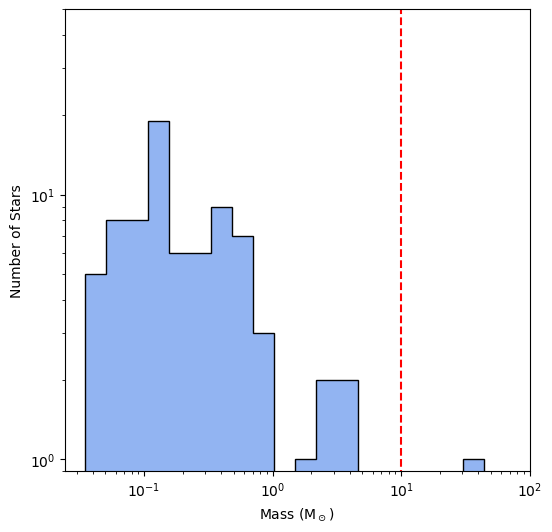

In [17]:
cluster = imf.make_cluster(75)
print(cluster.max())
plt.close()
plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams.update({'font.size': 16}) #set fontsize
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6))
###
ax.set_ylabel('Number of Stars')
ax.set_xlabel('Mass (M$_\odot$)')

mmin, mmax = min(cluster), max(cluster)
cluster_logbins = np.logspace(np.log10(mmin), np.log10(mmax),20)
h1,l1,p1 = ax.hist(cluster,
                   cluster_logbins, color='cornflowerblue',alpha=0.7, log=True)
h1,l1,p1 = ax.hist(cluster,
                   cluster_logbins, color='k',alpha=1.0,histtype='step', log=True)
ax.plot([10,10],[0,100],color='red',ls='--')
ax.set_xscale("log")
ax.set_ylim(0.9,50)
ax.set_xlim(0,100)
plt.show()

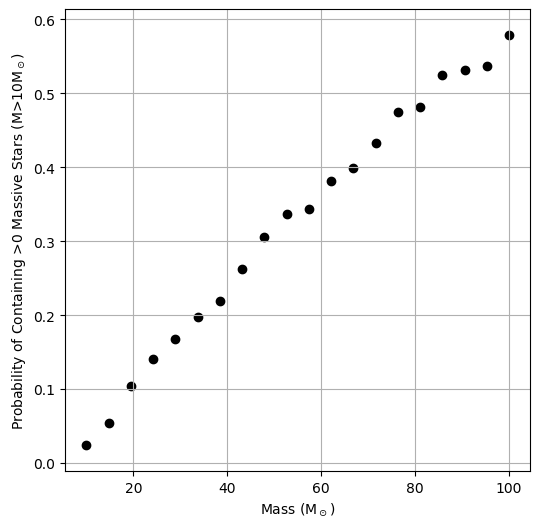

In [18]:
plt.close()
plt.rcParams.update(plt.rcParamsDefault)
#plt.rcParams.update({'font.size': 16}) #set fontsize
fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(6,6))
ax.scatter(lim_vals,num_massive_avg,marker='o',color='k')
ax.set_xlabel('Mass (M$_\odot$)')
ax.set_ylabel('Probability of Containing >0 Massive Stars (M>10M$_\odot$)')
ax.grid()
plt.savefig(path+'imf_completeness.pdf')
plt.show()

In [97]:
print lim_vals
print num_massive_avg

[  10.           14.87179487   19.74358974   24.61538462   29.48717949
   34.35897436   39.23076923   44.1025641    48.97435897   53.84615385
   58.71794872   63.58974359   68.46153846   73.33333333   78.20512821
   83.07692308   87.94871795   92.82051282   97.69230769  102.56410256
  107.43589744  112.30769231  117.17948718  122.05128205  126.92307692
  131.79487179  136.66666667  141.53846154  146.41025641  151.28205128
  156.15384615  161.02564103  165.8974359   170.76923077  175.64102564
  180.51282051  185.38461538  190.25641026  195.12820513  200.        ]
[ 0.028  0.06   0.082  0.12   0.159  0.159  0.219  0.273  0.289  0.361
  0.355  0.386  0.416  0.42   0.467  0.486  0.532  0.557  0.56   0.571
  0.621  0.635  0.645  0.645  0.649  0.651  0.712  0.7    0.705  0.752
  0.74   0.756  0.794  0.755  0.795  0.802  0.804  0.808  0.824  0.825]


(32,)
(32,)


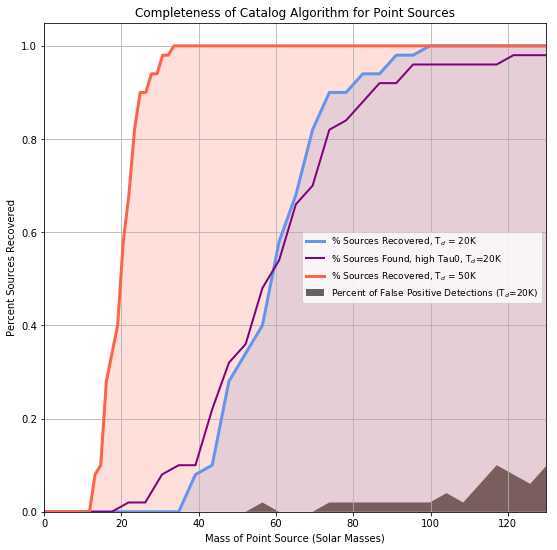

In [8]:
### Plot for mass vs percent found
path='/Users/hph/cmzoom_catalog/catalog_5-28-19/'
### also average runs together
BMAJ    =   9.391762150659E-04
BMIN    =   8.101911677255E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2

found_avg = np.array([1., 1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.98,  0.98,  0.94,  0.94,
                      0.9,   0.9,   0.82,  0.68,  0.58,  0.4,   0.34,  0.28,  0.1,   0.08,  0.,    0.,    0.,
                      0.,    0.,    0.,    0.,    0.,    0.  ])

complete_found = [1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
                  0.9,  0.9,  0.9,  0.9,  0.9,  0.8,  0.8,  0.4,  0.4,  0.3,  0.1,  0.1,  0.2,  0.1,  0., 0.]

complete_found2 = [ 1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
  1.,   1.,   1.,   1.,   0.8,  0.8,  0.5,  0.3,  0.2,  0.2,  0.1,  0.1,  0.1,  0.,   0.,
  0. ]

hightau_avg = np.array([0.98, 0.98,  0.98,  0.98,  0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.92,  0.92,  0.88,
                        0.84,  0.82,  0.7,   0.66,  0.54,  0.48,  0.36,  0.32,  0.22,  0.1,   0.1,   0.08,
                        0.02,  0.02,  0.,    0.,    0.,    0.,    0.])

point_fluxes = np.array([0.5, 0.08,        0.07733667,  0.07467333,  0.07201,     0.06934667,  0.06668333,
                         0.06402,     0.06135667,  0.05869333,  0.05603,     0.05336667,  0.05070333,
                         0.04804,     0.04537667,  0.04271333,  0.04005,     0.03738667,  0.03472333,
                         0.03206,     0.02939667,  0.02673333,  0.02407,     0.02140667,  0.01874333,
                         0.01608,     0.01341667,  0.01075333,  0.00809,     0.00542667,  0.00276333,
                         0.0001    ])# added high flux point for ease of plotting, temporary
#fp_avg = np.array([1.4,  1.4,  1.4,  1.2,  0.8,  1.,   2.,   1.2,  0.8,  0.6,  0.2,  0.2,  0.2,  0.2,  0.,
#                     0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
#                     0. ])
fp_avg = np.array([1, 1.,   0.6, 0.8,  1.,   0.6,  0.2,  0.4,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.2,  0.,
                    0.,   0.,   0.2 , 0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                    0. ])
fp_avg = fp_avg/10.
#integrated_fluxes = point_fluxes*(deg2_per_pix/deg2_per_beam)

select_found = found_avg#complete_found2
select_fp_avg = fp_avg

integrated_fluxes = point_fluxes
masses = mass_calc_submm(Wave,dustTemp,Kappa,integrated_fluxes,distance)
masses_highT = mass_calc_submm(Wave,50.,Kappa,integrated_fluxes,distance)
print(masses.shape)
print(masses_highT.shape)

plt.close()
mrfig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9))
ax.plot(masses, select_found,ls='-',color='cornflowerblue',linewidth=3.0, 
        label='% Sources Recovered, T$_d$ = 20K')
ax.set_xlabel('Mass of Point Source (Solar Masses)')
ax.set_ylabel('Percent Sources Found')
ax.set_title('Completeness of Catalog Algorithm for Point Sources')
ax.set_ylim(0,1.05)
ax.set_xlim(0,130.)
ax.plot(masses, hightau_avg,ls='-',color='purple',linewidth=2.0, label ='% Sources Found, high Tau0, T$_d$=20K' )

ax.grid()
fill = ax.fill_between(masses,select_found, color='cornflowerblue',alpha=0.2,edgecolor='red',linewidth = '0.0')
fill = ax.fill_between(masses,select_fp_avg, color='k',alpha=0.6,edgecolor='k',linewidth = '0.0',
                       label = 'Percent of False Positive Detections (T$_d$=20K)')

ax.plot(masses_highT, select_found,ls='-',color='tomato',linewidth=3.0, 
        label='% Sources Recovered, T$_d$ = 50K')
plt.xlabel('Mass of Point Source (Solar Masses)')
ax.set_ylabel('Percent Sources Recovered')
plt.title('Completeness of Catalog Algorithm for Point Sources')
ax.grid()
fill = ax.fill_between(masses_highT,select_found, color='tomato',alpha=0.2,edgecolor='red',linewidth = '0.0')
#fill = ax.fill_between(masses_highT,select_fp_avg, color='k',alpha=0.2,edgecolor='k',linewidth = '0.0')
plt.legend(loc='center right',fontsize=9)
ax.grid()
#####################################################################
plt.savefig(path+'simobs_percent_5-28-19.pdf')
plt.show()

(30,)
(30,)


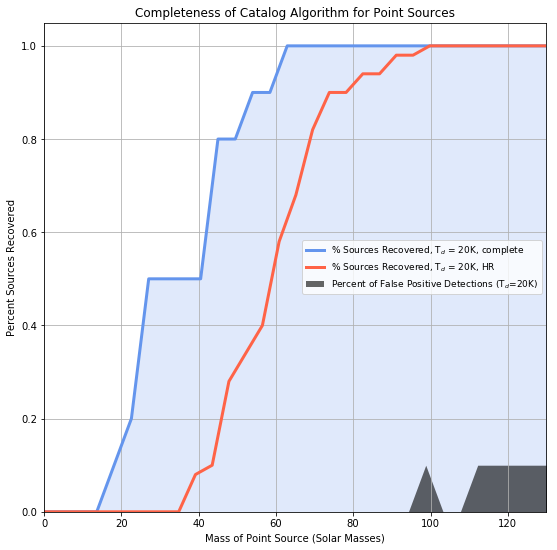

In [24]:
### Plot for mass vs percent found
path='/Users/hph/cmzoom_catalog/catalog_5-28-19/'
### also average runs together
BMAJ    =   9.391762150659E-04
BMIN    =   8.101911677255E-04 
deg2_per_beam = np.pi*BMAJ*BMIN
deg2_per_pix = (1.388888888889E-04)**2

desiredPeakValue = .08#4.*10**7
max_init_Peak = round(desiredPeakValue,3)
desired_Min_Peak = 0.0001
min_Peak = round(desired_Min_Peak,4)
step_array = np.linspace(max_init_Peak, min_Peak,30)

found_avg = np.array([1., 1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    0.98,  0.98,  0.94,  0.94,
                      0.9,   0.9,   0.82,  0.68,  0.58,  0.4,   0.34,  0.28,  0.1,   0.08,  0.,    0.,    0.,
                      0.,    0.,    0.,    0.,    0.,    0.  ])

complete_found = [1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
                  0.9,  0.9,  0.9,  0.9,  0.9,  0.8,  0.8,  0.4,  0.4,  0.3,  0.1,  0.1,  0.2,  0.1,  0., 0.]

complete_found2 = [ 1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
  1.,   1.,   1.,   1.,   0.8,  0.8,  0.5,  0.3,  0.2,  0.2,  0.1,  0.1,  0.1,  0.,   0.,
  0. ]

complete_found3 = np.array([ 1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.9,  0.9,  1.,   0.9,  0.8,
  0.7,  0.3,  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0. ])

complete_found4 = np.array([ 1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   0.9,
  0.7,  0.6,  0.5,  0.5,  0.4,  0.4,  0.4,  0.3,  0.3,  0.2,  0.,   0.,   0.,   0.,   0. ])

complete_found5 = np.array([1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
                            1.,   0.9,  0.9,  0.8,  0.8,  0.5,  0.5, 0.5,  0.5,  0.2,  0.1,  0.,   0.,   0.,   0. ])

hightau_avg = np.array([0.98, 0.98,  0.98,  0.98,  0.96,  0.96,  0.96,  0.96,  0.96,  0.96,  0.92,  0.92,  0.88,
                        0.84,  0.82,  0.7,   0.66,  0.54,  0.48,  0.36,  0.32,  0.22,  0.1,   0.1,   0.08,
                        0.02,  0.02,  0.,    0.,    0.,    0.,    0.])

point_fluxes = np.array([0.5, 0.08,        0.07733667,  0.07467333,  0.07201,     0.06934667,  0.06668333,
                         0.06402,     0.06135667,  0.05869333,  0.05603,     0.05336667,  0.05070333,
                         0.04804,     0.04537667,  0.04271333,  0.04005,     0.03738667,  0.03472333,
                         0.03206,     0.02939667,  0.02673333,  0.02407,     0.02140667,  0.01874333,
                         0.01608,     0.01341667,  0.01075333,  0.00809,     0.00542667,  0.00276333,
                         0.0001    ])# added high flux point for ease of plotting, temporary
point_fluxes2 = np.array([0.06,        0.05800333,  0.05600667,  0.05401,     0.05201333,  0.05001667,
                          0.04802,     0.04602333,  0.04402667,  0.04203,     0.04003333,  0.03803667,
                          0.03604,     0.03404333,  0.03204667,  0.03005,     0.02805333])

#fp_avg = np.array([1.4,  1.4,  1.4,  1.2,  0.8,  1.,   2.,   1.2,  0.8,  0.6,  0.2,  0.2,  0.2,  0.2,  0.,
#                     0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
#                     0. ])
fp_avg = np.array([1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                   0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
fp_avg = fp_avg/10.
#integrated_fluxes = point_fluxes*(deg2_per_pix/deg2_per_beam)

select_found = complete_found5
select_fp_avg = fp_avg
hr_found = found_avg
hr_masses = mass_calc_submm(Wave,dustTemp,Kappa,point_fluxes,distance)

integrated_fluxes = step_array
masses = mass_calc_submm(Wave,dustTemp,Kappa,integrated_fluxes,distance)
masses_highT = mass_calc_submm(Wave,50.,Kappa,integrated_fluxes,distance)
print(masses.shape)
print(masses_highT.shape)

plt.close()
mrfig, ax = plt.subplots(nrows=1,ncols=1,figsize=(9,9))
ax.plot(masses, select_found,ls='-',color='cornflowerblue',linewidth=3.0, 
        label='% Sources Recovered, T$_d$ = 20K, complete')
ax.plot(hr_masses, hr_found,ls='-',color='tomato',linewidth=3.0, 
        label='% Sources Recovered, T$_d$ = 20K, HR')
ax.set_xlabel('Mass of Point Source (Solar Masses)')
ax.set_ylabel('Percent Sources Found')
ax.set_title('Completeness of Catalog Algorithm for Point Sources')
ax.set_ylim(0,1.05)
ax.set_xlim(0,130.)
#ax.plot(masses, hightau_avg,ls='-',color='purple',linewidth=2.0, label ='% Sources Found, high Tau0, T$_d$=20K' )

ax.grid()
fill = ax.fill_between(masses,select_found, color='cornflowerblue',alpha=0.2,edgecolor='red',linewidth = '0.0')
fill = ax.fill_between(masses,select_fp_avg, color='k',alpha=0.6,edgecolor='k',linewidth = '0.0',
                       label = 'Percent of False Positive Detections (T$_d$=20K)')

#ax.plot(masses_highT, select_found,ls='-',color='tomato',linewidth=3.0, 
#        label='% Sources Recovered, T$_d$ = 50K')
plt.xlabel('Mass of Point Source (Solar Masses)')
ax.set_ylabel('Percent Sources Recovered')
plt.title('Completeness of Catalog Algorithm for Point Sources')
ax.grid()
#fill = ax.fill_between(masses_highT,select_found, color='tomato',alpha=0.2,edgecolor='red',linewidth = '0.0')
#fill = ax.fill_between(masses_highT,select_fp_avg, color='k',alpha=0.2,edgecolor='k',linewidth = '0.0')
plt.legend(loc='center right',fontsize=9)
ax.grid()
#####################################################################
#plt.savefig(path+'simobs_percent_5-28-19.pdf')
plt.show()



In [14]:
print(masses.shape)
print(select_found.shape)

(30,)
(32,)


In [58]:
#### Make IMF figure
lim_vals = massbins
percent_has_massive_avg = np.zeros(len(lim_vals))
num_massive_avg = np.zeros(len(lim_vals))
for j in range(len(lim_vals)):
    has_massive = np.zeros(1000)
    num_massive = np.zeros(1000)
    for i in range(1000):
        num_massive[i]=len(np.where(imf.make_cluster(lim_vals[j])>8)[0])
        if num_massive[i]>0: has_massive[i]=1
    percent_has_massive_avg[j]=has_massive.sum()/1000
    num_massive_avg[j] = num_massive.sum()/1000

Total cluster mass is 4.11594 (limit was 4.26769)
Total cluster mass is 3.168 (limit was 4.26769)
Total cluster mass is 4.26068 (limit was 4.26769)
Total cluster mass is 4.36742 (limit was 4.26769)
Total cluster mass is 3.44471 (limit was 4.26769)
Total cluster mass is 5.22102 (limit was 4.26769)
Total cluster mass is 4.31133 (limit was 4.26769)
Total cluster mass is 0.378704 (limit was 4.26769)
Total cluster mass is 4.09379 (limit was 4.26769)
Total cluster mass is 3.94684 (limit was 4.26769)
Total cluster mass is 4.20225 (limit was 4.26769)
Total cluster mass is 4.16539 (limit was 4.26769)
Total cluster mass is 6.37079 (limit was 4.26769)
Total cluster mass is 4.42035 (limit was 4.26769)
Total cluster mass is 4.27795 (limit was 4.26769)
Total cluster mass is 4.21475 (limit was 4.26769)
Total cluster mass is 4.24456 (limit was 4.26769)
Total cluster mass is 4.27839 (limit was 4.26769)
Total cluster mass is 4.12455 (limit was 4.26769)
Total cluster mass is 4.39691 (limit was 4.26769)
T

Total cluster mass is 4.15708 (limit was 4.26769)
Total cluster mass is 3.50645 (limit was 4.26769)
Total cluster mass is 4.50527 (limit was 4.26769)
Total cluster mass is 3.90706 (limit was 4.26769)
Total cluster mass is 3.93821 (limit was 4.26769)
Total cluster mass is 4.53612 (limit was 4.26769)
Total cluster mass is 2.19429 (limit was 4.26769)
Total cluster mass is 4.10122 (limit was 4.26769)
Total cluster mass is 2.14734 (limit was 4.26769)
Total cluster mass is 5.47258 (limit was 4.26769)
Total cluster mass is 4.82787 (limit was 4.26769)
Total cluster mass is 4.26385 (limit was 4.26769)
Total cluster mass is 4.37969 (limit was 4.26769)
Total cluster mass is 4.02365 (limit was 4.26769)
Total cluster mass is 4.85147 (limit was 4.26769)
Total cluster mass is 4.2541 (limit was 4.26769)
Total cluster mass is 4.07145 (limit was 4.26769)
Total cluster mass is 4.26807 (limit was 4.26769)
Total cluster mass is 3.91683 (limit was 4.26769)
Total cluster mass is 4.29494 (limit was 4.26769)
T

Total cluster mass is 3.27476 (limit was 4.26769)
Total cluster mass is 4.45903 (limit was 4.26769)
Total cluster mass is 4.40858 (limit was 4.26769)
Total cluster mass is 4.26603 (limit was 4.26769)
Total cluster mass is 4.13463 (limit was 4.26769)
Total cluster mass is 3.24859 (limit was 4.26769)
Total cluster mass is 3.95957 (limit was 4.26769)
Total cluster mass is 4.54636 (limit was 4.26769)
Total cluster mass is 4.78419 (limit was 4.26769)
Total cluster mass is 4.51284 (limit was 4.26769)
Total cluster mass is 0.497811 (limit was 4.26769)
Total cluster mass is 1.97837 (limit was 4.26769)
Total cluster mass is 6.37438 (limit was 4.26769)
Total cluster mass is 4.37147 (limit was 4.26769)
Total cluster mass is 4.19698 (limit was 4.26769)
Total cluster mass is 4.39608 (limit was 4.26769)
Total cluster mass is 4.27598 (limit was 4.26769)
Total cluster mass is 4.43879 (limit was 4.26769)
Total cluster mass is 4.21999 (limit was 4.26769)
Total cluster mass is 4.38122 (limit was 4.26769)

Total cluster mass is 4.32232 (limit was 4.26769)
Total cluster mass is 4.28172 (limit was 4.26769)
Total cluster mass is 4.3024 (limit was 4.26769)
Total cluster mass is 4.47403 (limit was 4.26769)
Total cluster mass is 4.4089 (limit was 4.26769)
Total cluster mass is 4.17898 (limit was 4.26769)
Total cluster mass is 4.35756 (limit was 4.26769)
Total cluster mass is 4.26904 (limit was 4.26769)
Total cluster mass is 4.80309 (limit was 4.26769)
Total cluster mass is 4.14351 (limit was 4.26769)
Total cluster mass is 4.22956 (limit was 4.26769)
Total cluster mass is 5.40496 (limit was 4.26769)
Total cluster mass is 4.51037 (limit was 4.26769)
Total cluster mass is 4.20429 (limit was 4.26769)
Total cluster mass is 4.39445 (limit was 4.26769)
Total cluster mass is 3.70441 (limit was 4.26769)
Total cluster mass is 4.77044 (limit was 4.26769)
Total cluster mass is 3.76392 (limit was 4.26769)
Total cluster mass is 4.36901 (limit was 4.26769)
Total cluster mass is 2.95115 (limit was 4.26769)
To

Total cluster mass is 8.23014 (limit was 8.61829)
Total cluster mass is 8.59625 (limit was 8.61829)
Total cluster mass is 8.68244 (limit was 8.61829)
Total cluster mass is 8.67235 (limit was 8.61829)
Total cluster mass is 8.8543 (limit was 8.61829)
Total cluster mass is 8.57951 (limit was 8.61829)
Total cluster mass is 9.15025 (limit was 8.61829)
Total cluster mass is 8.78455 (limit was 8.61829)
Total cluster mass is 8.49174 (limit was 8.61829)
Total cluster mass is 3.08957 (limit was 8.61829)
Total cluster mass is 8.58737 (limit was 8.61829)
Total cluster mass is 8.56271 (limit was 8.61829)
Total cluster mass is 12.8105 (limit was 8.61829)
Total cluster mass is 8.7843 (limit was 8.61829)
Total cluster mass is 8.59109 (limit was 8.61829)
Total cluster mass is 8.83689 (limit was 8.61829)
Total cluster mass is 8.76065 (limit was 8.61829)
Total cluster mass is 9.12773 (limit was 8.61829)
Total cluster mass is 13.5951 (limit was 8.61829)
Total cluster mass is 8.67499 (limit was 8.61829)
To

Total cluster mass is 8.46332 (limit was 8.61829)
Total cluster mass is 8.57764 (limit was 8.61829)
Total cluster mass is 8.40184 (limit was 8.61829)
Total cluster mass is 8.78014 (limit was 8.61829)
Total cluster mass is 8.28265 (limit was 8.61829)
Total cluster mass is 8.61796 (limit was 8.61829)
Total cluster mass is 7.83529 (limit was 8.61829)
Total cluster mass is 8.65446 (limit was 8.61829)
Total cluster mass is 8.59121 (limit was 8.61829)
Total cluster mass is 6.50742 (limit was 8.61829)
Total cluster mass is 9.00462 (limit was 8.61829)
Total cluster mass is 4.34012 (limit was 8.61829)
Total cluster mass is 7.51111 (limit was 8.61829)
Total cluster mass is 8.68931 (limit was 8.61829)
Total cluster mass is 8.85869 (limit was 8.61829)
Total cluster mass is 8.61344 (limit was 8.61829)
Total cluster mass is 8.58602 (limit was 8.61829)
Total cluster mass is 8.61638 (limit was 8.61829)
Total cluster mass is 8.51205 (limit was 8.61829)
Total cluster mass is 8.75596 (limit was 8.61829)


Total cluster mass is 8.60825 (limit was 8.61829)
Total cluster mass is 8.39305 (limit was 8.61829)
Total cluster mass is 7.95856 (limit was 8.61829)
Total cluster mass is 8.60658 (limit was 8.61829)
Total cluster mass is 8.71738 (limit was 8.61829)
Total cluster mass is 8.19736 (limit was 8.61829)
Total cluster mass is 5.64844 (limit was 8.61829)
Total cluster mass is 5.98024 (limit was 8.61829)
Total cluster mass is 8.60746 (limit was 8.61829)
Total cluster mass is 8.37773 (limit was 8.61829)
Total cluster mass is 8.64477 (limit was 8.61829)
Total cluster mass is 8.57445 (limit was 8.61829)
Total cluster mass is 8.96249 (limit was 8.61829)
Total cluster mass is 8.50466 (limit was 8.61829)
Total cluster mass is 7.85152 (limit was 8.61829)
Total cluster mass is 10.2294 (limit was 8.61829)
Total cluster mass is 8.93422 (limit was 8.61829)
Total cluster mass is 8.42258 (limit was 8.61829)
Total cluster mass is 9.80059 (limit was 8.61829)
Total cluster mass is 7.29809 (limit was 8.61829)


Total cluster mass is 9.46656 (limit was 8.61829)
Total cluster mass is 8.04688 (limit was 8.61829)
Total cluster mass is 9.11194 (limit was 8.61829)
Total cluster mass is 8.52244 (limit was 8.61829)
Total cluster mass is 8.6879 (limit was 8.61829)
Total cluster mass is 8.55696 (limit was 8.61829)
Total cluster mass is 8.77374 (limit was 8.61829)
Total cluster mass is 8.63255 (limit was 8.61829)
Total cluster mass is 7.67424 (limit was 8.61829)
Total cluster mass is 8.37576 (limit was 8.61829)
Total cluster mass is 6.68921 (limit was 8.61829)
Total cluster mass is 8.50783 (limit was 8.61829)
Total cluster mass is 9.24468 (limit was 8.61829)
Total cluster mass is 8.78878 (limit was 8.61829)
Total cluster mass is 8.68974 (limit was 8.61829)
Total cluster mass is 10.9393 (limit was 8.61829)
Total cluster mass is 7.57681 (limit was 8.61829)
Total cluster mass is 9.05483 (limit was 8.61829)
Total cluster mass is 6.47779 (limit was 8.61829)
Total cluster mass is 12.1486 (limit was 8.61829)
T

Total cluster mass is 8.33764 (limit was 8.61829)
Total cluster mass is 8.39295 (limit was 8.61829)
Total cluster mass is 8.70454 (limit was 8.61829)
Total cluster mass is 8.00189 (limit was 8.61829)
Total cluster mass is 9.41854 (limit was 8.61829)
Total cluster mass is 8.61635 (limit was 8.61829)
Total cluster mass is 8.02017 (limit was 8.61829)
Total cluster mass is 8.65694 (limit was 8.61829)
Total cluster mass is 8.68114 (limit was 8.61829)
Total cluster mass is 8.40122 (limit was 8.61829)
Total cluster mass is 9.06197 (limit was 8.61829)
Total cluster mass is 8.59744 (limit was 8.61829)
Total cluster mass is 0.377246 (limit was 8.61829)
Total cluster mass is 3.88767 (limit was 8.61829)
Total cluster mass is 8.51623 (limit was 8.61829)
Total cluster mass is 8.31055 (limit was 8.61829)
Total cluster mass is 8.70802 (limit was 8.61829)
Total cluster mass is 8.58473 (limit was 8.61829)
Total cluster mass is 9.87967 (limit was 8.61829)
Total cluster mass is 8.34281 (limit was 8.61829)

Total cluster mass is 16.9525 (limit was 17.404)
Total cluster mass is 16.9358 (limit was 17.404)
Total cluster mass is 17.2047 (limit was 17.404)
Total cluster mass is 17.4471 (limit was 17.404)
Total cluster mass is 17.3644 (limit was 17.404)
Total cluster mass is 17.5395 (limit was 17.404)
Total cluster mass is 17.4143 (limit was 17.404)
Total cluster mass is 17.5393 (limit was 17.404)
Total cluster mass is 17.4062 (limit was 17.404)
Total cluster mass is 17.4583 (limit was 17.404)
Total cluster mass is 16.626 (limit was 17.404)
Total cluster mass is 17.5659 (limit was 17.404)
Total cluster mass is 14.3392 (limit was 17.404)
Total cluster mass is 17.0464 (limit was 17.404)
Total cluster mass is 17.7569 (limit was 17.404)
Total cluster mass is 17.4264 (limit was 17.404)
Total cluster mass is 17.4424 (limit was 17.404)
Total cluster mass is 17.3105 (limit was 17.404)
Total cluster mass is 17.3489 (limit was 17.404)
Total cluster mass is 17.3131 (limit was 17.404)
Total cluster mass is

Total cluster mass is 17.0103 (limit was 17.404)
Total cluster mass is 18.4948 (limit was 17.404)
Total cluster mass is 17.7309 (limit was 17.404)
Total cluster mass is 16.8931 (limit was 17.404)
Total cluster mass is 17.3526 (limit was 17.404)
Total cluster mass is 18.3076 (limit was 17.404)
Total cluster mass is 17.2531 (limit was 17.404)
Total cluster mass is 17.6927 (limit was 17.404)
Total cluster mass is 17.4104 (limit was 17.404)
Total cluster mass is 17.4646 (limit was 17.404)
Total cluster mass is 17.3967 (limit was 17.404)
Total cluster mass is 17.9585 (limit was 17.404)
Total cluster mass is 17.3438 (limit was 17.404)
Total cluster mass is 4.46026 (limit was 17.404)
Total cluster mass is 17.4012 (limit was 17.404)
Total cluster mass is 17.4642 (limit was 17.404)
Total cluster mass is 17.0395 (limit was 17.404)
Total cluster mass is 6.48313 (limit was 17.404)
Total cluster mass is 17.4453 (limit was 17.404)
Total cluster mass is 15.1683 (limit was 17.404)
Total cluster mass i

Total cluster mass is 17.4192 (limit was 17.404)
Total cluster mass is 23.2665 (limit was 17.404)
Total cluster mass is 20.0911 (limit was 17.404)
Total cluster mass is 17.4364 (limit was 17.404)
Total cluster mass is 17.7623 (limit was 17.404)
Total cluster mass is 17.5285 (limit was 17.404)
Total cluster mass is 16.433 (limit was 17.404)
Total cluster mass is 16.6761 (limit was 17.404)
Total cluster mass is 17.3339 (limit was 17.404)
Total cluster mass is 16.4512 (limit was 17.404)
Total cluster mass is 17.5532 (limit was 17.404)
Total cluster mass is 16.9488 (limit was 17.404)
Total cluster mass is 17.3301 (limit was 17.404)
Total cluster mass is 13.5925 (limit was 17.404)
Total cluster mass is 17.5486 (limit was 17.404)
Total cluster mass is 17.8536 (limit was 17.404)
Total cluster mass is 7.96035 (limit was 17.404)
Total cluster mass is 17.312 (limit was 17.404)
Total cluster mass is 17.9495 (limit was 17.404)
Total cluster mass is 17.6652 (limit was 17.404)
Total cluster mass is 

Total cluster mass is 16.1241 (limit was 17.404)
Total cluster mass is 17.3768 (limit was 17.404)
Total cluster mass is 17.3951 (limit was 17.404)
Total cluster mass is 16.1775 (limit was 17.404)
Total cluster mass is 17.318 (limit was 17.404)
Total cluster mass is 17.2791 (limit was 17.404)
Total cluster mass is 17.6871 (limit was 17.404)
Total cluster mass is 17.3288 (limit was 17.404)
Total cluster mass is 21.455 (limit was 17.404)
Total cluster mass is 10.5029 (limit was 17.404)
Total cluster mass is 17.814 (limit was 17.404)
Total cluster mass is 17.4377 (limit was 17.404)
Total cluster mass is 13.7769 (limit was 17.404)
Total cluster mass is 23.8059 (limit was 17.404)
Total cluster mass is 17.4686 (limit was 17.404)
Total cluster mass is 14.4063 (limit was 17.404)
Total cluster mass is 17.42 (limit was 17.404)
Total cluster mass is 17.3465 (limit was 17.404)
Total cluster mass is 17.2749 (limit was 17.404)
Total cluster mass is 17.3161 (limit was 17.404)
Total cluster mass is 16.

Total cluster mass is 31.6224 (limit was 35.1462)
Total cluster mass is 34.9189 (limit was 35.1462)
Total cluster mass is 35.0054 (limit was 35.1462)
Total cluster mass is 35.0699 (limit was 35.1462)
Total cluster mass is 24.0236 (limit was 35.1462)
Total cluster mass is 36.7406 (limit was 35.1462)
Total cluster mass is 28.835 (limit was 35.1462)
Total cluster mass is 35.1861 (limit was 35.1462)
Total cluster mass is 35.3449 (limit was 35.1462)
Total cluster mass is 33.8945 (limit was 35.1462)
Total cluster mass is 34.7647 (limit was 35.1462)
Total cluster mass is 35.1706 (limit was 35.1462)
Total cluster mass is 35.7902 (limit was 35.1462)
Total cluster mass is 34.0827 (limit was 35.1462)
Total cluster mass is 35.23 (limit was 35.1462)
Total cluster mass is 35.1609 (limit was 35.1462)
Total cluster mass is 33.5517 (limit was 35.1462)
Total cluster mass is 35.1587 (limit was 35.1462)
Total cluster mass is 32.308 (limit was 35.1462)
Total cluster mass is 37.2821 (limit was 35.1462)
Tota

Total cluster mass is 35.055 (limit was 35.1462)
Total cluster mass is 36.2177 (limit was 35.1462)
Total cluster mass is 35.1179 (limit was 35.1462)
Total cluster mass is 38.0214 (limit was 35.1462)
Total cluster mass is 36.914 (limit was 35.1462)
Total cluster mass is 33.2019 (limit was 35.1462)
Total cluster mass is 35.0727 (limit was 35.1462)
Total cluster mass is 34.1112 (limit was 35.1462)
Total cluster mass is 35.1584 (limit was 35.1462)
Total cluster mass is 35.0014 (limit was 35.1462)
Total cluster mass is 35.13 (limit was 35.1462)
Total cluster mass is 35.1143 (limit was 35.1462)
Total cluster mass is 41.9415 (limit was 35.1462)
Total cluster mass is 35.1011 (limit was 35.1462)
Total cluster mass is 35.4931 (limit was 35.1462)
Total cluster mass is 34.8267 (limit was 35.1462)
Total cluster mass is 35.1799 (limit was 35.1462)
Total cluster mass is 34.9767 (limit was 35.1462)
Total cluster mass is 39.4016 (limit was 35.1462)
Total cluster mass is 35.2618 (limit was 35.1462)
Tota

Total cluster mass is 41.169 (limit was 35.1462)
Total cluster mass is 35.0548 (limit was 35.1462)
Total cluster mass is 35.3176 (limit was 35.1462)
Total cluster mass is 35.8561 (limit was 35.1462)
Total cluster mass is 35.0052 (limit was 35.1462)
Total cluster mass is 34.9881 (limit was 35.1462)
Total cluster mass is 34.6146 (limit was 35.1462)
Total cluster mass is 25.5138 (limit was 35.1462)
Total cluster mass is 34.2322 (limit was 35.1462)
Total cluster mass is 37.3516 (limit was 35.1462)
Total cluster mass is 34.8971 (limit was 35.1462)
Total cluster mass is 35.1302 (limit was 35.1462)
Total cluster mass is 35.6363 (limit was 35.1462)
Total cluster mass is 35.9286 (limit was 35.1462)
Total cluster mass is 35.3956 (limit was 35.1462)
Total cluster mass is 31.4871 (limit was 35.1462)
Total cluster mass is 35.1538 (limit was 35.1462)
Total cluster mass is 35.0718 (limit was 35.1462)
Total cluster mass is 34.3015 (limit was 35.1462)
Total cluster mass is 50.949 (limit was 35.1462)
To

Total cluster mass is 34.9987 (limit was 35.1462)
Total cluster mass is 38.1878 (limit was 35.1462)
Total cluster mass is 36.3978 (limit was 35.1462)
Total cluster mass is 35.6965 (limit was 35.1462)
Total cluster mass is 39.0964 (limit was 35.1462)
Total cluster mass is 35.2682 (limit was 35.1462)
Total cluster mass is 34.5802 (limit was 35.1462)
Total cluster mass is 35.1552 (limit was 35.1462)
Total cluster mass is 35.1749 (limit was 35.1462)
Total cluster mass is 15.2972 (limit was 35.1462)
Total cluster mass is 35.2512 (limit was 35.1462)
Total cluster mass is 35.1723 (limit was 35.1462)
Total cluster mass is 33.1505 (limit was 35.1462)
Total cluster mass is 35.0478 (limit was 35.1462)
Total cluster mass is 34.8347 (limit was 35.1462)
Total cluster mass is 34.9784 (limit was 35.1462)
Total cluster mass is 46.4566 (limit was 35.1462)
Total cluster mass is 35.5326 (limit was 35.1462)
Total cluster mass is 35.1761 (limit was 35.1462)
Total cluster mass is 35.3327 (limit was 35.1462)


Total cluster mass is 35.1354 (limit was 35.1462)
Total cluster mass is 35.0226 (limit was 35.1462)
Total cluster mass is 32.8579 (limit was 35.1462)
Total cluster mass is 35.4851 (limit was 35.1462)
Total cluster mass is 34.7108 (limit was 35.1462)
Total cluster mass is 35.1075 (limit was 35.1462)
Total cluster mass is 34.5335 (limit was 35.1462)
Total cluster mass is 39.9367 (limit was 35.1462)
Total cluster mass is 35.1035 (limit was 35.1462)
Total cluster mass is 35.0933 (limit was 35.1462)
Total cluster mass is 35.0757 (limit was 35.1462)
Total cluster mass is 35.1168 (limit was 35.1462)
Total cluster mass is 35.0723 (limit was 35.1462)
Total cluster mass is 35.2144 (limit was 35.1462)
Total cluster mass is 35.0363 (limit was 35.1462)
Total cluster mass is 35.4702 (limit was 35.1462)
Total cluster mass is 35.2835 (limit was 35.1462)
Total cluster mass is 35.1339 (limit was 35.1462)
Total cluster mass is 35.2419 (limit was 35.1462)
Total cluster mass is 35.177 (limit was 35.1462)
T

Total cluster mass is 87.5564 (limit was 70.9752)
Total cluster mass is 71.3191 (limit was 70.9752)
Total cluster mass is 71.1015 (limit was 70.9752)
Total cluster mass is 87.1454 (limit was 70.9752)
Total cluster mass is 70.9944 (limit was 70.9752)
Total cluster mass is 70.9963 (limit was 70.9752)
Total cluster mass is 70.8876 (limit was 70.9752)
Total cluster mass is 70.9962 (limit was 70.9752)
Total cluster mass is 77.82 (limit was 70.9752)
Total cluster mass is 70.9924 (limit was 70.9752)
Total cluster mass is 71.7633 (limit was 70.9752)
Total cluster mass is 70.894 (limit was 70.9752)
Total cluster mass is 70.9454 (limit was 70.9752)
Total cluster mass is 71.0203 (limit was 70.9752)
Total cluster mass is 71.4328 (limit was 70.9752)
Total cluster mass is 71.2808 (limit was 70.9752)
Total cluster mass is 73.3297 (limit was 70.9752)
Total cluster mass is 72.163 (limit was 70.9752)
Total cluster mass is 65.1441 (limit was 70.9752)
Total cluster mass is 69.9546 (limit was 70.9752)
Tota

Total cluster mass is 71.4798 (limit was 70.9752)
Total cluster mass is 71.0274 (limit was 70.9752)
Total cluster mass is 70.8647 (limit was 70.9752)
Total cluster mass is 70.9797 (limit was 70.9752)
Total cluster mass is 70.8738 (limit was 70.9752)
Total cluster mass is 74.9768 (limit was 70.9752)
Total cluster mass is 70.9156 (limit was 70.9752)
Total cluster mass is 71.1209 (limit was 70.9752)
Total cluster mass is 70.518 (limit was 70.9752)
Total cluster mass is 75.5037 (limit was 70.9752)
Total cluster mass is 72.9763 (limit was 70.9752)
Total cluster mass is 70.344 (limit was 70.9752)
Total cluster mass is 70.9446 (limit was 70.9752)
Total cluster mass is 70.3416 (limit was 70.9752)
Total cluster mass is 80.2527 (limit was 70.9752)
Total cluster mass is 74.5799 (limit was 70.9752)
Total cluster mass is 71.1446 (limit was 70.9752)
Total cluster mass is 71.3206 (limit was 70.9752)
Total cluster mass is 70.9482 (limit was 70.9752)
Total cluster mass is 71.1689 (limit was 70.9752)
To

Total cluster mass is 70.6094 (limit was 70.9752)
Total cluster mass is 70.9697 (limit was 70.9752)
Total cluster mass is 70.5264 (limit was 70.9752)
Total cluster mass is 71.2749 (limit was 70.9752)
Total cluster mass is 74.4614 (limit was 70.9752)
Total cluster mass is 73.0231 (limit was 70.9752)
Total cluster mass is 72.0084 (limit was 70.9752)
Total cluster mass is 71.2931 (limit was 70.9752)
Total cluster mass is 70.6058 (limit was 70.9752)
Total cluster mass is 71.6824 (limit was 70.9752)
Total cluster mass is 71.0289 (limit was 70.9752)
Total cluster mass is 81.1116 (limit was 70.9752)
Total cluster mass is 71.0245 (limit was 70.9752)
Total cluster mass is 73.1174 (limit was 70.9752)
Total cluster mass is 70.9646 (limit was 70.9752)
Total cluster mass is 71.3169 (limit was 70.9752)
Total cluster mass is 70.9615 (limit was 70.9752)
Total cluster mass is 70.9525 (limit was 70.9752)
Total cluster mass is 71.0109 (limit was 70.9752)
Total cluster mass is 79.2384 (limit was 70.9752)


Total cluster mass is 70.688 (limit was 70.9752)
Total cluster mass is 48.0577 (limit was 70.9752)
Total cluster mass is 70.6255 (limit was 70.9752)
Total cluster mass is 71.0106 (limit was 70.9752)
Total cluster mass is 70.8866 (limit was 70.9752)
Total cluster mass is 74.1295 (limit was 70.9752)
Total cluster mass is 71.5249 (limit was 70.9752)
Total cluster mass is 70.2787 (limit was 70.9752)
Total cluster mass is 76.2599 (limit was 70.9752)
Total cluster mass is 70.855 (limit was 70.9752)
Total cluster mass is 46.9029 (limit was 70.9752)
Total cluster mass is 72.6359 (limit was 70.9752)
Total cluster mass is 70.9963 (limit was 70.9752)
Total cluster mass is 71.3724 (limit was 70.9752)
Total cluster mass is 80.8274 (limit was 70.9752)
Total cluster mass is 71.3248 (limit was 70.9752)
Total cluster mass is 70.967 (limit was 70.9752)
Total cluster mass is 71.3685 (limit was 70.9752)
Total cluster mass is 69.5483 (limit was 70.9752)
Total cluster mass is 75.6024 (limit was 70.9752)
Tot

Total cluster mass is 71.1574 (limit was 70.9752)
Total cluster mass is 70.6581 (limit was 70.9752)
Total cluster mass is 71.194 (limit was 70.9752)
Total cluster mass is 79.8723 (limit was 70.9752)
Total cluster mass is 70.4534 (limit was 70.9752)
Total cluster mass is 70.9911 (limit was 70.9752)
Total cluster mass is 70.912 (limit was 70.9752)
Total cluster mass is 70.731 (limit was 70.9752)
Total cluster mass is 70.4038 (limit was 70.9752)
Total cluster mass is 71.1303 (limit was 70.9752)
Total cluster mass is 70.8979 (limit was 70.9752)
Total cluster mass is 71.3051 (limit was 70.9752)
Total cluster mass is 71.3489 (limit was 70.9752)
Total cluster mass is 70.9933 (limit was 70.9752)
Total cluster mass is 70.9683 (limit was 70.9752)
Total cluster mass is 71.1268 (limit was 70.9752)
Total cluster mass is 71.1073 (limit was 70.9752)
Total cluster mass is 71.8172 (limit was 70.9752)
Total cluster mass is 23.6406 (limit was 70.9752)
Total cluster mass is 71.3094 (limit was 70.9752)
Tot

Total cluster mass is 143.309 (limit was 143.329)
Total cluster mass is 143.356 (limit was 143.329)
Total cluster mass is 154.022 (limit was 143.329)
Total cluster mass is 143.127 (limit was 143.329)
Total cluster mass is 143.118 (limit was 143.329)
Total cluster mass is 143.265 (limit was 143.329)
Total cluster mass is 143.089 (limit was 143.329)
Total cluster mass is 143.381 (limit was 143.329)
Total cluster mass is 176.706 (limit was 143.329)
Total cluster mass is 152.759 (limit was 143.329)
Total cluster mass is 143.358 (limit was 143.329)
Total cluster mass is 143.377 (limit was 143.329)
Total cluster mass is 143.294 (limit was 143.329)
Total cluster mass is 143.543 (limit was 143.329)
Total cluster mass is 143.707 (limit was 143.329)
Total cluster mass is 145.539 (limit was 143.329)
Total cluster mass is 147.229 (limit was 143.329)
Total cluster mass is 142.808 (limit was 143.329)
Total cluster mass is 142.543 (limit was 143.329)
Total cluster mass is 155.514 (limit was 143.329)


Total cluster mass is 146.18 (limit was 143.329)
Total cluster mass is 144.879 (limit was 143.329)
Total cluster mass is 143.236 (limit was 143.329)
Total cluster mass is 143.275 (limit was 143.329)
Total cluster mass is 142.553 (limit was 143.329)
Total cluster mass is 140.24 (limit was 143.329)
Total cluster mass is 134.379 (limit was 143.329)
Total cluster mass is 147.292 (limit was 143.329)
Total cluster mass is 141.403 (limit was 143.329)
Total cluster mass is 143.218 (limit was 143.329)
Total cluster mass is 143.789 (limit was 143.329)
Total cluster mass is 164.751 (limit was 143.329)
Total cluster mass is 143.321 (limit was 143.329)
Total cluster mass is 143.044 (limit was 143.329)
Total cluster mass is 143.672 (limit was 143.329)
Total cluster mass is 159.516 (limit was 143.329)
Total cluster mass is 143.822 (limit was 143.329)
Total cluster mass is 139.269 (limit was 143.329)
Total cluster mass is 144.121 (limit was 143.329)
Total cluster mass is 145.307 (limit was 143.329)
To

Total cluster mass is 143.264 (limit was 143.329)
Total cluster mass is 143.177 (limit was 143.329)
Total cluster mass is 143.189 (limit was 143.329)
Total cluster mass is 143.387 (limit was 143.329)
Total cluster mass is 143.244 (limit was 143.329)
Total cluster mass is 142.927 (limit was 143.329)
Total cluster mass is 116.672 (limit was 143.329)
Total cluster mass is 143.493 (limit was 143.329)
Total cluster mass is 143.262 (limit was 143.329)
Total cluster mass is 143.348 (limit was 143.329)
Total cluster mass is 138.003 (limit was 143.329)
Total cluster mass is 143.369 (limit was 143.329)
Total cluster mass is 143.294 (limit was 143.329)
Total cluster mass is 157.039 (limit was 143.329)
Total cluster mass is 143.457 (limit was 143.329)
Total cluster mass is 143.191 (limit was 143.329)
Total cluster mass is 148.38 (limit was 143.329)
Total cluster mass is 145.205 (limit was 143.329)
Total cluster mass is 143.792 (limit was 143.329)
Total cluster mass is 143.927 (limit was 143.329)
T

Total cluster mass is 143.31 (limit was 143.329)
Total cluster mass is 141.725 (limit was 143.329)
Total cluster mass is 143.316 (limit was 143.329)
Total cluster mass is 143.372 (limit was 143.329)
Total cluster mass is 142.967 (limit was 143.329)
Total cluster mass is 143.185 (limit was 143.329)
Total cluster mass is 143.4 (limit was 143.329)
Total cluster mass is 143.641 (limit was 143.329)
Total cluster mass is 148.259 (limit was 143.329)
Total cluster mass is 143.133 (limit was 143.329)
Total cluster mass is 143.397 (limit was 143.329)
Total cluster mass is 141.489 (limit was 143.329)
Total cluster mass is 142.89 (limit was 143.329)
Total cluster mass is 143.51 (limit was 143.329)
Total cluster mass is 133.326 (limit was 143.329)
Total cluster mass is 143.296 (limit was 143.329)
Total cluster mass is 143.566 (limit was 143.329)
Total cluster mass is 143.347 (limit was 143.329)
Total cluster mass is 143.373 (limit was 143.329)
Total cluster mass is 143.303 (limit was 143.329)
Total

Total cluster mass is 290.199 (limit was 289.443)
Total cluster mass is 289.9 (limit was 289.443)
Total cluster mass is 290.612 (limit was 289.443)
Total cluster mass is 289.405 (limit was 289.443)
Total cluster mass is 289.435 (limit was 289.443)
Total cluster mass is 289.578 (limit was 289.443)
Total cluster mass is 289.491 (limit was 289.443)
Total cluster mass is 289.343 (limit was 289.443)
Total cluster mass is 289.182 (limit was 289.443)
Total cluster mass is 289.454 (limit was 289.443)
Total cluster mass is 297.558 (limit was 289.443)
Total cluster mass is 302.437 (limit was 289.443)
Total cluster mass is 314.104 (limit was 289.443)
Total cluster mass is 289.272 (limit was 289.443)
Total cluster mass is 289.334 (limit was 289.443)
Total cluster mass is 289.298 (limit was 289.443)
Total cluster mass is 289.473 (limit was 289.443)
Total cluster mass is 289.432 (limit was 289.443)
Total cluster mass is 289.37 (limit was 289.443)
Total cluster mass is 288.996 (limit was 289.443)
Tot

Total cluster mass is 290.304 (limit was 289.443)
Total cluster mass is 289.639 (limit was 289.443)
Total cluster mass is 289.387 (limit was 289.443)
Total cluster mass is 289.581 (limit was 289.443)
Total cluster mass is 289.871 (limit was 289.443)
Total cluster mass is 289.574 (limit was 289.443)
Total cluster mass is 291.554 (limit was 289.443)
Total cluster mass is 289.448 (limit was 289.443)
Total cluster mass is 289.79 (limit was 289.443)
Total cluster mass is 289.509 (limit was 289.443)
Total cluster mass is 292.732 (limit was 289.443)
Total cluster mass is 289.28 (limit was 289.443)
Total cluster mass is 289.4 (limit was 289.443)
Total cluster mass is 291.721 (limit was 289.443)
Total cluster mass is 289.361 (limit was 289.443)
Total cluster mass is 288.729 (limit was 289.443)
Total cluster mass is 289.464 (limit was 289.443)
Total cluster mass is 290.107 (limit was 289.443)
Total cluster mass is 289.46 (limit was 289.443)
Total cluster mass is 259.722 (limit was 289.443)
Total

Total cluster mass is 289.375 (limit was 289.443)
Total cluster mass is 289.258 (limit was 289.443)
Total cluster mass is 282.934 (limit was 289.443)
Total cluster mass is 289.368 (limit was 289.443)
Total cluster mass is 288.74 (limit was 289.443)
Total cluster mass is 289.33 (limit was 289.443)
Total cluster mass is 289.25 (limit was 289.443)
Total cluster mass is 289.54 (limit was 289.443)
Total cluster mass is 289.606 (limit was 289.443)
Total cluster mass is 289.996 (limit was 289.443)
Total cluster mass is 289.276 (limit was 289.443)
Total cluster mass is 284.015 (limit was 289.443)
Total cluster mass is 291.679 (limit was 289.443)
Total cluster mass is 301.724 (limit was 289.443)
Total cluster mass is 289.586 (limit was 289.443)
Total cluster mass is 289.944 (limit was 289.443)
Total cluster mass is 289.783 (limit was 289.443)
Total cluster mass is 289.537 (limit was 289.443)
Total cluster mass is 290.606 (limit was 289.443)
Total cluster mass is 289.446 (limit was 289.443)
Tota

Total cluster mass is 289.203 (limit was 289.443)
Total cluster mass is 289.403 (limit was 289.443)
Total cluster mass is 289.419 (limit was 289.443)
Total cluster mass is 289.731 (limit was 289.443)
Total cluster mass is 290.007 (limit was 289.443)
Total cluster mass is 288.246 (limit was 289.443)
Total cluster mass is 280.105 (limit was 289.443)
Total cluster mass is 287.749 (limit was 289.443)
Total cluster mass is 288.927 (limit was 289.443)
Total cluster mass is 262.515 (limit was 289.443)
Total cluster mass is 289.856 (limit was 289.443)
Total cluster mass is 289.071 (limit was 289.443)
Total cluster mass is 289.425 (limit was 289.443)
Total cluster mass is 289.646 (limit was 289.443)
Total cluster mass is 267.214 (limit was 289.443)
Total cluster mass is 289.67 (limit was 289.443)
Total cluster mass is 287.811 (limit was 289.443)
Total cluster mass is 289.576 (limit was 289.443)
Total cluster mass is 287.494 (limit was 289.443)
Total cluster mass is 289.407 (limit was 289.443)
T

Total cluster mass is 289.247 (limit was 289.443)
Total cluster mass is 289.426 (limit was 289.443)
Total cluster mass is 289.449 (limit was 289.443)
Total cluster mass is 285.726 (limit was 289.443)
Total cluster mass is 289.382 (limit was 289.443)
Total cluster mass is 289.38 (limit was 289.443)
Total cluster mass is 289.405 (limit was 289.443)
Total cluster mass is 289.031 (limit was 289.443)
Total cluster mass is 289.379 (limit was 289.443)
Total cluster mass is 289.64 (limit was 289.443)
Total cluster mass is 290.564 (limit was 289.443)
Total cluster mass is 288.969 (limit was 289.443)
Total cluster mass is 296.252 (limit was 289.443)
Total cluster mass is 261.917 (limit was 289.443)
Total cluster mass is 289.464 (limit was 289.443)
Total cluster mass is 289.431 (limit was 289.443)
Total cluster mass is 289.582 (limit was 289.443)
Total cluster mass is 290.205 (limit was 289.443)
Total cluster mass is 289.335 (limit was 289.443)
Total cluster mass is 289.418 (limit was 289.443)
To

Total cluster mass is 584.544 (limit was 584.51)
Total cluster mass is 584.706 (limit was 584.51)
Total cluster mass is 584.352 (limit was 584.51)
Total cluster mass is 585.001 (limit was 584.51)
Total cluster mass is 583.996 (limit was 584.51)
Total cluster mass is 563.827 (limit was 584.51)
Total cluster mass is 584.481 (limit was 584.51)
Total cluster mass is 583.908 (limit was 584.51)
Total cluster mass is 584.302 (limit was 584.51)
Total cluster mass is 584.788 (limit was 584.51)
Total cluster mass is 578.487 (limit was 584.51)
Total cluster mass is 584.445 (limit was 584.51)
Total cluster mass is 589.49 (limit was 584.51)
Total cluster mass is 584.26 (limit was 584.51)
Total cluster mass is 582.949 (limit was 584.51)
Total cluster mass is 583.244 (limit was 584.51)
Total cluster mass is 585.136 (limit was 584.51)
Total cluster mass is 584.369 (limit was 584.51)
Total cluster mass is 584.51 (limit was 584.51)
Total cluster mass is 584.494 (limit was 584.51)
Total cluster mass is 5

Total cluster mass is 589.714 (limit was 584.51)
Total cluster mass is 584.551 (limit was 584.51)
Total cluster mass is 587.143 (limit was 584.51)
Total cluster mass is 564.738 (limit was 584.51)
Total cluster mass is 586.965 (limit was 584.51)
Total cluster mass is 584.575 (limit was 584.51)
Total cluster mass is 595.376 (limit was 584.51)
Total cluster mass is 575.755 (limit was 584.51)
Total cluster mass is 584.582 (limit was 584.51)
Total cluster mass is 584.366 (limit was 584.51)
Total cluster mass is 584.579 (limit was 584.51)
Total cluster mass is 584.741 (limit was 584.51)
Total cluster mass is 584.484 (limit was 584.51)
Total cluster mass is 582.045 (limit was 584.51)
Total cluster mass is 584.417 (limit was 584.51)
Total cluster mass is 588.572 (limit was 584.51)
Total cluster mass is 584.702 (limit was 584.51)
Total cluster mass is 584.133 (limit was 584.51)
Total cluster mass is 587.303 (limit was 584.51)
Total cluster mass is 556.241 (limit was 584.51)
Total cluster mass i

Total cluster mass is 584.238 (limit was 584.51)
Total cluster mass is 584.72 (limit was 584.51)
Total cluster mass is 584.423 (limit was 584.51)
Total cluster mass is 584.369 (limit was 584.51)
Total cluster mass is 584.584 (limit was 584.51)
Total cluster mass is 584.377 (limit was 584.51)
Total cluster mass is 583.752 (limit was 584.51)
Total cluster mass is 584.837 (limit was 584.51)
Total cluster mass is 584.488 (limit was 584.51)
Total cluster mass is 584.351 (limit was 584.51)
Total cluster mass is 584.41 (limit was 584.51)
Total cluster mass is 583.507 (limit was 584.51)
Total cluster mass is 584.643 (limit was 584.51)
Total cluster mass is 584.523 (limit was 584.51)
Total cluster mass is 580.288 (limit was 584.51)
Total cluster mass is 584.563 (limit was 584.51)
Total cluster mass is 584.444 (limit was 584.51)
Total cluster mass is 584.588 (limit was 584.51)
Total cluster mass is 580.215 (limit was 584.51)
Total cluster mass is 583.487 (limit was 584.51)
Total cluster mass is 

Total cluster mass is 584.523 (limit was 584.51)
Total cluster mass is 584.503 (limit was 584.51)
Total cluster mass is 584.576 (limit was 584.51)
Total cluster mass is 575.469 (limit was 584.51)
Total cluster mass is 589.892 (limit was 584.51)
Total cluster mass is 578.812 (limit was 584.51)
Total cluster mass is 584.204 (limit was 584.51)
Total cluster mass is 591.88 (limit was 584.51)
Total cluster mass is 584.294 (limit was 584.51)
Total cluster mass is 584.178 (limit was 584.51)
Total cluster mass is 584.599 (limit was 584.51)
Total cluster mass is 586.095 (limit was 584.51)
Total cluster mass is 584.74 (limit was 584.51)
Total cluster mass is 584.349 (limit was 584.51)
Total cluster mass is 573.195 (limit was 584.51)
Total cluster mass is 584.738 (limit was 584.51)
Total cluster mass is 576.366 (limit was 584.51)
Total cluster mass is 584.416 (limit was 584.51)
Total cluster mass is 586.635 (limit was 584.51)
Total cluster mass is 584.817 (limit was 584.51)
Total cluster mass is 

Total cluster mass is 580.74 (limit was 584.51)
Total cluster mass is 584.49 (limit was 584.51)
Total cluster mass is 584.335 (limit was 584.51)
Total cluster mass is 600.669 (limit was 584.51)
Total cluster mass is 584.392 (limit was 584.51)
Total cluster mass is 584.527 (limit was 584.51)
Total cluster mass is 581.92 (limit was 584.51)
Total cluster mass is 584.4 (limit was 584.51)
Total cluster mass is 582.735 (limit was 584.51)
Total cluster mass is 584.525 (limit was 584.51)
Total cluster mass is 584.474 (limit was 584.51)
Total cluster mass is 584.469 (limit was 584.51)
Total cluster mass is 585.756 (limit was 584.51)
Total cluster mass is 586.853 (limit was 584.51)
Total cluster mass is 549.673 (limit was 584.51)
Total cluster mass is 573.399 (limit was 584.51)
Total cluster mass is 584.729 (limit was 584.51)
Total cluster mass is 584.389 (limit was 584.51)
Total cluster mass is 584.349 (limit was 584.51)
Total cluster mass is 583.215 (limit was 584.51)
Total cluster mass is 584

Total cluster mass is 1180.8 (limit was 1180.38)
Total cluster mass is 1181.53 (limit was 1180.38)
Total cluster mass is 1180.44 (limit was 1180.38)
Total cluster mass is 1180.74 (limit was 1180.38)
Total cluster mass is 1180.24 (limit was 1180.38)
Total cluster mass is 1180.1 (limit was 1180.38)
Total cluster mass is 1181.06 (limit was 1180.38)
Total cluster mass is 1180.73 (limit was 1180.38)
Total cluster mass is 1180.51 (limit was 1180.38)
Total cluster mass is 1181.14 (limit was 1180.38)
Total cluster mass is 1180.26 (limit was 1180.38)
Total cluster mass is 1180.38 (limit was 1180.38)
Total cluster mass is 1179.85 (limit was 1180.38)
Total cluster mass is 1190.92 (limit was 1180.38)
Total cluster mass is 1169.45 (limit was 1180.38)
Total cluster mass is 1180.34 (limit was 1180.38)
Total cluster mass is 1172.6 (limit was 1180.38)
Total cluster mass is 1166.83 (limit was 1180.38)
Total cluster mass is 1178.96 (limit was 1180.38)
Total cluster mass is 1180.36 (limit was 1180.38)
Tot

Total cluster mass is 1180.85 (limit was 1180.38)
Total cluster mass is 1178.77 (limit was 1180.38)
Total cluster mass is 1180.44 (limit was 1180.38)
Total cluster mass is 1182.74 (limit was 1180.38)
Total cluster mass is 1180.32 (limit was 1180.38)
Total cluster mass is 1180.51 (limit was 1180.38)
Total cluster mass is 1180.12 (limit was 1180.38)
Total cluster mass is 1180.47 (limit was 1180.38)
Total cluster mass is 1180.05 (limit was 1180.38)
Total cluster mass is 1180.03 (limit was 1180.38)
Total cluster mass is 1183.65 (limit was 1180.38)
Total cluster mass is 1180.38 (limit was 1180.38)
Total cluster mass is 1180.25 (limit was 1180.38)
Total cluster mass is 1180.52 (limit was 1180.38)
Total cluster mass is 1217.73 (limit was 1180.38)
Total cluster mass is 1167.27 (limit was 1180.38)
Total cluster mass is 1180.39 (limit was 1180.38)
Total cluster mass is 1181.81 (limit was 1180.38)
Total cluster mass is 1180.38 (limit was 1180.38)
Total cluster mass is 1180.31 (limit was 1180.38)


Total cluster mass is 1175.48 (limit was 1180.38)
Total cluster mass is 1172.46 (limit was 1180.38)
Total cluster mass is 1180.37 (limit was 1180.38)
Total cluster mass is 1180.39 (limit was 1180.38)
Total cluster mass is 1180.39 (limit was 1180.38)
Total cluster mass is 1180.3 (limit was 1180.38)
Total cluster mass is 1180.33 (limit was 1180.38)
Total cluster mass is 1180.4 (limit was 1180.38)
Total cluster mass is 1180.58 (limit was 1180.38)
Total cluster mass is 1177.87 (limit was 1180.38)
Total cluster mass is 1180.02 (limit was 1180.38)
Total cluster mass is 1130.11 (limit was 1180.38)
Total cluster mass is 1181.11 (limit was 1180.38)
Total cluster mass is 1180.4 (limit was 1180.38)
Total cluster mass is 1175.76 (limit was 1180.38)
Total cluster mass is 1155.38 (limit was 1180.38)
Total cluster mass is 1180.26 (limit was 1180.38)
Total cluster mass is 1180.26 (limit was 1180.38)
Total cluster mass is 1180.14 (limit was 1180.38)
Total cluster mass is 1203.68 (limit was 1180.38)
Tot

Total cluster mass is 1168.18 (limit was 1180.38)
Total cluster mass is 1180.79 (limit was 1180.38)
Total cluster mass is 1172.28 (limit was 1180.38)
Total cluster mass is 1180.49 (limit was 1180.38)
Total cluster mass is 1180.3 (limit was 1180.38)
Total cluster mass is 1180.61 (limit was 1180.38)
Total cluster mass is 1198.01 (limit was 1180.38)
Total cluster mass is 1180.44 (limit was 1180.38)
Total cluster mass is 1180.29 (limit was 1180.38)
Total cluster mass is 1180.35 (limit was 1180.38)
Total cluster mass is 1183.87 (limit was 1180.38)
Total cluster mass is 1181.44 (limit was 1180.38)
Total cluster mass is 1180.41 (limit was 1180.38)
Total cluster mass is 1180.92 (limit was 1180.38)
Total cluster mass is 1180.58 (limit was 1180.38)
Total cluster mass is 1180.3 (limit was 1180.38)
Total cluster mass is 1181.38 (limit was 1180.38)
Total cluster mass is 1180.31 (limit was 1180.38)
Total cluster mass is 1180.7 (limit was 1180.38)
Total cluster mass is 1180.35 (limit was 1180.38)
Tot

Total cluster mass is 1180.57 (limit was 1180.38)
Total cluster mass is 1180.65 (limit was 1180.38)
Total cluster mass is 1180.34 (limit was 1180.38)
Total cluster mass is 1169.44 (limit was 1180.38)
Total cluster mass is 1180.56 (limit was 1180.38)
Total cluster mass is 1180.28 (limit was 1180.38)
Total cluster mass is 1180.1 (limit was 1180.38)
Total cluster mass is 1180.44 (limit was 1180.38)
Total cluster mass is 1180.48 (limit was 1180.38)
Total cluster mass is 1180.34 (limit was 1180.38)
Total cluster mass is 1194.69 (limit was 1180.38)
Total cluster mass is 1181.49 (limit was 1180.38)
Total cluster mass is 1179.35 (limit was 1180.38)
Total cluster mass is 1180.49 (limit was 1180.38)
Total cluster mass is 1179.53 (limit was 1180.38)
Total cluster mass is 1180.35 (limit was 1180.38)
Total cluster mass is 1180.36 (limit was 1180.38)
Total cluster mass is 1180.2 (limit was 1180.38)
Total cluster mass is 1181.99 (limit was 1180.38)
Total cluster mass is 1181.68 (limit was 1180.38)
To

Total cluster mass is 2384.44 (limit was 2383.69)
Total cluster mass is 2383.67 (limit was 2383.69)
Total cluster mass is 2387.49 (limit was 2383.69)
Total cluster mass is 2384.53 (limit was 2383.69)
Total cluster mass is 2343.03 (limit was 2383.69)
Total cluster mass is 2384.01 (limit was 2383.69)
Total cluster mass is 2390.52 (limit was 2383.69)
Total cluster mass is 2385.05 (limit was 2383.69)
Total cluster mass is 2383.5 (limit was 2383.69)
Total cluster mass is 2388.14 (limit was 2383.69)
Total cluster mass is 2383.71 (limit was 2383.69)
Total cluster mass is 2383.04 (limit was 2383.69)
Total cluster mass is 2383.81 (limit was 2383.69)
Total cluster mass is 2383.31 (limit was 2383.69)
Total cluster mass is 2383.69 (limit was 2383.69)
Total cluster mass is 2383.59 (limit was 2383.69)
Total cluster mass is 2383.63 (limit was 2383.69)
Total cluster mass is 2363.82 (limit was 2383.69)
Total cluster mass is 2383.7 (limit was 2383.69)
Total cluster mass is 2381.51 (limit was 2383.69)
To

Total cluster mass is 2383.54 (limit was 2383.69)
Total cluster mass is 2390.23 (limit was 2383.69)
Total cluster mass is 2365.11 (limit was 2383.69)
Total cluster mass is 2383.79 (limit was 2383.69)
Total cluster mass is 2383.05 (limit was 2383.69)
Total cluster mass is 2384.19 (limit was 2383.69)
Total cluster mass is 2383.82 (limit was 2383.69)
Total cluster mass is 2403.44 (limit was 2383.69)
Total cluster mass is 2382.39 (limit was 2383.69)
Total cluster mass is 2379.81 (limit was 2383.69)
Total cluster mass is 2384.57 (limit was 2383.69)
Total cluster mass is 2383.6 (limit was 2383.69)
Total cluster mass is 2383.64 (limit was 2383.69)
Total cluster mass is 2386.76 (limit was 2383.69)
Total cluster mass is 2389.85 (limit was 2383.69)
Total cluster mass is 2383.8 (limit was 2383.69)
Total cluster mass is 2383.69 (limit was 2383.69)
Total cluster mass is 2383.67 (limit was 2383.69)
Total cluster mass is 2382.89 (limit was 2383.69)
Total cluster mass is 2383.92 (limit was 2383.69)
To

Total cluster mass is 2383.71 (limit was 2383.69)
Total cluster mass is 2383.66 (limit was 2383.69)
Total cluster mass is 2383.8 (limit was 2383.69)
Total cluster mass is 2383.75 (limit was 2383.69)
Total cluster mass is 2383.67 (limit was 2383.69)
Total cluster mass is 2392.86 (limit was 2383.69)
Total cluster mass is 2383.57 (limit was 2383.69)
Total cluster mass is 2384.25 (limit was 2383.69)
Total cluster mass is 2383.74 (limit was 2383.69)
Total cluster mass is 2383.64 (limit was 2383.69)
Total cluster mass is 2383.67 (limit was 2383.69)
Total cluster mass is 2383.65 (limit was 2383.69)
Total cluster mass is 2377.51 (limit was 2383.69)
Total cluster mass is 2383.4 (limit was 2383.69)
Total cluster mass is 2355.42 (limit was 2383.69)
Total cluster mass is 2383.71 (limit was 2383.69)
Total cluster mass is 2384.8 (limit was 2383.69)
Total cluster mass is 2382.14 (limit was 2383.69)
Total cluster mass is 2383.02 (limit was 2383.69)
Total cluster mass is 2383.06 (limit was 2383.69)
Tot

Total cluster mass is 2382.8 (limit was 2383.69)
Total cluster mass is 2381.78 (limit was 2383.69)
Total cluster mass is 2383.57 (limit was 2383.69)
Total cluster mass is 2384.05 (limit was 2383.69)
Total cluster mass is 2366.47 (limit was 2383.69)
Total cluster mass is 2383.76 (limit was 2383.69)
Total cluster mass is 2383.79 (limit was 2383.69)
Total cluster mass is 2371.35 (limit was 2383.69)
Total cluster mass is 2363.22 (limit was 2383.69)
Total cluster mass is 2387.78 (limit was 2383.69)
Total cluster mass is 2383.67 (limit was 2383.69)
Total cluster mass is 2383.46 (limit was 2383.69)
Total cluster mass is 2383.86 (limit was 2383.69)
Total cluster mass is 2383.6 (limit was 2383.69)
Total cluster mass is 2383.27 (limit was 2383.69)
Total cluster mass is 2383.46 (limit was 2383.69)
Total cluster mass is 2425.71 (limit was 2383.69)
Total cluster mass is 2383.96 (limit was 2383.69)
Total cluster mass is 2383.47 (limit was 2383.69)
Total cluster mass is 2383.71 (limit was 2383.69)
To

Total cluster mass is 2383.69 (limit was 2383.69)
Total cluster mass is 2383.75 (limit was 2383.69)
Total cluster mass is 2383.73 (limit was 2383.69)
Total cluster mass is 2378.51 (limit was 2383.69)
Total cluster mass is 2383.68 (limit was 2383.69)
Total cluster mass is 2383.66 (limit was 2383.69)
Total cluster mass is 2386.39 (limit was 2383.69)
Total cluster mass is 2388.5 (limit was 2383.69)
Total cluster mass is 2372.35 (limit was 2383.69)
Total cluster mass is 2383.32 (limit was 2383.69)
Total cluster mass is 2383.72 (limit was 2383.69)
Total cluster mass is 2387.32 (limit was 2383.69)
Total cluster mass is 2383.51 (limit was 2383.69)
Total cluster mass is 2383.61 (limit was 2383.69)
Total cluster mass is 2380.37 (limit was 2383.69)
Total cluster mass is 2385.96 (limit was 2383.69)
Total cluster mass is 2382.83 (limit was 2383.69)
Total cluster mass is 2383.71 (limit was 2383.69)
Total cluster mass is 2384.02 (limit was 2383.69)
Total cluster mass is 2382.62 (limit was 2383.69)
T

Total cluster mass is 4812.92 (limit was 4813.69)
Total cluster mass is 4815.81 (limit was 4813.69)
Total cluster mass is 4813.85 (limit was 4813.69)
Total cluster mass is 4815.08 (limit was 4813.69)
Total cluster mass is 4813.67 (limit was 4813.69)
Total cluster mass is 4833.25 (limit was 4813.69)
Total cluster mass is 4813.64 (limit was 4813.69)
Total cluster mass is 4814.48 (limit was 4813.69)
Total cluster mass is 4813.95 (limit was 4813.69)
Total cluster mass is 4804.47 (limit was 4813.69)
Total cluster mass is 4812.89 (limit was 4813.69)
Total cluster mass is 4814.98 (limit was 4813.69)
Total cluster mass is 4816.23 (limit was 4813.69)
Total cluster mass is 4813.6 (limit was 4813.69)
Total cluster mass is 4813.68 (limit was 4813.69)
Total cluster mass is 4813.73 (limit was 4813.69)
Total cluster mass is 4814.16 (limit was 4813.69)
Total cluster mass is 4813.67 (limit was 4813.69)
Total cluster mass is 4816.51 (limit was 4813.69)
Total cluster mass is 4813.81 (limit was 4813.69)
T

Total cluster mass is 4813.91 (limit was 4813.69)
Total cluster mass is 4813.79 (limit was 4813.69)
Total cluster mass is 4800.49 (limit was 4813.69)
Total cluster mass is 4810.75 (limit was 4813.69)
Total cluster mass is 4813.57 (limit was 4813.69)
Total cluster mass is 4813.71 (limit was 4813.69)
Total cluster mass is 4814.01 (limit was 4813.69)
Total cluster mass is 4813.94 (limit was 4813.69)
Total cluster mass is 4812.64 (limit was 4813.69)
Total cluster mass is 4813.64 (limit was 4813.69)
Total cluster mass is 4813.85 (limit was 4813.69)
Total cluster mass is 4838.44 (limit was 4813.69)
Total cluster mass is 4813.84 (limit was 4813.69)
Total cluster mass is 4814.12 (limit was 4813.69)
Total cluster mass is 4813.6 (limit was 4813.69)
Total cluster mass is 4813.61 (limit was 4813.69)
Total cluster mass is 4814.17 (limit was 4813.69)
Total cluster mass is 4813.96 (limit was 4813.69)
Total cluster mass is 4805.65 (limit was 4813.69)
Total cluster mass is 4822.54 (limit was 4813.69)
T

Total cluster mass is 4813.67 (limit was 4813.69)
Total cluster mass is 4813.66 (limit was 4813.69)
Total cluster mass is 4816.32 (limit was 4813.69)
Total cluster mass is 4813.57 (limit was 4813.69)
Total cluster mass is 4813.91 (limit was 4813.69)
Total cluster mass is 4790.91 (limit was 4813.69)
Total cluster mass is 4813.72 (limit was 4813.69)
Total cluster mass is 4813.71 (limit was 4813.69)
Total cluster mass is 4804.89 (limit was 4813.69)
Total cluster mass is 4813.84 (limit was 4813.69)
Total cluster mass is 4819.25 (limit was 4813.69)
Total cluster mass is 4814.22 (limit was 4813.69)
Total cluster mass is 4813.85 (limit was 4813.69)
Total cluster mass is 4813.46 (limit was 4813.69)
Total cluster mass is 4813.69 (limit was 4813.69)
Total cluster mass is 4813.78 (limit was 4813.69)
Total cluster mass is 4803.33 (limit was 4813.69)
Total cluster mass is 4820.47 (limit was 4813.69)
Total cluster mass is 4801.21 (limit was 4813.69)
Total cluster mass is 4814.61 (limit was 4813.69)


Total cluster mass is 4808.95 (limit was 4813.69)
Total cluster mass is 4813.93 (limit was 4813.69)
Total cluster mass is 4811.95 (limit was 4813.69)
Total cluster mass is 4813.75 (limit was 4813.69)
Total cluster mass is 4812.53 (limit was 4813.69)
Total cluster mass is 4815.17 (limit was 4813.69)
Total cluster mass is 4813.72 (limit was 4813.69)
Total cluster mass is 4813.89 (limit was 4813.69)
Total cluster mass is 4814.06 (limit was 4813.69)
Total cluster mass is 4822.89 (limit was 4813.69)
Total cluster mass is 4807.29 (limit was 4813.69)
Total cluster mass is 4813.73 (limit was 4813.69)
Total cluster mass is 4812.04 (limit was 4813.69)
Total cluster mass is 4814.08 (limit was 4813.69)
Total cluster mass is 4813.78 (limit was 4813.69)
Total cluster mass is 4796.55 (limit was 4813.69)
Total cluster mass is 4811.76 (limit was 4813.69)
Total cluster mass is 4813.17 (limit was 4813.69)
Total cluster mass is 4813.77 (limit was 4813.69)
Total cluster mass is 4813.62 (limit was 4813.69)


Total cluster mass is 9720.93 (limit was 9720.9)
Total cluster mass is 9718.53 (limit was 9720.9)
Total cluster mass is 9720.93 (limit was 9720.9)
Total cluster mass is 9720.83 (limit was 9720.9)
Total cluster mass is 9720.92 (limit was 9720.9)
Total cluster mass is 9720.77 (limit was 9720.9)
Total cluster mass is 9721.92 (limit was 9720.9)
Total cluster mass is 9720.95 (limit was 9720.9)
Total cluster mass is 9715.19 (limit was 9720.9)
Total cluster mass is 9721.02 (limit was 9720.9)
Total cluster mass is 9724.61 (limit was 9720.9)
Total cluster mass is 9718.72 (limit was 9720.9)
Total cluster mass is 9719.69 (limit was 9720.9)
Total cluster mass is 9720.55 (limit was 9720.9)
Total cluster mass is 9720.45 (limit was 9720.9)
Total cluster mass is 9721.55 (limit was 9720.9)
Total cluster mass is 9718.64 (limit was 9720.9)
Total cluster mass is 9708.2 (limit was 9720.9)
Total cluster mass is 9720.21 (limit was 9720.9)
Total cluster mass is 9721 (limit was 9720.9)
Total cluster mass is 97

Total cluster mass is 9721.05 (limit was 9720.9)
Total cluster mass is 9720.82 (limit was 9720.9)
Total cluster mass is 9744.28 (limit was 9720.9)
Total cluster mass is 9720.9 (limit was 9720.9)
Total cluster mass is 9719.34 (limit was 9720.9)
Total cluster mass is 9720.76 (limit was 9720.9)
Total cluster mass is 9720.94 (limit was 9720.9)
Total cluster mass is 9722.71 (limit was 9720.9)
Total cluster mass is 9720.78 (limit was 9720.9)
Total cluster mass is 9720.94 (limit was 9720.9)
Total cluster mass is 9721.2 (limit was 9720.9)
Total cluster mass is 9720.41 (limit was 9720.9)
Total cluster mass is 9721.82 (limit was 9720.9)
Total cluster mass is 9721.49 (limit was 9720.9)
Total cluster mass is 9720.8 (limit was 9720.9)
Total cluster mass is 9719.36 (limit was 9720.9)
Total cluster mass is 9720.56 (limit was 9720.9)
Total cluster mass is 9724.14 (limit was 9720.9)
Total cluster mass is 9720.91 (limit was 9720.9)
Total cluster mass is 9718.71 (limit was 9720.9)
Total cluster mass is 9

Total cluster mass is 9722.5 (limit was 9720.9)
Total cluster mass is 9722.58 (limit was 9720.9)
Total cluster mass is 9720.88 (limit was 9720.9)
Total cluster mass is 9720.98 (limit was 9720.9)
Total cluster mass is 9720.98 (limit was 9720.9)
Total cluster mass is 9720.72 (limit was 9720.9)
Total cluster mass is 9720.94 (limit was 9720.9)
Total cluster mass is 9721.03 (limit was 9720.9)
Total cluster mass is 9719.15 (limit was 9720.9)
Total cluster mass is 9720.97 (limit was 9720.9)
Total cluster mass is 9720.89 (limit was 9720.9)
Total cluster mass is 9720.91 (limit was 9720.9)
Total cluster mass is 9720.87 (limit was 9720.9)
Total cluster mass is 9716.96 (limit was 9720.9)
Total cluster mass is 9720.44 (limit was 9720.9)
Total cluster mass is 9720.89 (limit was 9720.9)
Total cluster mass is 9720.63 (limit was 9720.9)
Total cluster mass is 9720.85 (limit was 9720.9)
Total cluster mass is 9720.96 (limit was 9720.9)
Total cluster mass is 9720.73 (limit was 9720.9)
Total cluster mass is

Total cluster mass is 9721.91 (limit was 9720.9)
Total cluster mass is 9721.1 (limit was 9720.9)
Total cluster mass is 9720.83 (limit was 9720.9)
Total cluster mass is 9721.46 (limit was 9720.9)
Total cluster mass is 9719.77 (limit was 9720.9)
Total cluster mass is 9725.55 (limit was 9720.9)
Total cluster mass is 9720.97 (limit was 9720.9)
Total cluster mass is 9722.22 (limit was 9720.9)
Total cluster mass is 9720.92 (limit was 9720.9)
Total cluster mass is 9723.14 (limit was 9720.9)
Total cluster mass is 9720.29 (limit was 9720.9)
Total cluster mass is 9719.66 (limit was 9720.9)
Total cluster mass is 9722.22 (limit was 9720.9)
Total cluster mass is 9720.92 (limit was 9720.9)
Total cluster mass is 9719.86 (limit was 9720.9)
Total cluster mass is 9720.96 (limit was 9720.9)
Total cluster mass is 9720.61 (limit was 9720.9)
Total cluster mass is 9720.79 (limit was 9720.9)
Total cluster mass is 9720.84 (limit was 9720.9)
Total cluster mass is 9723.44 (limit was 9720.9)
Total cluster mass is

Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19613.1 (limit was 19630.7)
Total cluster mass is 19631.1 (limit was 19630.7)
Total cluster mass is 19630.3 (limit was 19630.7)
Total cluster mass is 19631.4 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.5 (limit was 19630.7)
Total cluster mass is 19629.6 (limit was 19630.7)
Total cluster mass is 19629.2 (limit was 19630.7)
Total cluster mass is 19630.5 (limit was 19630.7)
Total cluster mass is 19627.4 (limit was 19630.7)
Total cluster mass is 19630 (limit was 19630.7)
Total cluster mass is 19629.9 (limit was 19630.7)
Total cluster mass is 19626 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19621.3 (limit was 19630.7)
Total cluster mass is 19629.8 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Tota

Total cluster mass is 19630.4 (limit was 19630.7)
Total cluster mass is 19630.4 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19631.5 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19631.2 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19636.7 (limit was 19630.7)
Total cluster mass is 19623 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19629.5 (limit was 19630.7)
Total cluster mass is 19632.1 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19631 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19631.1 (limit was 19630.7)
Total cluster mass is 19635.7 (limit was 19630.7)
Tota

Total cluster mass is 19626.8 (limit was 19630.7)
Total cluster mass is 19630.2 (limit was 19630.7)
Total cluster mass is 19631.1 (limit was 19630.7)
Total cluster mass is 19629.6 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.5 (limit was 19630.7)
Total cluster mass is 19628.3 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.3 (limit was 19630.7)
Total cluster mass is 19631.2 (limit was 19630.7)
Total cluster mass is 19630.2 (limit was 19630.7)
Total cluster mass is 19632.2 (limit was 19630.7)
Total cluster mass is 19628 (limit was 19630.7)
To

Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19629 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630 (limit was 19630.7)
Total cluster mass is 19630.2 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19632.3 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19625.5 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.5 (limit was 19630.7)
Total cluster mass is 19629.9 (limit was 19630.7)
Total cluster mass is 19631.1 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19636.8 (limit was 19630.7)
Total cluster mass is 19630.4 (limit was 19630.7)
Tota

Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.1 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19638.3 (limit was 19630.7)
Total cluster mass is 19618.6 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19626.8 (limit was 19630.7)
Total cluster mass is 19629.7 (limit was 19630.7)
Total cluster mass is 19631 (limit was 19630.7)
Total cluster mass is 19631.6 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
Total cluster mass is 19630.6 (limit was 19630.7)
To

Total cluster mass is 19628.6 (limit was 19630.7)
Total cluster mass is 19631.6 (limit was 19630.7)
Total cluster mass is 19631.2 (limit was 19630.7)
Total cluster mass is 19629.7 (limit was 19630.7)
Total cluster mass is 19630.5 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19628.7 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19630.5 (limit was 19630.7)
Total cluster mass is 19630.9 (limit was 19630.7)
Total cluster mass is 19630.7 (limit was 19630.7)
Total cluster mass is 19630.4 (limit was 19630.7)
Total cluster mass is 19629.9 (limit was 19630.7)
Total cluster mass is 19630.8 (limit was 19630.7)
Total cluster mass is 19628.9 (limit was 19630.7)
Total cluster mass is 19618.1 (limit was 19630.7)
Total cluster mass is 19633.2 (limit was 19630.7)


Total cluster mass is 39643.1 (limit was 39642.7)
Total cluster mass is 39638.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39643.3 (limit was 39642.7)
Total cluster mass is 39653.1 (limit was 39642.7)
Total cluster mass is 39644.5 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39641.3 (limit was 39642.7)
Total cluster mass is 39645.1 (limit was 39642.7)
Total cluster mass is 39642.2 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.9 (limit was 39642.7)
Total cluster mass is 39643 (limit was 39642.7)
Total cluster mass is 39642.3 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39643.1 (limit was 39642.7)
Total cluster mass is 39643 (limit was 39642.7)
Total cluster mass is 39642.5 (limit was 39642.7)
Tota

Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.3 (limit was 39642.7)
Total cluster mass is 39642.6 (limit was 39642.7)
Total cluster mass is 39642.9 (limit was 39642.7)
Total cluster mass is 39642.9 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39643.4 (limit was 39642.7)
Total cluster mass is 39643 (limit was 39642.7)
Total cluster mass is 39643.1 (limit was 39642.7)
Total cluster mass is 39625.4 (limit was 39642.7)
Total cluster mass is 39681.1 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.9 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39656.5 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39643.6 (limit was 39642.7)
Total cluster mass is 39648.2 (limit was 39642.7)
Total cluster mass is 39643 (limit was 39642.7)
Total cluster mass is 39642.4 (limit was 39642.7)
Tota

Total cluster mass is 39642.2 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39643 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39645.3 (limit was 39642.7)
Total cluster mass is 39642.6 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.5 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.4 (limit was 39642.7)
Total cluster mass is 39642.5 (limit was 39642.7)
Total cluster mass is 39644.2 (limit was 39642.7)
Total cluster mass is 39640.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.6 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
To

Total cluster mass is 39643.1 (limit was 39642.7)
Total cluster mass is 39642.9 (limit was 39642.7)
Total cluster mass is 39642.5 (limit was 39642.7)
Total cluster mass is 39621.8 (limit was 39642.7)
Total cluster mass is 39641 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39647.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.6 (limit was 39642.7)
Total cluster mass is 39643.5 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39644.1 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39639.8 (limit was 39642.7)
Total cluster mass is 39645.2 (limit was 39642.7)
Total cluster mass is 39636.8 (limit was 39642.7)
To

Total cluster mass is 39646 (limit was 39642.7)
Total cluster mass is 39637 (limit was 39642.7)
Total cluster mass is 39648.3 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.6 (limit was 39642.7)
Total cluster mass is 39642.2 (limit was 39642.7)
Total cluster mass is 39643.1 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39640.8 (limit was 39642.7)
Total cluster mass is 39642.8 (limit was 39642.7)
Total cluster mass is 39642.9 (limit was 39642.7)
Total cluster mass is 39643.8 (limit was 39642.7)
Total cluster mass is 39649.5 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.5 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Total cluster mass is 39642.1 (limit was 39642.7)
Total cluster mass is 39642.7 (limit was 39642.7)
Tota

Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.9 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80059 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80056.1 (limit was 80055.6)
Total cluster mass is 80055.1 (limit was 80055.6)
Total cluster mass is 80055.3 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80057.4 (limit was 80055.6)
Total cluster mass is 80064.8 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80060.3 (limit was 80055.6)
Total cluster mass is 80055.2 (limit was 80055.6)
Total cluster mass is 80043.2 (limit was 80055.6)
Total cluster mass is 80056.5 (limit was 80055.6)
Total cluster mass is 80055.8 (limit was 80055.6)
Total cluster mass is 80055.9 (limit was 80055.6)
To

Total cluster mass is 80056.4 (limit was 80055.6)
Total cluster mass is 80053.9 (limit was 80055.6)
Total cluster mass is 80055.4 (limit was 80055.6)
Total cluster mass is 80055.9 (limit was 80055.6)
Total cluster mass is 80054.9 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80056 (limit was 80055.6)
Total cluster mass is 80074.3 (limit was 80055.6)
Total cluster mass is 80055.4 (limit was 80055.6)
Total cluster mass is 80055.2 (limit was 80055.6)
Total cluster mass is 80056 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80047.1 (limit was 80055.6)
Total cluster mass is 80053.7 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Tota

Total cluster mass is 80061.9 (limit was 80055.6)
Total cluster mass is 80056.3 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80048 (limit was 80055.6)
Total cluster mass is 80054 (limit was 80055.6)
Total cluster mass is 80055.4 (limit was 80055.6)
Total cluster mass is 80049.2 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.1 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80064.4 (limit was 80055.6)
Total cluster mass is 80056.8 (limit was 80055.6)
Total cluster mass is 80055.3 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80052.9 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80056.6 (limit was 80055.6)
Total cluster mass is 80055.8 (limit was 80055.6)
Tota

Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80053.5 (limit was 80055.6)
Total cluster mass is 80042.5 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.8 (limit was 80055.6)
Total cluster mass is 80055 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80054 (limit was 80055.6)
Total cluster mass is 80054.8 (limit was 80055.6)
Total cluster mass is 80056.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.4 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80057.2 (limit was 80055.6)
Total cluster mass is 80055.3 (limit was 80055.6)
Tota

Total cluster mass is 80053.1 (limit was 80055.6)
Total cluster mass is 80054.8 (limit was 80055.6)
Total cluster mass is 80055.9 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.3 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80055.8 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.4 (limit was 80055.6)
Total cluster mass is 80067.1 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80058.7 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80040.3 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)


Total cluster mass is 80054.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80055.6 (limit was 80055.6)
Total cluster mass is 80056.4 (limit was 80055.6)
Total cluster mass is 80055.2 (limit was 80055.6)
Total cluster mass is 80055.2 (limit was 80055.6)
Total cluster mass is 80049.6 (limit was 80055.6)
Total cluster mass is 80055.4 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80056 (limit was 80055.6)
Total cluster mass is 80055.7 (limit was 80055.6)
Total cluster mass is 80056.7 (limit was 80055.6)
Total cluster mass is 80055.9 (limit was 80055.6)
Total cluster mass is 80055.5 (limit was 80055.6)
Total cluster mass is 80065.4 (limit was 80055.6)
To

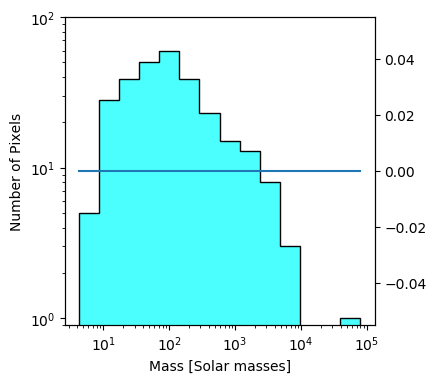

In [62]:
#######################################################################
### IMF missed source detection upper limit:
#######################################################################
plt.close()
catalog = Table.read('/Users/hph/cmzoom_catalog/catalog_acc/catalog_acc.fits')
percent_array=np.array([0.1, 0.1, 0.2, 0.5, 0.8, 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
missed = np.ones_like(percent_array)-percent_array
num_massive_avg1 = num_massive_avg
num_massive_avg1[num_massive_avg<1]=0
missed_massive = missed*num_massive_avg1

fig, ax = plt.subplots(ncols=1,nrows=1,figsize=(4,4))

ax.set_ylabel('Number of Pixels')
ax.set_xlabel('Mass [Solar masses]')
massmin = min(catalog['mass'])
massmax = max(catalog['mass'])
massbins = np.logspace(np.log10(massmin), np.log10(massmax),15)
h12,l1,p1 = ax.hist(catalog['mass'],
                   massbins, color='cyan',alpha=0.7, log=True,
                   label='SMA Clumps')
h12,l1,p1 = ax.hist(catalog['mass'],
                   massbins, color='k',alpha=1.0,histtype='step', log=True)
axp = ax.twinx()
axp.plot(massbins,missed_massive)

ax.set_xscale("log")
ax.set_ylim(0.9,100)
plt.show()


In [63]:
print(num_massive_avg)
print(percent_array)

[  0.      0.      0.      0.      0.      1.384   2.922   6.021  12.47
  25.158  51.048 102.537 205.669 417.316 842.346]
[0.1 0.1 0.2 0.5 0.8 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]


In [52]:
num_massive_avg1 = num_massive_avg
num_massive_avg1[num_massive_avg<1]=0

In [55]:
num_massive_avg1

array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   1.056,   2.23 ,
         4.492,   9.12 ,  18.846,  37.323,  75.572, 153.232, 309.764,
       623.909])

In [57]:
missed_massive

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])